<a href="https://colab.research.google.com/github/KIllerLB-USTC/raman_analysis_toolbox/blob/main/Distance_depth_raman_treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install peakutils rich

In [ ]:
import os
import pandas as pd
import peakutils
from peakutils.plot import plot as pplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def file_typename_finder(file_dir,position,print_name=False):
    target_file_name= []
    for root, dirs, files in os.walk(file_dir):
      for file in files:
        file_name = file.split('_')[position]
        if print_name == True:
          print(file_name+'\t'+ str(file))
        if file_name not in target_file_name:
          target_file_name.append(file_name)
    print(target_file_name)
    return target_file_name

def file_name_walk_finder(file_dir,target_KEY_WORDS):
    target_file =[]
    for root, dirs, files in os.walk(file_dir):
      for file in files:
        if target_KEY_WORDS['time']==[] and file.split('_')[2] in target_KEY_WORDS['voltage']:
          target_file.append(file)
          print(file)

        elif file.split('_')[2] in target_KEY_WORDS['voltage'] and file.split('_')[1] in target_KEY_WORDS['time']:
          target_file.append(file)
          print(file)
    return target_file

def condition_translator(file_name):
  condition = file_name.split('_')[2]
  if condition == 'N100mv':
    result = 'Voltage:0.1V,-'
  elif condition == 'N50mv':
    result = 'Voltage:0.05V,-'
  elif condition == 'N150mv':
    result = 'Voltage:0.15V,-'
  elif condition == 'N200mv' or condition == '200mvp' :
    result = 'Voltage:0.2V,-'
  elif condition == 'N300mv':
    result = 'Voltage:0.3V,-'
  elif condition == 'N400mv':
    result = 'Voltage:0.4V,-'
  elif condition == 'N500mv':
    result = 'Voltage:0.5V,-'
  elif condition == 'N600mv':
    result = 'Voltage:0.6V,-'
  elif condition == 'P200mv':
    result = 'Voltage:0.2V,+'
  elif condition == 'P400mv':
    result = 'Voltage:0.4V,+'
  elif condition =='bare':
    result = 'Nosolution,NoITOglass'
  elif condition =='0mv' or condition == '0vpp':
    result ='Voltage:0.00V'
  else: print(file_name+'\t there is no translation for this file accrodingly')
  Solution =file_name.split('_')[0].lower() +'_'+ file_name.split('_')[1].lower()
  list_dic = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
  tiny_time = file_name.split('_')[-1].split('.')[0].lower()

  time_period = file_name.split('_')[2]
  if time_period == '0-200s':
    time_s = str(list_dic.index(tiny_time)*5) + 'S'
  elif time_period== '200-400s':
    time_s = str(list_dic.index(tiny_time)*5+200) + 'S'
  elif time_period == '400-600s':
    time_s = str(list_dic.index(tiny_time)*5+400) + 'S'
  elif time_period == '600-800s':
    time_s = str(list_dic.index(tiny_time)*5+600) + 'S'

  condition_describ = time_s  +','+ result+ ','+Solution
  return condition_describ

def data_set_generator(file_dir,KEY_WORDS,Rough_refrence_peak_for_normalize,smooth_ratio):
  index = 0
  deal_file_list = file_name_walk_finder(file_dir,KEY_WORDS)
  for file_name in deal_file_list:

    deal_file = os.path.join(file_dir,file_name)
    df = pd.read_csv(deal_file, sep="\t", header=None)
    df.columns = [ "wave Number","intensity"]
    df['Conditions'] = condition_translator(file_name)
    # Find the si_peak
    inte = df.loc[(df['wave Number']>Rough_refrence_peak_for_normalize-1) & (df['wave Number']<Rough_refrence_peak_for_normalize+1) ]['intensity']
    number = inte.iloc[0].max()*smooth_ratio
    df['Normalized'] = df['intensity'].div(number)


    index += 1
    if index == 1:
      df_merge = df
    if index >1:
      df_merge = pd.concat([df_merge, df], ignore_index='True')
  return df_merge


def each_time_plot(database,legend_name,Normalized_or_Not):

  if Normalized_or_Not == True:
    button = 'Normalized'
  else:
    button ='intensity'
  sns.set_theme(style="dark")
  flights = database

  # Plot each year's time series in its own facet
  g = sns.relplot(
      data=flights,
      x="wave Number", y=button, col="Conditions", hue="Conditions",
      linewidth=3, zorder=5,kind="=-6", palette="crest",
      col_wrap=3, height=3, aspect=1.5, legend=False,
  )

  # Iterate over each subplot to customize further
  for condition, ax in g.axes_dict.items():

      # Add the title as an annotation within the plot
      ax.text(.8, .85, condition, transform=ax.transAxes, fontweight="bold")

      # Plot every year's time series in the background
      sns.lineplot(
          data=flights, x="wave Number", y=button,
          estimator=None, color=".7", linewidth=1, ax=ax,
      )

  # Reduce the frequency of the x axis ticks
  ax.set_xticks(ax.get_xticks()[::2])

  # Tweak the supporting aspects of the plot
  g.set_titles(legend_name +' '+ "for different time")
  g.set_axis_labels("Wave number ($cm^{-1}$)", "Intensity")
  g.tight_layout()

  #### 3D Plot
  def pick_up_the_time_line(file_dir,target_KEY_WORDS,Plot_time_gap):
    target_file =file_name_walk_finder(file_dir,target_KEY_WORDS)
    for file in target_file:
      file.split('_')

    return target_file


##CLassify the files by differents in Folders

In [ ]:
def move_file_keepname(file_dir,destination,file_name):
  ### file_dir the file stored path, destination is the target folder absolute path
    source_path = os.path.join(file_dir,file_name)
    destination_path = os.path.join(destination,file_name)
    os.rename(source_path,destination_path)
    print('Moving\t<'+file_name+'>successed from\t'+file_dir+'to\t'+destination)

def file_difference_path_creator(file_dir,cut_off_poistion):
    target_file =[]
    target_classify_byfolder = []
    counting_num = 0
    files_and_folders = os.listdir(file_dir)

    for item in files_and_folders:
        if os.path.isdir(item):
            target_classify_byfolder.append(item)
    for root, dirs, files in os.walk(file_dir):
      for file in files:
        if file.split('_')[cut_off_poistion] not in target_classify_byfolder:
          name = file.split('_')[cut_off_poistion]
          target_classify_byfolder.append(name)
          creatdir = os.path.join(file_dir,name)
          os.makedirs(creatdir,exist_ok=True)
          print('Creating\t' + name + ' dir now')
          move_file_keepname(file_dir,creatdir,file)
        else:
          name = file.split('_')[cut_off_poistion]
          target_dir = os.path.join(file_dir,name)
          move_file_keepname(file_dir,target_dir,file)
        counting_num += 1
      print('finished classify the file\t NUM:%d,Creating the folder:%s,folder_numer:%d'%(counting_num,target_classify_byfolder,len(target_classify_byfolder)))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230725_adenine_1e-6'

file_typename_finder(path,0)

['0', '1', '2', '3', '3-laser', '4', '4-laser', '5', '6', '7', '8', '9-test']


['0', '1', '2', '3', '3-laser', '4', '4-laser', '5', '6', '7', '8', '9-test']

In [ ]:
## Check before run this cube
file_difference_path_creator(path,0)

Creating	0 dir now
Moving	<0_test_0mv_1e-6 M adenine 0p1xpbs_1.txt>successed from	/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230725_adenine_1e-6to	/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230725_adenine_1e-6/0
Moving	<0_test_0mv_1e-6 M adenine 0p1xpbs_10s_1.txt>successed from	/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230725_adenine_1e-6to	/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230725_adenine_1e-6/0
Creating	1 dir now
Moving	<1_test_0mv_1e-6 M adenine 0p1xpbs-0-10min_1.txt>successed from	/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230725_adenine_1e-6to	/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230725_adenine_1e-6/1
Moving	<1_test_0mv_1e-6 M adenine 0p1xpbs-0-10min_2.txt>successed from	/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/

In [ ]:
path ='/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G/'
file_difference_path_creator(path,0)

## Extract the max signal value from Spectra

In [ ]:
from posixpath import join
from posixpath import split
from pandas.io.parsers.readers import read_table
from tqdm import tqdm
from scipy.signal import find_peaks
from scipy import sparse
from scipy.sparse.linalg import spsolve
import os

# KEY_WORDS = {'voltage':['N50mv'],'time':['0-200s']}
# file_list = file_name_walk_finder(file_path,KEY_WORDS)

# Baseline stimation with asymmetric least squares
# According to paper: "Baseline Correction with Asymmetric Least Squares Smoothing"
# by Paul H. C. Eilers and Hans F.M. Boelens. October 21, 2005

# We need the following packages here:


# Baseline stimation function:
def baseline_als(y, lam, p, niter=100):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

# For more info see the paper and https://stackoverflow.com/questions/29156532/python-baseline-correction-library

def baseline_remove(Y_Data,switch_on= False):
  if switch_on:
    l= 1e+7
    p=0.05
    baseline = baseline_als(Y_Data,l,p)
    Correct_data = Y_Data - baseline
  else:
    Correct_data = Y_Data
    baseline = 0

  return Correct_data,baseline

def file_writer(file_path,data_in_np_array,nick_name='',folder_upper_depth=-1):
    pre_file_name = os.path.basename(file_path)
    one_level_up = os.path.dirname(file_path)
    two_levels_up = os.path.abspath(os.path.join(one_level_up, os.pardir,os.pardir))
    treat_folder = two_levels_up.split('/')[folder_upper_depth]
    output_folder_name = f"{treat_folder}_data_After_treatment_out_put"
    op_folder = os.path.join(two_levels_up,output_folder_name)
    if not os.path.exists(op_folder):
        os.makedirs(op_folder)

    folder_name = f"{treat_folder}_data_After_treatment_{nick_name}"  # 指定文件夹名
    # 创建文件夹（如果不存在）
    folder = os.path.join(op_folder,folder_name)
    if not os.path.exists(folder):
        os.makedirs(folder)

    tr_file_name = f"treated_{pre_file_name}.txt"
    # 指定文件名和路径
    file_name = os.path.join(folder, tr_file_name)
    # 打开文件以写入模式
    np.savetxt(file_name, data_in_np_array, delimiter="\t", header="wavenumber\intensity\baseline", comments="")

    print("Generated Data file in folder")






def i_distance_graph_value_return(file_path,distance_gap=50,show_peak_positon=False,show_files_details = False,cut_off=False,calibration_distance_factor = 0
                                  ,peak_find_area=(),file_writer_switch="on",remove_baseline=False):

  file_list = os.listdir(file_path)
  ##默认没有文件夹
  print('\nthe distance gap is %d um\n'%distance_gap)
  plot_list = np.array([[0,0]])
  file_list_bar = tqdm(file_list)
  for file in file_list_bar:

    distance_count = int(file.split('_')[-1].split('.')[0].lower())-calibration_distance_factor
    # time_count_list.append(time_count*10+initial_num)
    files = os.path.join(file_path,file)
    if show_files_details == True:
      print(files)
    df = pd.read_table(files,names=['wave number','nonesense','intensity'],sep='\\s+',encoding='utf-8') #三行
    #df = pd.read_table(files,names=['wave number','intensity'],sep='\\s+',encoding='utf-8') #两行
    ##### watch out the cutoff
    if cut_off == True:
      df = df.loc[df['wave number']>400].reset_index()

  #####--------------------------------------------
    y = df['intensity']

    if remove_baseline:
      corrected_data,baseline = baseline_remove(y,switch_on=True)
      writting_data=np.column_stack((df['wave number'],corrected_data,baseline))
      file_writer(files,writting_data,'baseline_removed',-1)
      print("---------->basline remover is on<---------------")

    else:
      corrected_data,baseline = baseline_remove(y,switch_on=False)
      print("---------->basline remover is off<---------------")

    if peak_find_area:
      l,h = peak_find_area
      indexes,_ =find_peaks(corrected_data,distance=20)
      #indexes = peakutils.indexes(y,thres=0.01,min_dist=20)
      ## Debug and check the peak finder
      print(indexes)
      #index = indexes[np.where((indexes<135)&(indexes>130))]
      Y_2=0
      if len(indexes):
        for indexe in indexes:
          if l <df['wave number'].loc[indexe]<h:
            index = indexe
            #### debug
            print(df['wave number'].loc[indexe])
            Y_2 = corrected_data.loc[index]#-base[index]
        # else:
        #   index =y.idxmax()
        #   Y_2 = y.loc[index]#-base[index]
    else:
    #   index =df['wave number'].idmax
    #   Y_2 = df['intensity'].loc[index]-base[index]
    #   print(df['wave number'].loc[index])

      index =corrected_data.idxmax()
      Y_2 = corrected_data[index]#-base[index]
      if show_peak_positon == True:
        print(df['wave number'].loc[index])

    # target_y.append(Y_2)
    #print(index)

    plot_list =np.append(plot_list,[[distance_count*distance_gap,Y_2]],axis=0)
    # print(np.argsort(plot_list[:,0]))

    plot_list = plot_list[np.argsort(plot_list[:,0])]
    # print(plot_list)
    file_list_bar.set_description('Now processing inner circle...%s'%file)
  if show_peak_positon == True:
   print(plot_list)
  if file_writer_switch == "on":
    file_writer(files,plot_list,"it-data")


  return plot_list


In [ ]:
a = os.path.basename('/content/drive/MyDrive/analysis/raman_analysis_/20230809-0810/20230810 porous gold/8-/8-_-400mv+400mv_1mw_1e-6 adenine pbs 0p1x _360cd aneal_10s inter_0-5min 5-10min_1.txt')
print(a)


8-_-400mv+400mv_1mw_1e-6 adenine pbs 0p1x _360cd aneal_10s inter_0-5min 5-10min_1.txt


In [ ]:
def test(peak=()):
  l,h = peak
  print(l+h)

test((1,2))

3


In [ ]:
file_path ="/content/drive/MyDrive/analysis/raman_analysis_/20230707 Binexperiments MB tests on Ag @ Sio2 @au samples planar/-500mv_2nd circle/7_voltage depends test_on NW_1e-6MMB diwater_after_rinse_5s_-500mv_0-5min_1.txt"
df = pd.read_table(file_path,names=['wave number','nonesense','intensity'],sep='\\s+',encoding='utf-8')
print(df.loc[32, "wave number"])

1053.665


In [ ]:
os.listdir('/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on Au')

['FTO,0mv', 'FTO,-1V', 'FTO,+1V', 'FTO,+2V', 'FTO,0mv,2', 'FTO,0mv,3']

## time and distance dependent figures plot

In [ ]:

from matplotlib import text
import matplotlib.pyplot as plt
from pandas.core import indexes
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import re




def return_folders_path(path):
  path_list = []
  for top,dirs,files in os.walk(path):
    for dir in dirs:
      path=os.path.join(top,dir)
      path_list.append(path)
  return path_list


def return_files_path(path):
  file_list = []
  for top,dirs,files in os.walk(path):
    for file in files:
      path=os.path.join(top,file)
      file_list.append(path)
  return file_list

def delete_upper_class_folder_path(path_list):
  for path in path_list:
    file_list = os.listdir(path)
    for file in file_list:
      #print(file)
      if os.path.isdir(os.path.join(path,file)):
        path_list.remove(path)
        print('removing upper folder%s'%path)
        break#遇到第一个folder 删除上级路径
  return path_list

def second_largest(a_array):
  m1 = a_array.max()
  b =np.delete(a_array,np.where(a_array == m1))
  m2 = b.max()
  return m2

def List_sort(a_list):
  fns = lambda s: sum(((s,int(n))for s,n in re.findall('(\D+)(\d+)','a%s0'%s)),())
  return sorted(a_list, key=fns)
  ### Ref

def parse_time(time_str):
    voltage, time = time_str.split(',')
    match = re.match(r'(\d+)\s*(\S+)', time)
    if not match:
        raise ValueError('Invalid time string')
    value = int(match.group(1))
    unit = match.group(2)
    if unit == 'min':
        return value
    elif unit == 'sec':
        return value / 60
    elif unit == 'hr':
        return value * 60
    else:
        raise ValueError('Invalid time unit')

def sort_times(times):
    sorted_times = sorted(times, key=parse_time)
    return sorted_times
def Time_dependent_raman_drawing_individual_drawing(tot_folder_path,save_path,time_gap,
                                                    description_label='',normalization = 'overall',
                                                    line_color =[],ylim_scale=(),baseline_remove_switch=False,
                                                    find_peak_position = ()):

  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)

  #plt.ylim((0,1.1))
  cali_factor =0

  ###

  if normalization == 'overall':
    y_max = 1
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path,distance_gap=time_gap,
                                                peak_find_area=find_peak_position,
                                                remove_baseline=baseline_remove_switch)

      if y_max < plot_list[1:,1].max():
        y_max = plot_list[1:,1].max()
        print('\nThe Normalization y_max =%.2f'%y_max)
    print('\nThe Normalization found! y_max =%.2f'%y_max)


  for path in path_bar:
    fig, ax = plt.subplots(figsize=(6,4),dpi=200)
    files_list = return_files_path(path)
    condition =path.split('/')[-1]
    #condition = description_label+','+path.split('/')[-2]+','+path.split('/')[-1]
    #condition_list.append(condition)
    # plot_path = os.path.join(Upper_folder_path,file)
    # file_path = plot_path
    #plt.xlim((50,600))

    plot_list = i_distance_graph_value_return(path,distance_gap=time_gap,show_peak_positon=False,
                                              peak_find_area=find_peak_position,
                                              remove_baseline=baseline_remove_switch)

    x_value = plot_list[1:,0]
    if normalization == 'overall':
      y_value = plot_list[1:,1]/y_max #* parameter[count]
    elif normalization == 'individual':
      #y_value = plot_list[1:,1]/second_largest(plot_list[1:,1])
      y_value = plot_list[1:,1]/plot_list[1:,1].max()
    else:
      y_value = plot_list[1:,1]

    if line_color:
      for color in line_color:
        ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2,color=color)
    else:
      ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2)
    print('finished drawing <%s> figure'%condition)
    path_bar.set_description('Now processing...%s'%condition)
    ax.legend('%s'%condition,fontsize=8,loc='upper left')
    ax.set(ylabel='Intensity(a.u.)',xlabel='Time(s)')
    ax.set(title= '%s I-t graph'%description_label)
    ax.title.set_size(8)
    ### autoscale or manually
    if ylim_scale:
      plt.ylim(ylim_scale)
    else:
      ax.autoscale()
    plt.savefig(save_path+'%s%s.png'%(condition,description_label),dpi=600)

def Time_dependent_raman_drawing(tot_folder_path,save_path,time_gap,description_label='',normalization = 'overall',line_color =[],ylim_scale=()):

  peak_find_area_inner = ()

  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)
  fig, ax = plt.subplots(figsize=(6,4),dpi=200)
  #plt.ylim((0,1.1))
  cali_factor =0

  ###

  if normalization == 'overall':
    y_max = 1
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path,distance_gap=time_gap,peak_find_area=peak_find_area_inner)

      if y_max < plot_list[1:,1].max():
        y_max = plot_list[1:,1].max()
        print('\nThe Normalization y_max =%.2f'%y_max)
    print('\nThe Normalization found! y_max =%.2f'%y_max)


  for path in path_bar:
    files_list = return_files_path(path)
    #condition = description_label+','+path.split('/')[-2]+','+path.split('/')[-1]
    condition = path.split('/')[-2]+','+path.split('/')[-1]
    condition_list.append(condition)
    # plot_path = os.path.join(Upper_folder_path,file)
    # file_path = plot_path
    #plt.xlim((50,600))

    plot_list = i_distance_graph_value_return(path,distance_gap=time_gap,show_peak_positon=False,peak_find_area=peak_find_area_inner)

    x_value = plot_list[1:,0]
    if normalization == 'overall normalization':
      y_value = plot_list[1:,1]/y_max #* parameter[count]
    elif normalization == 'individual normalization':
      #y_value = plot_list[1:,1]/second_largest(plot_list[1:,1])
      y_value = plot_list[1:,1]/plot_list[1:,1].max()
    else:
      y_value = plot_list[1:,1]

    if line_color:
      for color in line_color:
        ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2,color=color)
    else:
      ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2)
    print('finished drawing <%s> figure'%condition)
    path_bar.set_description('Now processing...%s'%condition)
  ax.legend(condition_list,fontsize=6,loc='upper left')
  ax.set(ylabel='Intensity(a.u.)',xlabel='Time(s)')
  ax.set(title= '%s I-t graph'%description_label)
  ax.title.set_size(8)
  ### autoscale or manually
  if ylim_scale:
    plt.ylim(ylim_scale)
  else:
    ax.autoscale()
  plt.savefig(save_path+'%s%s.png'%(Upper_folder_path.split('/')[-1],description_label),dpi=600)


def Distance_raman_drawing(tot_folder_path,save_path,tiltle,description_label='',normalization ='raw',calibration_for_time_shift = False):

  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)
  fig, ax = plt.subplots(figsize=(6,4),dpi=200)
  #plt.ylim((0,1.1))
  cali_factor =0
  cali_count =0

  ###

  if normalization == 'overall':
    y_max = 1
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path)

      if y_max < plot_list[1:,1].max():
        y_max = plot_list[1:,1].max()
        print('\nThe Normalization y_max =%.2f'%y_max)
    print('\nThe Normalization found! y_max =%.2f'%y_max)

  if normalization == 'max_peak_plot':
    max_position =[]
    max_intensity = []
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path)
      max_intensity.append(plot_list[:,1].max())
      x,y = np.where(plot_list==plot_list[:,1].max())
      max_position.append(plot_list[x,0])
    print(max_position)
    print(max_intensity)


#####
  for path in path_bar:
    print('\n now dealing with %s\n'%path)
    files_list = return_files_path(path)
    condition = path.split('/')[-2]+','+path.split('/')[-1]
    condition_list.append(condition)
    # plot_path = os.path.join(Upper_folder_path,file)
    # file_path = plot_path
    #plt.xlim((50,600))

    if calibration_for_time_shift == True and cali_count==3:
      print('\n!!!!!!!!!!!!! %d step tune, %d circle!!!!!!!!\n'%(cali_factor,cali_count))
      plot_list = i_distance_graph_value_return(path,show_peak_positon=False,calibration_distance_factor=cali_factor)
      cali_factor += 0
      cali_count +=1

    elif calibration_for_time_shift == True and cali_count==0:
      print('\n!!!!!!!!!!!!! manue tune!!!!!!!!\n')
      plot_list = i_distance_graph_value_return(path,show_peak_positon=False,calibration_distance_factor=-3)
      cali_factor += 1
      cali_count +=1
    else:
      plot_list = i_distance_graph_value_return(path,show_peak_positon=False)
      cali_factor += 1
    x_value = plot_list[1:,0]
    if normalization == 'overall':
      y_value = plot_list[1:,1]/y_max #* parameter[count]
    elif normalization == 'individual':
      #y_value = plot_list[1:,1]/second_largest(plot_list[1:,1])
      y_value = plot_list[1:,1]/plot_list[1:,1].max()
    elif normalization == 'max_peak_plot':
      x_value = max_position
      y_value = max_intensity
    else:
      y_value = plot_list[1:,1]
    ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2)
    print('finished drawing <%s> figure'%condition)
    path_bar.set_description('Now processing...%s'%condition)
  ax.legend(condition_list,fontsize=6,loc='best')
  ax.set(ylabel='Flourencence Intensity(Count.)',xlabel='Displacement($\mu$m)')
  ax.set(title= '%s I-D graph'%tiltle)
  ax.title.set_size(12)
  ax.autoscale()
  plt.savefig(save_path+'%s%s.png'%(Upper_folder_path.split('/')[-1],description_label),dpi=600)

def get_maxpoints_position_value(tot_folder_path,peak_confine =True,peak_position_approx=(1500,1600)):
  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  print(Upper_folder_path)
  #path_c = sort_times(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)
  max_position =[]
  max_intensity = []
  for path in path_bar:
    condition = path.split('/')[-1]
    condition_list.append(condition)
    plot_list = i_distance_graph_value_return(path)
    if peak_confine == True:
      start,end = peak_position_approx
      peak_position = np.where((plot_list[:,0]>start) & (plot_list[:,0]<end))
      peak_intensity = plot_list[peak_position,1].max()
      max_intensity.append(peak_intensity)
      x,y = np.where(plot_list==peak_intensity)
      max_position.append(plot_list[x,0])
    else:
      max_intensity.append(plot_list[:,1].max())
      x,y = np.where(plot_list==plot_list[:,1].max())
      max_position.append(plot_list[x,0])
  #print(max_position)
  #print(max_intensity)
  return max_position,max_intensity,condition_list

In [ ]:
path = '/content/drive/MyDrive/analysis/raman_analysis_/20230406_R6G_test/0v,0min/newITO/SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_1.txt'
df = pd.read_table(path,names=['wave number','intensity'],sep='\\s+',encoding='utf-8')

In [ ]:
index =df['intensity'].idxmax()
Y_2 = df['intensity'].loc[index]#-base[index]
print(index)

184


In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
b = second_largest(a)
print(b)

8


  0%|          | 0/8 [00:00<?, ?it/s]


the distance gap is 10 um




  0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...1- 1e-6 adenine pbs 0p1x _360 cd 15min aneal_10s inter_1.txt:   0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...1- 1e-6 adenine pbs 0p1x _360 cd 15min aneal_10s inter_1.txt: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
Now processing...1- 1e-6 adenine pbs 0p1x :   0%|          | 0/8 [00:00<?, ?it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  57  84 118 139 161 187 219 243 270 293 320 341 373 406 431 458 478
 508]
718.221
Generated Data file in folder
finished drawing <1- 1e-6 adenine pbs 0p1x > figure


Now processing...1- 1e-6 adenine pbs 0p1x :  12%|█▎        | 1/8 [00:01<00:11,  1.70s/it]


the distance gap is 10 um




  0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...2- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_1.txt:   0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...2- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_1.txt: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]
Now processing...2- 1e-6 adenine pbs 0p1x :  12%|█▎        | 1/8 [00:02<00:11,  1.70s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  25  48  73  95 116 152 175 195 228 249 287 320 340 360 381 413 438
 475 510]
733.242
Generated Data file in folder
finished drawing <2- 1e-6 adenine pbs 0p1x > figure


Now processing...2- 1e-6 adenine pbs 0p1x :  25%|██▌       | 2/8 [00:02<00:08,  1.44s/it]


the distance gap is 10 um




  0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...3- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_ diifferent location_1.txt:   0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...3- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_ diifferent location_1.txt: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]
Now processing...3- 1e-6 adenine pbs 0p1x :  25%|██▌       | 2/8 [00:03<00:08,  1.44s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  52  76  99 119 142 162 191 225 248 282 318 342 372 392 428 460 480
 505]
728.238
Generated Data file in folder
finished drawing <3- 1e-6 adenine pbs 0p1x > figure


Now processing...3- 1e-6 adenine pbs 0p1x :  38%|███▊      | 3/8 [00:04<00:06,  1.33s/it]


the distance gap is 10 um




  0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...4- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_ diifferent location_2_1.txt:   0%|          | 0/1 [00:00<?, ?it/s]
Now processing inner circle...4- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_ diifferent location_2_1.txt: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]
Now processing...4- 1e-6 adenine pbs 0p1x :  38%|███▊      | 3/8 [00:04<00:06,  1.33s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  36  59  81 101 121 146 168 195 225 247 273 302 336 370 390 428 448
 476 510]
728.238
Generated Data file in folder
finished drawing <4- 1e-6 adenine pbs 0p1x > figure


Now processing...4- 1e-6 adenine pbs 0p1x :  50%|█████     | 4/8 [00:05<00:05,  1.31s/it]


the distance gap is 10 um




  0%|          | 0/53 [00:00<?, ?it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_1.txt:   0%|          | 0/53 [00:00<?, ?it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_1.txt:   2%|▏         | 1/53 [00:00<00:34,  1.51it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  44  69  93 118 141 176 196 227 257 281 303 340 368 394 418 438 460
 481 507]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_2.txt:   2%|▏         | 1/53 [00:01<00:34,  1.51it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_2.txt:   4%|▍         | 2/53 [00:01<00:33,  1.53it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  43  67  93 123 147 170 197 227 258 296 318 338 362 387 423 453 485
 510]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_3.txt:   4%|▍         | 2/53 [00:01<00:33,  1.53it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_3.txt:   6%|▌         | 3/53 [00:01<00:32,  1.52it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  44  68  92 119 155 176 196 228 259 280 302 322 345 367 387 422
 463 487 510]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_4.txt:   6%|▌         | 3/53 [00:02<00:32,  1.52it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_4.txt:   8%|▊         | 4/53 [00:02<00:33,  1.46it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  25  64  88 108 129 157 177 200 228 250 273 299 321 342 371 397 431
 453 480 510]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_5.txt:   8%|▊         | 4/53 [00:03<00:33,  1.46it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_5.txt:   9%|▉         | 5/53 [00:03<00:32,  1.47it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  26  57  78 116 153 177 198 228 250 271 291 315 336 371 392 434 456
 476 508]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_6.txt:   9%|▉         | 5/53 [00:03<00:32,  1.47it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_6.txt:  11%|█▏        | 6/53 [00:03<00:31,  1.51it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  57  82 107 128 154 175 196 228 253 275 297 320 340 367 393 427
 451 478 510]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_7.txt:  11%|█▏        | 6/53 [00:04<00:31,  1.51it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_7.txt:  13%|█▎        | 7/53 [00:04<00:27,  1.66it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  38  58  79 109 148 175 196 227 259 294 320 344 370 398 427 451 475
 510]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_8.txt:  13%|█▎        | 7/53 [00:04<00:27,  1.66it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_8.txt:  15%|█▌        | 8/53 [00:04<00:25,  1.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  63  85 110 143 169 192 228 253 280 302 322 348 368 396 432 453 476
 502]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_9.txt:  15%|█▌        | 8/53 [00:05<00:25,  1.75it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_9.txt:  17%|█▋        | 9/53 [00:05<00:24,  1.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  47  68  94 124 145 169 194 227 247 285 306 332 371 392 430 453
 474 509]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_10.txt:  17%|█▋        | 9/53 [00:06<00:24,  1.82it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_10.txt:  19%|█▉        | 10/53 [00:06<00:23,  1.84it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  41  64  84 120 140 164 196 228 264 287 307 327 348 374 395 433 466
 487 509]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_11.txt:  19%|█▉        | 10/53 [00:06<00:23,  1.84it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_11.txt:  21%|██        | 11/53 [00:06<00:22,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  41  65  93 117 157 190 224 249 272 300 329 354 378 400 429 457 478
 507]
726.569



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_12.txt:  21%|██        | 11/53 [00:07<00:22,  1.87it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_12.txt:  23%|██▎       | 12/53 [00:07<00:21,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  43  65  91 118 140 161 191 226 257 283 303 333 366 390 420 452
 477 509]
729.906



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_13.txt:  23%|██▎       | 12/53 [00:07<00:21,  1.89it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_13.txt:  25%|██▍       | 13/53 [00:07<00:20,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  41  61  81 114 145 165 190 225 248 280 300 329 352 379 419 453 477
 508]
728.238



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_14.txt:  25%|██▍       | 13/53 [00:08<00:20,  1.95it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_14.txt:  26%|██▋       | 14/53 [00:08<00:19,  1.97it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 22  43  76 117 149 169 197 227 249 277 307 340 360 380 416 453 481 509]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_15.txt:  26%|██▋       | 14/53 [00:08<00:19,  1.97it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_15.txt:  28%|██▊       | 15/53 [00:08<00:19,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  31  52  77 116 150 173 193 227 259 279 299 338 369 411 431 454 477
 510]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_16.txt:  28%|██▊       | 15/53 [00:09<00:19,  1.96it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_16.txt:  30%|███       | 16/53 [00:09<00:19,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  40  77 118 155 191 227 250 272 299 338 378 404 427 451 471 506]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_17.txt:  30%|███       | 16/53 [00:09<00:19,  1.87it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_17.txt:  32%|███▏      | 17/53 [00:09<00:18,  1.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  41  74 106 128 151 189 226 246 284 312 337 367 394 424 446 476 509]
729.906



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_18.txt:  32%|███▏      | 17/53 [00:10<00:18,  1.90it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_18.txt:  34%|███▍      | 18/53 [00:10<00:18,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  41  62  86 107 128 151 174 194 227 248 270 310 345 366 387 411 433
 454 481 509]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_19.txt:  34%|███▍      | 18/53 [00:10<00:18,  1.89it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_19.txt:  36%|███▌      | 19/53 [00:10<00:17,  1.93it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  41  67 102 127 151 171 194 227 250 272 302 323 362 397 417 437 477
 505]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_20.txt:  36%|███▌      | 19/53 [00:11<00:17,  1.93it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_20.txt:  38%|███▊      | 20/53 [00:11<00:16,  1.97it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  45  66  94 119 146 172 192 227 250 277 307 333 353 390 412 433
 464 485 508]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_21.txt:  38%|███▊      | 20/53 [00:11<00:16,  1.97it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_21.txt:  40%|███▉      | 21/53 [00:11<00:16,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  29  58  81 101 131 152 193 227 249 281 305 332 353 389 412 434 459
 488]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_22.txt:  40%|███▉      | 21/53 [00:12<00:16,  1.95it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_22.txt:  42%|████▏     | 22/53 [00:12<00:16,  1.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  64  87 113 137 162 195 227 248 270 292 329 360 386 410 443 478
 508]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_23.txt:  42%|████▏     | 22/53 [00:12<00:16,  1.92it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_23.txt:  43%|████▎     | 23/53 [00:12<00:15,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  32  59  82 112 139 160 198 228 251 276 302 328 356 384 411 434 455
 478 499]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_24.txt:  43%|████▎     | 23/53 [00:13<00:15,  1.95it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_24.txt:  45%|████▌     | 24/53 [00:13<00:14,  1.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 22  50  75 112 143 166 200 226 256 278 302 327 354 382 408 431 451 471
 491]
729.906



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_25.txt:  45%|████▌     | 24/53 [00:13<00:14,  1.99it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_25.txt:  47%|████▋     | 25/53 [00:13<00:14,  1.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  24  45  79 109 145 178 199 228 258 298 330 353 386 408 430 462 482
 503]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_26.txt:  47%|████▋     | 25/53 [00:14<00:14,  1.99it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_26.txt:  49%|████▉     | 26/53 [00:14<00:14,  1.86it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  25  45  65  85 111 132 153 175 197 227 255 280 300 328 354 382 409
 429 462 483 503]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_27.txt:  49%|████▉     | 26/53 [00:14<00:14,  1.86it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_27.txt:  51%|█████     | 27/53 [00:14<00:15,  1.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  42  76  96 120 144 174 199 228 249 270 291 325 352 383 408 429 451
 479 501]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_28.txt:  51%|█████     | 27/53 [00:15<00:15,  1.72it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_28.txt:  53%|█████▎    | 28/53 [00:15<00:15,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  27  57  82 114 144 179 203 228 267 303 328 354 385 409 434 471 499]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_29.txt:  53%|█████▎    | 28/53 [00:16<00:15,  1.61it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_29.txt:  55%|█████▍    | 29/53 [00:16<00:14,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  24  46  69 111 148 173 203 227 251 273 300 330 353 389 410 436 462
 482 505]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_30.txt:  55%|█████▍    | 29/53 [00:16<00:14,  1.61it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_30.txt:  57%|█████▋    | 30/53 [00:16<00:14,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  30  53  83 115 147 176 200 228 249 277 303 329 354 376 411 431 470
 504]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_31.txt:  57%|█████▋    | 30/53 [00:17<00:14,  1.61it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_31.txt:  58%|█████▊    | 31/53 [00:17<00:14,  1.48it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  34  57  90 113 145 180 200 226 246 284 307 328 353 379 407 431 453
 474 508]
729.906



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_32.txt:  58%|█████▊    | 31/53 [00:18<00:14,  1.48it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_32.txt:  60%|██████    | 32/53 [00:18<00:13,  1.59it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  37  74 114 148 172 202 226 251 279 300 326 350 375 408 433 463 485
 505]
729.906



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_33.txt:  60%|██████    | 32/53 [00:18<00:13,  1.59it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_33.txt:  62%|██████▏   | 33/53 [00:18<00:11,  1.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  28  58  86 112 144 176 200 228 250 283 304 328 351 380 407 433 462
 486 510]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_34.txt:  62%|██████▏   | 33/53 [00:19<00:11,  1.70it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_34.txt:  64%|██████▍   | 34/53 [00:19<00:11,  1.67it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  58  83 115 146 173 195 228 248 273 298 325 351 379 409 430 454
 479 509]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_35.txt:  64%|██████▍   | 34/53 [00:19<00:11,  1.67it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_35.txt:  66%|██████▌   | 35/53 [00:19<00:10,  1.76it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  34  56  77 101 144 170 204 228 249 280 302 322 353 386 408 430 452
 476 510]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_36.txt:  66%|██████▌   | 35/53 [00:20<00:10,  1.76it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_36.txt:  68%|██████▊   | 36/53 [00:20<00:09,  1.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  33  74 114 146 168 194 229 251 282 304 325 352 381 411 432 456 477
 508]
734.909



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_37.txt:  68%|██████▊   | 36/53 [00:20<00:09,  1.79it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_37.txt:  70%|██████▉   | 37/53 [00:20<00:08,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  48  78 116 145 181 206 228 252 272 294 316 338 364 389 411 439 479
 504]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_38.txt:  70%|██████▉   | 37/53 [00:21<00:08,  1.88it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_38.txt:  72%|███████▏  | 38/53 [00:21<00:07,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  32  64  85 105 127 147 172 197 228 260 282 302 326 348 379 405 427
 460 480 505]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_39.txt:  72%|███████▏  | 38/53 [00:21<00:07,  1.91it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_39.txt:  74%|███████▎  | 39/53 [00:21<00:07,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  42  65  87 115 152 176 197 227 248 269 293 324 346 374 405 430
 461 484 506]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_40.txt:  74%|███████▎  | 39/53 [00:22<00:07,  1.91it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_40.txt:  75%|███████▌  | 40/53 [00:22<00:06,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  28  56  79 112 146 179 200 228 250 271 302 325 355 379 407 440 460
 480 505]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_41.txt:  75%|███████▌  | 40/53 [00:22<00:06,  1.91it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_41.txt:  77%|███████▋  | 41/53 [00:22<00:06,  1.97it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  46  70  93 113 146 179 199 227 247 279 303 326 352 385 408 428
 461 482 503]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_42.txt:  77%|███████▋  | 41/53 [00:23<00:06,  1.97it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_42.txt:  79%|███████▉  | 42/53 [00:23<00:05,  1.98it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  44  64 101 125 147 176 200 228 248 275 303 323 358 394 414 442 471
 494]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_43.txt:  79%|███████▉  | 42/53 [00:23<00:05,  1.98it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_43.txt:  81%|████████  | 43/53 [00:24<00:05,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  49  69  90 113 147 176 201 227 253 281 301 339 360 386 410 430
 463 487 507]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_44.txt:  81%|████████  | 43/53 [00:24<00:05,  1.88it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_44.txt:  83%|████████▎ | 44/53 [00:24<00:04,  1.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  34  54  74 111 147 171 201 227 249 278 302 323 357 383 410 437 465
 488 510]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_45.txt:  83%|████████▎ | 44/53 [00:25<00:04,  1.90it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_45.txt:  85%|████████▍ | 45/53 [00:25<00:04,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  26  51  79 100 126 148 173 206 227 248 281 302 323 357 378 406 427
 447 467 488 509]
731.574



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_46.txt:  85%|████████▍ | 45/53 [00:25<00:04,  1.88it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_46.txt:  87%|████████▋ | 46/53 [00:25<00:03,  1.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  46  76 110 148 180 205 228 248 276 302 324 357 377 409 430 456
 483 510]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_47.txt:  87%|████████▋ | 46/53 [00:26<00:03,  1.90it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_47.txt:  89%|████████▊ | 47/53 [00:26<00:03,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  54  76 115 147 177 204 229 261 286 307 328 355 378 412 432 460
 481 507]
734.909



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_48.txt:  89%|████████▊ | 47/53 [00:26<00:03,  1.88it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_48.txt:  91%|█████████ | 48/53 [00:26<00:02,  1.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  27  60  89 119 149 170 201 229 251 282 304 326 359 381 412 433 464
 490]
734.909



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_49.txt:  91%|█████████ | 48/53 [00:27<00:02,  1.94it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_49.txt:  92%|█████████▏| 49/53 [00:27<00:02,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  60  98 122 161 182 203 228 253 286 306 327 358 386 410 431 466
 490 510]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_50.txt:  92%|█████████▏| 49/53 [00:27<00:02,  1.96it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_50.txt:  94%|█████████▍| 50/53 [00:27<00:01,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  47  69 109 146 177 203 229 251 277 305 329 361 383 411 435 466 486
 510]
734.909



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_51.txt:  94%|█████████▍| 50/53 [00:28<00:01,  1.89it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_51.txt:  96%|█████████▌| 51/53 [00:28<00:01,  1.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  45  77 103 129 157 177 203 228 250 281 302 326 354 377 407 432 458
 479 501]
733.242



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_52.txt:  96%|█████████▌| 51/53 [00:28<00:01,  1.72it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_52.txt:  98%|█████████▊| 52/53 [00:28<00:00,  1.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  37  58  82 108 147 176 199 225 246 268 305 328 353 379 405 430 454
 475 498]
728.238



Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_53.txt:  98%|█████████▊| 52/53 [00:29<00:00,  1.70it/s]
Now processing inner circle...5- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_53.txt: 100%|██████████| 53/53 [00:29<00:00,  1.78it/s]
Now processing...5- 1e-6 adenine pbs 0p1x :  50%|█████     | 4/8 [00:35<00:05,  1.31s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  51  73  96 116 137 164 198 230 251 274 302 340 366 386 406 436 458
 492]
736.576
Generated Data file in folder
finished drawing <5- 1e-6 adenine pbs 0p1x > figure


Now processing...5- 1e-6 adenine pbs 0p1x :  62%|██████▎   | 5/8 [00:36<00:36, 12.12s/it]


the distance gap is 10 um




  0%|          | 0/360 [00:00<?, ?it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_2.txt:   0%|          | 0/360 [00:00<?, ?it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_2.txt:   0%|          | 1/360 [00:00<04:24,  1.36it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  36  62  97 119 141 162 192 225 245 270 304 334 365 394 419 441 474
 504]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_3.txt:   0%|          | 1/360 [00:01<04:24,  1.36it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_3.txt:   1%|          | 2/360 [00:01<04:27,  1.34it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  58  78 103 129 152 176 197 226 249 269 293 314 338 365 396 435 460
 480 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_4.txt:   1%|          | 2/360 [00:02<04:27,  1.34it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_4.txt:   1%|          | 3/360 [00:02<04:31,  1.31it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  34  57  80 105 126 150 176 199 227 247 274 312 337 357 379 399 434
 461 483 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_5.txt:   1%|          | 3/360 [00:05<04:31,  1.31it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_5.txt:   1%|          | 4/360 [00:05<09:20,  1.57s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  30  56  79 115 151 171 192 225 248 272 301 339 378 406 426 447 474
 499]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_6.txt:   1%|          | 4/360 [00:05<09:20,  1.57s/it]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_6.txt:   1%|▏         | 5/360 [00:05<06:44,  1.14s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  54  80 100 133 170 190 225 261 282 303 331 354 379 406 442 479 500]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_7.txt:   1%|▏         | 5/360 [00:05<06:44,  1.14s/it]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_7.txt:   2%|▏         | 6/360 [00:05<05:13,  1.13it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  39  64  93 113 147 168 194 226 246 273 294 315 338 361 387 410 430
 455 483 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_8.txt:   2%|▏         | 6/360 [00:06<05:13,  1.13it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_8.txt:   2%|▏         | 7/360 [00:06<04:11,  1.40it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  33  53  77 116 157 191 226 246 270 305 335 369 407 429 449 475 495]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_9.txt:   2%|▏         | 7/360 [00:06<04:11,  1.40it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_9.txt:   2%|▏         | 8/360 [00:06<03:25,  1.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  49  78 116 141 162 186 226 246 273 296 336 358 379 412 434 454 480
 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_15.txt:   2%|▏         | 8/360 [00:06<03:25,  1.71it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_15.txt:   2%|▎         | 9/360 [00:06<02:56,  1.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  48  69  90 112 140 161 195 227 249 269 303 337 370 393 413 435
 469 507]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_16.txt:   2%|▎         | 9/360 [00:07<02:56,  1.99it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_16.txt:   3%|▎         | 10/360 [00:07<02:35,  2.25it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  33  66  94 119 146 169 193 226 254 277 313 346 374 399 424 447 470
 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_17.txt:   3%|▎         | 10/360 [00:07<02:35,  2.25it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_17.txt:   3%|▎         | 11/360 [00:07<02:23,  2.43it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  26  62  83 105 131 156 190 225 253 277 301 321 344 365 403 430 452
 489 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_18.txt:   3%|▎         | 11/360 [00:07<02:23,  2.43it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_18.txt:   3%|▎         | 12/360 [00:07<02:14,  2.58it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  43  71 102 122 151 172 193 227 252 276 315 335 376 396 416 436
 456 485 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_19.txt:   3%|▎         | 12/360 [00:08<02:14,  2.58it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_19.txt:   4%|▎         | 13/360 [00:08<02:08,  2.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  46  77 107 127 151 172 193 227 252 273 307 336 358 398 419 458 482
 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_20.txt:   4%|▎         | 13/360 [00:08<02:08,  2.71it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_20.txt:   4%|▍         | 14/360 [00:08<02:02,  2.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  52  81 110 134 161 191 226 251 271 301 342 364 385 408 432 455
 475 495]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_21.txt:   4%|▍         | 14/360 [00:08<02:02,  2.82it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_21.txt:   4%|▍         | 15/360 [00:08<02:00,  2.86it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  43  67 102 125 156 191 228 260 284 306 326 346 369 389 413 438 475
 510]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_22.txt:   4%|▍         | 15/360 [00:09<02:00,  2.86it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_22.txt:   4%|▍         | 16/360 [00:09<01:58,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  45  67 103 123 147 167 190 227 267 287 310 333 360 381 419 440 465
 489 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_23.txt:   4%|▍         | 16/360 [00:09<01:58,  2.90it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_23.txt:   5%|▍         | 17/360 [00:09<01:56,  2.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  27  61  98 121 144 173 196 227 251 273 305 331 359 381 401 422 458
 491]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_24.txt:   5%|▍         | 17/360 [00:09<01:56,  2.94it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_24.txt:   5%|▌         | 18/360 [00:09<01:54,  2.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  41  68  99 122 142 173 197 224 244 267 308 336 356 386 424 454 484
 510]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_25.txt:   5%|▌         | 18/360 [00:10<01:54,  2.99it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_25.txt:   5%|▌         | 19/360 [00:10<01:53,  3.01it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  57  80 106 146 168 188 228 255 280 300 323 344 368 389 420 446
 490 510]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_26.txt:   5%|▌         | 19/360 [00:10<01:53,  3.01it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_26.txt:   6%|▌         | 20/360 [00:10<01:54,  2.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  47  76 104 126 147 171 192 227 259 279 303 337 364 390 417 440 460
 487 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_27.txt:   6%|▌         | 20/360 [00:10<01:54,  2.96it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_27.txt:   6%|▌         | 21/360 [00:10<01:54,  2.97it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  59 100 124 146 168 194 227 251 276 306 332 354 379 400 420 440
 465 487 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_28.txt:   6%|▌         | 21/360 [00:11<01:54,  2.97it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_28.txt:   6%|▌         | 22/360 [00:11<01:53,  2.98it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  33  65  98 122 147 168 193 226 251 273 302 336 367 404 435 458 487
 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_29.txt:   6%|▌         | 22/360 [00:11<01:53,  2.98it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_29.txt:   6%|▋         | 23/360 [00:11<01:51,  3.03it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  36  58  97 122 161 196 227 250 273 297 319 342 368 390 424 444 476
 497]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_30.txt:   6%|▋         | 23/360 [00:11<01:51,  3.03it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_30.txt:   7%|▋         | 24/360 [00:11<01:49,  3.06it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  47  69 109 144 169 191 226 248 278 298 318 341 362 382 407 427 454
 496]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_31.txt:   7%|▋         | 24/360 [00:12<01:49,  3.06it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_31.txt:   7%|▋         | 25/360 [00:12<01:49,  3.06it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 23  54  82 114 136 167 197 225 250 273 298 326 363 386 408 436 463 486
 507]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_32.txt:   7%|▋         | 25/360 [00:12<01:49,  3.06it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_32.txt:   7%|▋         | 26/360 [00:12<01:48,  3.07it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  50  76 102 125 145 167 189 226 247 270 294 322 354 380 401 421 441
 469 493]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_33.txt:   7%|▋         | 26/360 [00:12<01:48,  3.07it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_33.txt:   8%|▊         | 27/360 [00:12<01:48,  3.06it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  62  98 121 162 188 228 257 279 300 322 345 368 388 420 440 472
 495]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_34.txt:   8%|▊         | 27/360 [00:13<01:48,  3.06it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_34.txt:   8%|▊         | 28/360 [00:13<01:49,  3.03it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  34  63  98 118 139 160 193 225 252 279 303 325 360 383 415 439 474
 497]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_35.txt:   8%|▊         | 28/360 [00:13<01:49,  3.03it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_35.txt:   8%|▊         | 29/360 [00:13<01:48,  3.04it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  47  67 100 124 148 171 193 225 245 281 302 325 359 385 410 430
 459 484 504]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_36.txt:   8%|▊         | 29/360 [00:13<01:48,  3.04it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_36.txt:   8%|▊         | 30/360 [00:13<01:47,  3.07it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  30  52  75 102 124 144 183 203 223 244 272 296 336 357 381 414 441
 461 482 510]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_37.txt:   8%|▊         | 30/360 [00:14<01:47,  3.07it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_37.txt:   9%|▊         | 31/360 [00:14<01:46,  3.08it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  60  84 105 143 167 190 225 245 265 289 325 346 367 388 419 440
 479 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_38.txt:   9%|▊         | 31/360 [00:14<01:46,  3.08it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_38.txt:   9%|▉         | 32/360 [00:14<01:56,  2.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  53  75  97 117 139 164 192 224 245 265 288 318 341 366 392 412
 440 475 508]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_39.txt:   9%|▉         | 32/360 [00:14<01:56,  2.82it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_39.txt:   9%|▉         | 33/360 [00:14<02:03,  2.65it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  44  80 100 121 159 194 227 250 281 320 342 372 392 412 432 455 477
 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_40.txt:   9%|▉         | 33/360 [00:15<02:03,  2.65it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_40.txt:   9%|▉         | 34/360 [00:15<02:10,  2.50it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  33  65  92 121 146 177 204 225 245 267 289 322 342 363 391 414 446
 480 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_41.txt:   9%|▉         | 34/360 [00:15<02:10,  2.50it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_41.txt:  10%|▉         | 35/360 [00:15<02:16,  2.37it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  44  68  93 124 148 173 195 227 266 302 334 355 379 416 437 457 479
 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_42.txt:  10%|▉         | 35/360 [00:16<02:16,  2.37it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_42.txt:  10%|█         | 36/360 [00:16<02:21,  2.29it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  45  71 100 121 147 173 195 226 246 266 298 321 341 376 396 417
 446 477 502]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_43.txt:  10%|█         | 36/360 [00:16<02:21,  2.29it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_43.txt:  10%|█         | 37/360 [00:16<02:21,  2.29it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  40  82 110 136 172 196 225 245 283 318 354 375 395 416 455 477 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_44.txt:  10%|█         | 37/360 [00:17<02:21,  2.29it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_44.txt:  11%|█         | 38/360 [00:17<02:21,  2.27it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  37  78 108 130 151 174 195 227 255 282 317 340 370 390 413 441 479
 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_45.txt:  11%|█         | 38/360 [00:17<02:21,  2.27it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_45.txt:  11%|█         | 39/360 [00:17<02:21,  2.27it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  29  60  87 110 131 157 181 204 225 248 276 301 342 369 393 416 441
 478 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_46.txt:  11%|█         | 39/360 [00:18<02:21,  2.27it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_46.txt:  11%|█         | 40/360 [00:18<02:22,  2.25it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  41  63 103 129 149 186 225 251 274 295 324 349 370 391 413 434 469
 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_47.txt:  11%|█         | 40/360 [00:18<02:22,  2.25it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_47.txt:  11%|█▏        | 41/360 [00:18<02:20,  2.27it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  50  73  96 117 137 160 191 225 248 279 300 322 342 373 410 431 453
 479 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_48.txt:  11%|█▏        | 41/360 [00:19<02:20,  2.27it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_48.txt:  12%|█▏        | 42/360 [00:19<02:24,  2.20it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  45  67  94 120 148 171 192 226 266 290 315 337 357 390 427 463
 487 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_49.txt:  12%|█▏        | 42/360 [00:19<02:24,  2.20it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_49.txt:  12%|█▏        | 43/360 [00:19<02:24,  2.20it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  26  46  72 100 131 165 187 226 253 278 312 348 387 419 439 478 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_50.txt:  12%|█▏        | 43/360 [00:19<02:24,  2.20it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_50.txt:  12%|█▏        | 44/360 [00:19<02:16,  2.31it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  27  68 105 129 150 175 196 225 246 274 298 323 343 363 386 407 428
 462 483 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_51.txt:  12%|█▏        | 44/360 [00:20<02:16,  2.31it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_51.txt:  12%|█▎        | 45/360 [00:20<02:05,  2.51it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  54  79 103 139 165 185 224 246 275 295 324 348 368 389 429 459
 480 508]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_52.txt:  12%|█▎        | 45/360 [00:20<02:05,  2.51it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_52.txt:  13%|█▎        | 46/360 [00:20<02:00,  2.60it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  34  60  80 104 142 167 192 225 261 284 307 333 354 374 394 422 451
 481 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_53.txt:  13%|█▎        | 46/360 [00:20<02:00,  2.60it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_53.txt:  13%|█▎        | 47/360 [00:20<01:56,  2.68it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  33  65  93 113 152 188 226 247 267 293 317 339 379 406 430 452 476
 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_54.txt:  13%|█▎        | 47/360 [00:21<01:56,  2.68it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_54.txt:  13%|█▎        | 48/360 [00:21<01:51,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  29  60  82 103 141 171 191 225 246 270 290 320 346 379 418 439 478
 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_55.txt:  13%|█▎        | 48/360 [00:21<01:51,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_55.txt:  14%|█▎        | 49/360 [00:21<01:48,  2.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  29  65  91 115 144 165 185 224 248 280 305 326 346 382 404 425 452
 480 510]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_56.txt:  14%|█▎        | 49/360 [00:21<01:48,  2.87it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_56.txt:  14%|█▍        | 50/360 [00:21<01:47,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  29  54  85 105 132 156 187 224 247 274 294 315 339 359 388 429 449
 471 508]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_57.txt:  14%|█▍        | 50/360 [00:22<01:47,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_57.txt:  14%|█▍        | 51/360 [00:22<01:44,  2.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  28  62  85 113 135 157 193 227 269 308 328 351 380 402 422 443 473
 503]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_58.txt:  14%|█▍        | 51/360 [00:22<01:44,  2.94it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_58.txt:  14%|█▍        | 52/360 [00:22<01:44,  2.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  40  60  95 116 150 175 195 228 250 271 296 326 363 383 419 444 472
 508]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_59.txt:  14%|█▍        | 52/360 [00:22<01:44,  2.95it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_59.txt:  15%|█▍        | 53/360 [00:22<01:44,  2.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  28  50  70  92 118 138 161 189 227 249 272 297 326 358 383 404 426
 451 473 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_60.txt:  15%|█▍        | 53/360 [00:23<01:44,  2.94it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_60.txt:  15%|█▌        | 54/360 [00:23<01:42,  3.00it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  29  65  99 127 153 190 227 248 273 303 324 348 383 403 424 445 466
 489 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_11.txt:  15%|█▌        | 54/360 [00:23<01:42,  3.00it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_11.txt:  15%|█▌        | 55/360 [00:23<01:41,  2.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  30  54  79 118 152 172 196 226 248 268 309 337 372 404 425 463 487
 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_13.txt:  15%|█▌        | 55/360 [00:23<01:41,  2.99it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_13.txt:  16%|█▌        | 56/360 [00:23<01:42,  2.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  67  95 124 157 190 228 261 282 303 336 376 415 437 457 479 506]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_12.txt:  16%|█▌        | 56/360 [00:24<01:42,  2.96it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_12.txt:  16%|█▌        | 57/360 [00:24<01:42,  2.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  44  74 100 121 153 173 193 225 250 273 304 339 374 398 423 451 477
 498]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_10.txt:  16%|█▌        | 57/360 [00:24<01:42,  2.95it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_10.txt:  16%|█▌        | 58/360 [00:24<01:43,  2.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  55  82 117 146 169 195 226 251 273 305 338 361 392 421 460 481 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_14.txt:  16%|█▌        | 58/360 [00:24<01:43,  2.91it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_14.txt:  16%|█▋        | 59/360 [00:24<01:47,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  54  74 103 127 152 190 227 254 275 298 319 339 371 404 433 471
 503]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_1.txt:  16%|█▋        | 59/360 [00:25<01:47,  2.80it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min_1.txt:  17%|█▋        | 60/360 [00:25<01:43,  2.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  47  75  95 118 160 193 225 246 272 305 348 385 406 434 456 476
 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_3_63.txt:  17%|█▋        | 60/360 [00:25<01:43,  2.89it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_3_63.txt:  17%|█▋        | 61/360 [00:25<01:43,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  45  66 104 134 154 192 225 250 270 306 341 362 388 415 441 475
 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_13_73.txt:  17%|█▋        | 61/360 [00:25<01:43,  2.90it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_13_73.txt:  17%|█▋        | 62/360 [00:25<01:42,  2.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  41  64  97 120 145 171 194 226 247 279 301 338 378 414 436 473 504]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_1_61.txt:  17%|█▋        | 62/360 [00:26<01:42,  2.91it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_1_61.txt:  18%|█▊        | 63/360 [00:26<01:41,  2.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  30  60  86 115 137 159 199 225 252 274 299 320 354 376 401 425 446
 468 505]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_15_75.txt:  18%|█▊        | 63/360 [00:26<01:41,  2.92it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_15_75.txt:  18%|█▊        | 64/360 [00:26<01:40,  2.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  45  70 108 141 163 190 225 246 268 300 338 368 392 425 459 479
 506]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_6_66.txt:  18%|█▊        | 64/360 [00:26<01:40,  2.94it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_6_66.txt:  18%|█▊        | 65/360 [00:26<01:41,  2.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  42  71 101 132 171 196 225 247 287 311 338 358 379 416 451 472 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_12_72.txt:  18%|█▊        | 65/360 [00:27<01:41,  2.91it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_12_72.txt:  18%|█▊        | 66/360 [00:27<01:38,  2.97it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  47  70  94 121 150 170 196 225 266 304 327 360 390 423 457 481 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_16_76.txt:  18%|█▊        | 66/360 [00:27<01:38,  2.97it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_16_76.txt:  19%|█▊        | 67/360 [00:27<01:37,  3.01it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  30  69 100 120 144 172 192 226 246 281 322 342 370 402 427 456 479
 500]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_14_74.txt:  19%|█▊        | 67/360 [00:27<01:37,  3.01it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_14_74.txt:  19%|█▉        | 68/360 [00:27<01:39,  2.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  40  68  97 117 139 165 189 225 250 275 299 340 361 383 419 440 470
 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_4_64.txt:  19%|█▉        | 68/360 [00:28<01:39,  2.92it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_4_64.txt:  19%|█▉        | 69/360 [00:28<01:38,  2.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  24  49  69 100 127 149 170 191 224 250 272 292 331 363 393 417 451
 474 506]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_9_69.txt:  19%|█▉        | 69/360 [00:28<01:38,  2.95it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_9_69.txt:  19%|█▉        | 70/360 [00:28<01:40,  2.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  53  76 104 125 145 167 192 224 248 280 302 327 366 388 420 441 462
 483 509]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_10_70.txt:  19%|█▉        | 70/360 [00:29<01:40,  2.87it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_10_70.txt:  20%|█▉        | 71/360 [00:29<01:39,  2.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  56  89 116 139 164 190 227 253 278 300 321 342 363 385 412 438 459
 479 503]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_11_71.txt:  20%|█▉        | 71/360 [00:29<01:39,  2.89it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_11_71.txt:  20%|██        | 72/360 [00:29<01:40,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  54  77 101 133 160 191 224 249 273 296 333 357 389 422 454 474
 510]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_2_62.txt:  20%|██        | 72/360 [00:29<01:40,  2.85it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_2_62.txt:  20%|██        | 73/360 [00:29<01:43,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  30  68 100 122 150 188 225 249 269 297 319 341 372 399 431 463 485
 507]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_7_67.txt:  20%|██        | 73/360 [00:30<01:43,  2.78it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_7_67.txt:  21%|██        | 74/360 [00:30<01:50,  2.58it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  26  54  79 114 141 161 196 223 243 265 290 311 338 377 405 433 458
 485 507]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_8_68.txt:  21%|██        | 74/360 [00:30<01:50,  2.58it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_8_68.txt:  21%|██        | 75/360 [00:30<01:55,  2.47it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  45  66 100 124 148 169 195 226 246 281 319 340 365 385 421 444 480
 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_5_65.txt:  21%|██        | 75/360 [00:31<01:55,  2.47it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_5_65.txt:  21%|██        | 76/360 [00:31<02:00,  2.35it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  44  73 110 148 170 191 226 248 273 296 316 336 363 387 421 457 480
 503]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_36_96.txt:  21%|██        | 76/360 [00:31<02:00,  2.35it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_36_96.txt:  21%|██▏       | 77/360 [00:31<02:03,  2.29it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  26  60  88 115 153 189 227 256 284 311 333 367 408 430 452 474 505]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_22_82.txt:  21%|██▏       | 77/360 [00:32<02:03,  2.29it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_22_82.txt:  22%|██▏       | 78/360 [00:32<02:09,  2.18it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  47  77  98 119 147 170 190 225 248 273 308 339 359 396 416 436
 460 482 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_42_102.txt:  22%|██▏       | 78/360 [00:32<02:09,  2.18it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_42_102.txt:  22%|██▏       | 79/360 [00:32<02:09,  2.18it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  26  51  75 101 122 144 168 190 225 245 278 302 322 343 368 398 420
 441 465 488 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_33_93.txt:  22%|██▏       | 79/360 [00:33<02:09,  2.18it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_33_93.txt:  22%|██▏       | 80/360 [00:33<02:09,  2.16it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  59  80 121 147 182 202 224 247 271 301 336 366 393 418 440 479
 506]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_39_99.txt:  22%|██▏       | 80/360 [00:33<02:09,  2.16it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_39_99.txt:  22%|██▎       | 81/360 [00:33<02:09,  2.15it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  28  53  81 103 125 147 177 203 223 245 265 293 316 339 372 405 435
 455 475 506]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_31_91.txt:  22%|██▎       | 81/360 [00:33<02:09,  2.15it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_31_91.txt:  23%|██▎       | 82/360 [00:33<02:09,  2.14it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  27  48  75 100 120 146 166 186 225 246 266 289 322 345 370 397 418
 439 476 503]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_37_97.txt:  23%|██▎       | 82/360 [00:34<02:09,  2.14it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_37_97.txt:  23%|██▎       | 83/360 [00:34<02:11,  2.11it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  48  70  94 116 139 166 193 225 247 285 323 361 392 423 448 475 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_30_90.txt:  23%|██▎       | 83/360 [00:34<02:11,  2.11it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_30_90.txt:  23%|██▎       | 84/360 [00:34<02:09,  2.14it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  54  75 113 135 155 192 225 245 266 298 322 344 364 391 422 453 487
 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_48_108.txt:  23%|██▎       | 84/360 [00:35<02:09,  2.14it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_48_108.txt:  24%|██▎       | 85/360 [00:35<02:02,  2.24it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  58  78 100 122 142 169 192 228 265 303 323 355 379 410 440 473 494]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_27_87.txt:  24%|██▎       | 85/360 [00:35<02:02,  2.24it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_27_87.txt:  24%|██▍       | 86/360 [00:35<01:52,  2.43it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  45  74 113 141 163 191 225 250 270 293 314 352 374 394 418 440 462
 482 502]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_18_78.txt:  24%|██▍       | 86/360 [00:35<01:52,  2.43it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_18_78.txt:  24%|██▍       | 87/360 [00:35<01:46,  2.56it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  48  69  92 119 141 165 188 225 247 272 296 325 350 374 400 433
 455 476 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_41_101.txt:  24%|██▍       | 87/360 [00:36<01:46,  2.56it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_41_101.txt:  24%|██▍       | 88/360 [00:36<01:40,  2.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  61  83 109 131 155 188 224 247 274 299 321 343 368 396 433 457
 479 510]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_25_85.txt:  24%|██▍       | 88/360 [00:36<01:40,  2.70it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_25_85.txt:  25%|██▍       | 89/360 [00:36<01:37,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  26  65  96 118 148 168 189 225 245 271 293 318 352 372 395 428 460
 484 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_38_98.txt:  25%|██▍       | 89/360 [00:36<01:37,  2.78it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_38_98.txt:  25%|██▌       | 90/360 [00:36<01:35,  2.83it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  50  71  98 127 149 190 223 262 299 322 347 372 396 434 455 476 508]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_45_105.txt:  25%|██▌       | 90/360 [00:37<01:35,  2.83it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_45_105.txt:  25%|██▌       | 91/360 [00:37<01:33,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  42  77  98 126 147 169 198 224 248 269 310 345 365 389 409 434
 469 489 510]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_17_77.txt:  25%|██▌       | 91/360 [00:37<01:33,  2.88it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_17_77.txt:  26%|██▌       | 92/360 [00:37<01:31,  2.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  40  60  83 104 137 158 195 229 257 277 303 340 366 386 413 433 461
 487 507]
734.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_29_89.txt:  26%|██▌       | 92/360 [00:37<01:31,  2.92it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_29_89.txt:  26%|██▌       | 93/360 [00:38<01:32,  2.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  46  75 103 126 150 183 203 223 246 274 300 336 359 390 411 432
 457 486 506]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_24_84.txt:  26%|██▌       | 93/360 [00:38<01:32,  2.89it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_24_84.txt:  26%|██▌       | 94/360 [00:38<01:30,  2.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  26  51  76 100 122 155 188 226 267 288 308 332 353 378 398 424 447
 467 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_35_95.txt:  26%|██▌       | 94/360 [00:38<01:30,  2.94it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_35_95.txt:  26%|██▋       | 95/360 [00:38<01:33,  2.83it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  29  49  71  95 116 148 170 192 225 256 283 319 339 359 379 399 423
 451 476 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_26_86.txt:  26%|██▋       | 95/360 [00:39<01:33,  2.83it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_26_86.txt:  27%|██▋       | 96/360 [00:39<01:42,  2.57it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  33  58  78  99 120 144 169 190 225 247 272 297 321 351 371 392 421
 442 473 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_43_103.txt:  27%|██▋       | 96/360 [00:39<01:42,  2.57it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_43_103.txt:  27%|██▋       | 97/360 [00:39<01:38,  2.67it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  43  70  95 125 159 198 225 264 289 309 343 373 393 423 443 464 485
 507]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_44_104.txt:  27%|██▋       | 97/360 [00:39<01:38,  2.67it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_44_104.txt:  27%|██▋       | 98/360 [00:39<01:34,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  48  69  95 125 145 174 196 225 247 268 292 315 341 371 394 424
 453 475 507]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_40_100.txt:  27%|██▋       | 98/360 [00:40<01:34,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_40_100.txt:  28%|██▊       | 99/360 [00:40<01:32,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  57  92 114 150 189 222 244 279 318 344 371 392 421 441 473 509]
723.231



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_32_92.txt:  28%|██▊       | 99/360 [00:40<01:32,  2.81it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_32_92.txt:  28%|██▊       | 100/360 [00:40<01:32,  2.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  54  89 118 157 191 226 248 269 294 332 364 396 417 439 459 482 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_34_94.txt:  28%|██▊       | 100/360 [00:40<01:32,  2.82it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_34_94.txt:  28%|██▊       | 101/360 [00:40<01:30,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  59  81 101 128 148 172 199 227 253 275 300 320 346 376 419 439
 463 487 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_28_88.txt:  28%|██▊       | 101/360 [00:41<01:30,  2.85it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_28_88.txt:  28%|██▊       | 102/360 [00:41<01:29,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  67  90 113 136 167 193 224 252 282 304 341 368 397 422 442 467
 487 507]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_23_83.txt:  28%|██▊       | 102/360 [00:41<01:29,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_23_83.txt:  29%|██▊       | 103/360 [00:41<01:29,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  44  69  90 119 153 190 225 261 287 311 347 368 393 418 438 472
 507]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_19_79.txt:  29%|██▊       | 103/360 [00:41<01:29,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_19_79.txt:  29%|██▉       | 104/360 [00:41<01:28,  2.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  31  53  75  95 117 153 190 223 254 292 314 341 367 389 429 452 479
 501]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_47_107.txt:  29%|██▉       | 104/360 [00:42<01:28,  2.91it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_47_107.txt:  29%|██▉       | 105/360 [00:42<01:26,  2.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  24  48  69  97 122 143 164 188 223 250 275 298 320 359 393 424 453
 483 508]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_21_81.txt:  29%|██▉       | 105/360 [00:42<01:26,  2.95it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_21_81.txt:  29%|██▉       | 106/360 [00:42<01:26,  2.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  52  81 106 128 150 190 225 246 268 290 315 350 370 406 438 461
 482 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_46_106.txt:  29%|██▉       | 106/360 [00:42<01:26,  2.92it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_46_106.txt:  30%|██▉       | 107/360 [00:42<01:27,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  54  76 100 131 151 190 227 248 270 304 327 350 371 391 422 460 484
 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_20_80.txt:  30%|██▉       | 107/360 [00:43<01:27,  2.90it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_20_80.txt:  30%|███       | 108/360 [00:43<01:26,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  42  71  92 113 151 176 197 227 248 275 297 317 338 363 393 424 447
 471 505]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_52_112.txt:  30%|███       | 108/360 [00:43<01:26,  2.90it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_52_112.txt:  30%|███       | 109/360 [00:43<01:31,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  51  75  99 122 145 165 191 225 245 277 300 341 376 402 431 452 473
 501]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_57_117.txt:  30%|███       | 109/360 [00:44<01:31,  2.73it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_57_117.txt:  31%|███       | 110/360 [00:44<01:34,  2.65it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  47  71 101 131 162 192 223 243 271 300 322 358 381 413 437 470
 508]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_53_113.txt:  31%|███       | 110/360 [00:44<01:34,  2.65it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_53_113.txt:  31%|███       | 111/360 [00:44<01:32,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  52  75  99 140 161 192 226 246 279 301 330 365 385 413 443 480 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_55_115.txt:  31%|███       | 111/360 [00:44<01:32,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_55_115.txt:  31%|███       | 112/360 [00:44<01:32,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  56  77 115 142 173 193 226 265 301 323 343 377 399 420 442 474
 499]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_58_118.txt:  31%|███       | 112/360 [00:45<01:32,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_58_118.txt:  31%|███▏      | 113/360 [00:45<01:31,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  28  54  89 120 140 162 190 226 262 284 308 328 367 387 408 434 454
 475 504]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_54_114.txt:  31%|███▏      | 113/360 [00:45<01:31,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_54_114.txt:  32%|███▏      | 114/360 [00:45<01:37,  2.52it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  44  64 103 131 169 193 226 247 270 296 322 361 381 415 439 470 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_56_116.txt:  32%|███▏      | 114/360 [00:46<01:37,  2.52it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_56_116.txt:  32%|███▏      | 115/360 [00:46<01:41,  2.42it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  44  73 105 137 160 190 225 264 289 322 346 369 389 424 450 470
 490 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_60_120.txt:  32%|███▏      | 115/360 [00:46<01:41,  2.42it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_60_120.txt:  32%|███▏      | 116/360 [00:46<01:43,  2.35it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  63  85 120 148 186 225 252 278 304 327 354 376 400 421 441 472
 505]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_59_119.txt:  32%|███▏      | 116/360 [00:47<01:43,  2.35it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_59_119.txt:  32%|███▎      | 117/360 [00:47<01:46,  2.28it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  45  67  97 118 144 173 201 224 245 271 299 337 363 385 424 449
 476 507]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_50_110.txt:  32%|███▎      | 117/360 [00:47<01:46,  2.28it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_50_110.txt:  33%|███▎      | 118/360 [00:47<01:51,  2.16it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  52  74  99 119 152 192 227 267 301 326 348 383 413 433 473 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_49_109.txt:  33%|███▎      | 118/360 [00:48<01:51,  2.16it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_49_109.txt:  33%|███▎      | 119/360 [00:48<01:49,  2.19it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  48  76  97 126 162 192 224 253 278 303 335 359 390 417 437 471 509]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_51_111.txt:  33%|███▎      | 119/360 [00:48<01:49,  2.19it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 10min-20min_51_111.txt:  33%|███▎      | 120/360 [00:48<01:47,  2.23it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  26  47  71 100 120 149 185 223 248 268 291 318 351 381 415 440 479
 510]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_11_131.txt:  33%|███▎      | 120/360 [00:48<01:47,  2.23it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_11_131.txt:  34%|███▎      | 121/360 [00:48<01:47,  2.23it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  31  62  93 134 154 190 223 243 270 292 323 363 405 432 461 482 504]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_16_136.txt:  34%|███▎      | 121/360 [00:49<01:47,  2.23it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_16_136.txt:  34%|███▍      | 122/360 [00:49<01:47,  2.22it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  40  60  93 113 138 159 192 225 246 269 303 332 358 390 412 434 473
 500]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_2_122.txt:  34%|███▍      | 122/360 [00:49<01:47,  2.22it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_2_122.txt:  34%|███▍      | 123/360 [00:49<01:46,  2.23it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  46  81 101 123 143 174 194 225 248 268 291 315 335 356 378 399
 426 458 479 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_3_123.txt:  34%|███▍      | 123/360 [00:50<01:46,  2.23it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_3_123.txt:  34%|███▍      | 124/360 [00:50<01:48,  2.17it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  63  84 104 126 154 194 225 246 267 297 334 354 375 399 419 440
 460 484 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_5_125.txt:  34%|███▍      | 124/360 [00:50<01:48,  2.17it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_5_125.txt:  35%|███▍      | 125/360 [00:50<01:47,  2.19it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  46  75  95 115 137 173 196 225 245 268 289 314 339 361 383 410 439
 475 501]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_12_132.txt:  35%|███▍      | 125/360 [00:51<01:47,  2.19it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_12_132.txt:  35%|███▌      | 126/360 [00:51<01:39,  2.35it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  40  63  96 135 170 193 226 252 274 294 332 356 383 407 435 457 482
 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_8_128.txt:  35%|███▌      | 126/360 [00:51<01:39,  2.35it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_8_128.txt:  35%|███▌      | 127/360 [00:51<01:32,  2.51it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  39  61  85 106 133 155 192 225 245 266 300 334 354 375 412 433 460
 482 507]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_4_124.txt:  35%|███▌      | 127/360 [00:51<01:32,  2.51it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_4_124.txt:  36%|███▌      | 128/360 [00:51<01:28,  2.62it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  58  78  99 129 150 175 203 225 248 268 302 340 374 396 431 457
 482 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_15_135.txt:  36%|███▌      | 128/360 [00:52<01:28,  2.62it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_15_135.txt:  36%|███▌      | 129/360 [00:52<01:26,  2.66it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  36  68  89 109 136 159 189 225 251 273 305 334 360 382 406 426 447
 476 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_7_127.txt:  36%|███▌      | 129/360 [00:52<01:26,  2.66it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_7_127.txt:  36%|███▌      | 130/360 [00:52<01:25,  2.68it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  45  69  96 117 141 163 189 225 262 301 330 351 373 411 433 453
 481 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_13_133.txt:  36%|███▌      | 130/360 [00:52<01:25,  2.68it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_13_133.txt:  36%|███▋      | 131/360 [00:52<01:23,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  39  78 115 137 162 192 224 245 277 299 327 363 396 418 438 477 508]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_6_126.txt:  36%|███▋      | 131/360 [00:53<01:23,  2.73it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_6_126.txt:  37%|███▋      | 132/360 [00:53<01:21,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  51  85 120 148 169 189 226 247 283 305 332 365 405 426 457 482 505]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_1_121.txt:  37%|███▋      | 132/360 [00:53<01:21,  2.81it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_1_121.txt:  37%|███▋      | 133/360 [00:53<01:19,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  32  59  86 107 128 149 189 225 265 301 339 363 394 426 458 483 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_14_134.txt:  37%|███▋      | 133/360 [00:53<01:19,  2.85it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_14_134.txt:  37%|███▋      | 134/360 [00:53<01:18,  2.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  44  78 117 139 160 191 225 259 279 315 339 361 392 431 461 494]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_9_129.txt:  37%|███▋      | 134/360 [00:54<01:18,  2.87it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_9_129.txt:  38%|███▊      | 135/360 [00:54<01:18,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  43  79  99 125 147 168 201 226 258 279 304 336 371 403 426 465
 495]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_10_130.txt:  38%|███▊      | 135/360 [00:54<01:18,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_10_130.txt:  38%|███▊      | 136/360 [00:54<01:17,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  31  59  84 118 142 163 200 225 245 275 303 333 357 386 417 449 476
 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_35_155.txt:  38%|███▊      | 136/360 [00:54<01:17,  2.90it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_35_155.txt:  38%|███▊      | 137/360 [00:54<01:17,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  38  60  81 103 123 144 167 187 227 250 272 303 326 351 372 392 416
 442 462 482 507]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_37_157.txt:  38%|███▊      | 137/360 [00:55<01:17,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_37_157.txt:  38%|███▊      | 138/360 [00:55<01:17,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  56  78 103 126 156 182 203 223 245 278 306 336 365 388 431 458
 478 507]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_31_151.txt:  38%|███▊      | 138/360 [00:55<01:17,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_31_151.txt:  39%|███▊      | 139/360 [00:55<01:16,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  29  63  93 119 151 183 205 226 247 271 302 325 349 370 399 434 456
 478 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_34_154.txt:  39%|███▊      | 139/360 [00:55<01:16,  2.90it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_34_154.txt:  39%|███▉      | 140/360 [00:55<01:17,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  47  74  97 119 140 163 186 223 243 276 302 338 358 380 400 430 453
 478 505]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_26_146.txt:  39%|███▉      | 140/360 [00:56<01:17,  2.85it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_26_146.txt:  39%|███▉      | 141/360 [00:56<01:16,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  42  73  95 117 140 177 200 225 245 271 308 340 376 413 436 471 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_21_141.txt:  39%|███▉      | 141/360 [00:56<01:16,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_21_141.txt:  39%|███▉      | 142/360 [00:56<01:16,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  48  75  95 120 142 168 192 221 245 273 300 335 361 383 415 436 459
 479 503]
721.562



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_39_159.txt:  39%|███▉      | 142/360 [00:56<01:16,  2.85it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_39_159.txt:  40%|███▉      | 143/360 [00:56<01:15,  2.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  35  58  91 128 154 182 205 227 248 273 301 322 345 366 388 408 428
 461 483 506]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_42_162.txt:  40%|███▉      | 143/360 [00:57<01:15,  2.89it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_42_162.txt:  40%|████      | 144/360 [00:57<01:14,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  37  60 100 128 168 203 227 250 276 296 333 353 375 406 427 448 468
 492]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_33_153.txt:  40%|████      | 144/360 [00:57<01:14,  2.90it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_33_153.txt:  40%|████      | 145/360 [00:57<01:12,  2.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  29  49  73  98 119 141 161 193 223 248 268 292 325 352 380 420 455
 475 507]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_20_140.txt:  40%|████      | 145/360 [00:57<01:12,  2.95it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_20_140.txt:  41%|████      | 146/360 [00:57<01:11,  2.98it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  49  75  96 117 147 170 193 221 241 271 300 335 365 385 417 439 468
 489 509]
721.562



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_44_164.txt:  41%|████      | 146/360 [00:58<01:11,  2.98it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_44_164.txt:  41%|████      | 147/360 [00:58<01:13,  2.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  40  62 103 126 150 176 204 225 246 271 303 337 369 390 422 444 476
 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_23_143.txt:  41%|████      | 147/360 [00:58<01:13,  2.90it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_23_143.txt:  41%|████      | 148/360 [00:58<01:12,  2.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  57  97 136 159 197 227 255 280 301 337 366 390 426 446 475 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_22_142.txt:  41%|████      | 148/360 [00:59<01:12,  2.91it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_22_142.txt:  41%|████▏     | 149/360 [00:59<01:13,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  38  63  98 118 139 161 193 226 246 276 301 331 355 378 398 420 440
 479 504]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_36_156.txt:  41%|████▏     | 149/360 [00:59<01:13,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_36_156.txt:  42%|████▏     | 150/360 [00:59<01:12,  2.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  29  66  99 128 158 181 201 227 257 296 335 372 397 419 445 468 494]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_32_152.txt:  42%|████▏     | 150/360 [00:59<01:12,  2.89it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_32_152.txt:  42%|████▏     | 151/360 [00:59<01:11,  2.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  37  58  78 104 128 152 188 224 258 281 319 341 365 401 436 461 495]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_28_148.txt:  42%|████▏     | 151/360 [01:00<01:11,  2.91it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_28_148.txt:  42%|████▏     | 152/360 [01:00<01:12,  2.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  72 100 126 156 177 200 227 264 286 308 338 362 386 417 452 473
 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_24_144.txt:  42%|████▏     | 152/360 [01:00<01:12,  2.87it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_24_144.txt:  42%|████▎     | 153/360 [01:00<01:13,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  47  71  95 115 136 160 197 225 264 293 315 337 377 413 435 455
 477 506]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_45_165.txt:  42%|████▎     | 153/360 [01:00<01:13,  2.81it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_45_165.txt:  43%|████▎     | 154/360 [01:00<01:15,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  38  62  83 104 127 153 173 203 226 248 283 304 327 349 369 406 431
 461 482 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_38_158.txt:  43%|████▎     | 154/360 [01:01<01:15,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_38_158.txt:  43%|████▎     | 155/360 [01:01<01:22,  2.47it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  33  57  92 131 164 200 225 247 276 297 317 340 376 412 439 470 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_27_147.txt:  43%|████▎     | 155/360 [01:01<01:22,  2.47it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_27_147.txt:  43%|████▎     | 156/360 [01:01<01:24,  2.42it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  51  71  92 113 133 153 176 197 223 245 275 310 335 367 388 411
 438 459 482 510]
724.9



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_25_145.txt:  43%|████▎     | 156/360 [01:02<01:24,  2.42it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_25_145.txt:  44%|████▎     | 157/360 [01:02<01:27,  2.33it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  45  76 117 137 157 200 225 246 268 309 339 359 383 422 453 478 506]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_17_137.txt:  44%|████▎     | 157/360 [01:02<01:27,  2.33it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_17_137.txt:  44%|████▍     | 158/360 [01:02<01:29,  2.25it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  26  62  84 105 138 163 194 222 244 271 306 336 366 402 426 450 473
 510]
723.231



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_19_139.txt:  44%|████▍     | 158/360 [01:03<01:29,  2.25it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_19_139.txt:  44%|████▍     | 159/360 [01:03<01:31,  2.19it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  37  58  90 127 149 171 193 224 248 272 309 339 365 385 420 444 477
 510]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_18_138.txt:  44%|████▍     | 159/360 [01:03<01:31,  2.19it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_18_138.txt:  44%|████▍     | 160/360 [01:03<01:35,  2.10it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  53  73  96 116 139 160 189 224 254 275 303 325 356 390 430 451
 472 510]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_30_150.txt:  44%|████▍     | 160/360 [01:04<01:35,  2.10it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_30_150.txt:  45%|████▍     | 161/360 [01:04<01:36,  2.06it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  43  64 100 123 156 180 201 224 248 273 298 320 352 381 414 434 458
 481 509]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_43_163.txt:  45%|████▍     | 161/360 [01:04<01:36,  2.06it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_43_163.txt:  45%|████▌     | 162/360 [01:04<01:37,  2.02it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  32  70 107 127 151 173 203 224 244 265 285 309 331 363 393 432 456
 476 499]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_40_160.txt:  45%|████▌     | 162/360 [01:05<01:37,  2.02it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_40_160.txt:  45%|████▌     | 163/360 [01:05<01:35,  2.06it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  31  53  73 102 127 154 177 201 222 243 267 294 316 336 363 396 425
 446 467 506]
723.231



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_41_161.txt:  45%|████▌     | 163/360 [01:05<01:35,  2.06it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_41_161.txt:  46%|████▌     | 164/360 [01:05<01:36,  2.02it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  33  54  94 122 149 175 203 229 250 277 298 335 370 397 422 455 477
 507]
734.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_29_149.txt:  46%|████▌     | 164/360 [01:06<01:36,  2.02it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_29_149.txt:  46%|████▌     | 165/360 [01:06<01:35,  2.04it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  57  82 107 128 148 177 201 224 265 285 312 336 369 395 420 453
 477 508]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_51_171.txt:  46%|████▌     | 165/360 [01:06<01:35,  2.04it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_51_171.txt:  46%|████▌     | 166/360 [01:06<01:28,  2.19it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  51  74  95 133 165 200 222 243 277 299 323 348 374 402 426 455
 478 508]
723.231



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_48_168.txt:  46%|████▌     | 166/360 [01:06<01:28,  2.19it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_48_168.txt:  46%|████▋     | 167/360 [01:06<01:21,  2.36it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  74  99 127 148 183 203 227 266 286 308 330 352 379 400 425 446
 467 487 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_59_179.txt:  46%|████▋     | 167/360 [01:07<01:21,  2.36it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_59_179.txt:  47%|████▋     | 168/360 [01:07<01:16,  2.50it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  47  68 103 137 174 195 225 247 268 301 325 365 387 414 436 464
 486 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_60_180.txt:  47%|████▋     | 168/360 [01:07<01:16,  2.50it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_60_180.txt:  47%|████▋     | 169/360 [01:07<01:14,  2.57it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  26  51  73 103 136 175 195 224 245 265 299 327 347 369 389 415 448
 485 509]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_55_175.txt:  47%|████▋     | 169/360 [01:07<01:14,  2.57it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_55_175.txt:  47%|████▋     | 170/360 [01:07<01:11,  2.64it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  34  56  92 121 151 171 194 225 252 272 297 318 349 385 408 429 465
 485 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_57_177.txt:  47%|████▋     | 170/360 [01:08<01:11,  2.64it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_57_177.txt:  48%|████▊     | 171/360 [01:08<01:09,  2.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  49  79 105 127 148 169 192 225 245 283 307 338 369 390 424 444 474
 497]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_56_176.txt:  48%|████▊     | 171/360 [01:08<01:09,  2.72it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_56_176.txt:  48%|████▊     | 172/360 [01:08<01:08,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  29  55  76 101 122 146 170 194 225 249 274 296 316 341 363 383 404
 426 451 477 500]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_58_178.txt:  48%|████▊     | 172/360 [01:09<01:08,  2.73it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_58_178.txt:  48%|████▊     | 173/360 [01:09<01:08,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  56  76  96 117 149 172 192 224 245 280 302 339 367 387 424 445
 471 500]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_54_174.txt:  48%|████▊     | 173/360 [01:09<01:08,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_54_174.txt:  48%|████▊     | 174/360 [01:09<01:06,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  55  97 135 174 202 226 247 273 314 338 360 393 429 452 477 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_49_169.txt:  48%|████▊     | 174/360 [01:09<01:06,  2.80it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_49_169.txt:  49%|████▊     | 175/360 [01:09<01:06,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  35  73 104 128 149 181 204 227 251 273 304 345 384 414 435 459 479
 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_53_173.txt:  49%|████▊     | 175/360 [01:10<01:06,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_53_173.txt:  49%|████▉     | 176/360 [01:10<01:05,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  47  77 110 132 169 204 226 256 276 298 319 340 360 382 404 430
 462 483 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_52_172.txt:  49%|████▉     | 176/360 [01:10<01:05,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_52_172.txt:  49%|████▉     | 177/360 [01:10<01:04,  2.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  44  67 100 133 156 179 204 228 266 287 308 350 378 405 429 454 475
 507]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_47_167.txt:  49%|████▉     | 177/360 [01:10<01:04,  2.82it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_47_167.txt:  49%|████▉     | 178/360 [01:10<01:03,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  30  51  78 104 128 159 180 202 224 245 278 299 338 377 397 428 461
 485 509]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_50_170.txt:  49%|████▉     | 178/360 [01:11<01:03,  2.85it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_50_170.txt:  50%|████▉     | 179/360 [01:11<01:03,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  25  46  71  99 129 171 203 225 245 267 295 317 355 393 428 457 482
 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_46_166.txt:  50%|████▉     | 179/360 [01:11<01:03,  2.85it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 20min-30min_46_166.txt:  50%|█████     | 180/360 [01:11<01:03,  2.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  64  92 128 150 182 204 225 251 279 299 325 348 377 405 431 461
 483 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_9_189.txt:  50%|█████     | 180/360 [01:11<01:03,  2.85it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_9_189.txt:  50%|█████     | 181/360 [01:11<01:03,  2.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  41  63  90 121 141 165 202 226 250 271 298 320 340 363 395 426 463
 495]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_5_185.txt:  50%|█████     | 181/360 [01:12<01:03,  2.82it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_5_185.txt:  51%|█████     | 182/360 [01:12<01:01,  2.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  65  91 133 160 194 226 252 277 297 323 345 376 397 418 443 483
 504]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_7_187.txt:  51%|█████     | 182/360 [01:12<01:01,  2.88it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_7_187.txt:  51%|█████     | 183/360 [01:12<01:02,  2.84it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  33  57  94 120 140 160 190 225 253 275 301 337 363 395 417 443 486
 506]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_15_195.txt:  51%|█████     | 183/360 [01:12<01:02,  2.84it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_15_195.txt:  51%|█████     | 184/360 [01:12<01:03,  2.76it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  30  66  87 115 136 158 195 226 250 275 299 320 340 361 383 406 430
 450 481 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_13_193.txt:  51%|█████     | 184/360 [01:13<01:03,  2.76it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_13_193.txt:  51%|█████▏    | 185/360 [01:13<01:04,  2.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  45  75  97 117 138 162 194 227 254 297 320 348 376 398 422 452
 474 496]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_2_182.txt:  51%|█████▏    | 185/360 [01:13<01:04,  2.72it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_2_182.txt:  52%|█████▏    | 186/360 [01:13<01:02,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  52  78  99 127 147 170 197 225 252 275 300 320 341 367 393 414
 439 469 490]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_4_184.txt:  52%|█████▏    | 186/360 [01:14<01:02,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_4_184.txt:  52%|█████▏    | 187/360 [01:14<01:02,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  36  58  92 114 140 162 197 225 266 296 318 344 370 398 419 439 480
 502]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_8_188.txt:  52%|█████▏    | 187/360 [01:14<01:02,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_8_188.txt:  52%|█████▏    | 188/360 [01:14<01:02,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  62  96 118 138 164 193 225 247 271 299 338 363 394 414 437 460
 496]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_6_186.txt:  52%|█████▏    | 188/360 [01:14<01:02,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_6_186.txt:  52%|█████▎    | 189/360 [01:14<01:02,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  41  61  97 122 144 165 188 224 244 268 304 341 373 401 421 444 471
 494]
726.569



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_16_196.txt:  52%|█████▎    | 189/360 [01:15<01:02,  2.73it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_16_196.txt:  53%|█████▎    | 190/360 [01:15<01:01,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  31  59  83 116 136 160 193 226 249 275 298 336 363 384 406 432 453
 481 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_10_190.txt:  53%|█████▎    | 190/360 [01:15<01:01,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_10_190.txt:  53%|█████▎    | 191/360 [01:15<01:00,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  35  58  91 113 134 161 182 203 227 250 272 296 318 338 359 396 418
 439 462 492]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_12_192.txt:  53%|█████▎    | 191/360 [01:15<01:00,  2.80it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_12_192.txt:  53%|█████▎    | 192/360 [01:15<01:00,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  39  65 101 142 162 194 226 248 269 295 320 344 364 398 420 448 475
 500]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_3_183.txt:  53%|█████▎    | 192/360 [01:16<01:00,  2.78it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_3_183.txt:  54%|█████▎    | 193/360 [01:16<01:00,  2.76it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  25  66  92 118 143 163 195 227 266 296 320 346 368 390 412 441 464
 484 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_11_191.txt:  54%|█████▎    | 193/360 [01:16<01:00,  2.76it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_11_191.txt:  54%|█████▍    | 194/360 [01:16<01:05,  2.54it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  39  60  95 135 165 185 227 251 272 298 320 343 364 384 408 428 464
 494]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_1_181.txt:  54%|█████▍    | 194/360 [01:17<01:05,  2.54it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_1_181.txt:  54%|█████▍    | 195/360 [01:17<01:11,  2.32it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  26  47  67  90 132 165 188 225 252 274 299 319 344 370 398 436 460
 481 505]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_14_194.txt:  54%|█████▍    | 195/360 [01:17<01:11,  2.32it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_14_194.txt:  54%|█████▍    | 196/360 [01:17<01:13,  2.22it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  53  78 113 137 159 194 227 247 277 297 317 337 363 386 407 427
 452 480 501]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_48_228.txt:  54%|█████▍    | 196/360 [01:18<01:13,  2.22it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_48_228.txt:  55%|█████▍    | 197/360 [01:18<01:15,  2.17it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  45  67  99 120 141 164 207 227 263 299 334 363 383 416 446 471
 494]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_42_222.txt:  55%|█████▍    | 197/360 [01:18<01:15,  2.17it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_42_222.txt:  55%|█████▌    | 198/360 [01:18<01:14,  2.17it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  27  66  95 121 163 193 227 250 275 301 337 372 397 432 457 496]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_25_205.txt:  55%|█████▌    | 198/360 [01:19<01:14,  2.17it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_25_205.txt:  55%|█████▌    | 199/360 [01:19<01:13,  2.18it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  43  64  86 122 142 164 194 226 247 269 297 341 365 397 429 456 495]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_20_200.txt:  55%|█████▌    | 199/360 [01:19<01:13,  2.18it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_20_200.txt:  56%|█████▌    | 200/360 [01:19<01:13,  2.18it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  45  76  96 116 142 164 206 226 253 278 299 320 343 363 393 415 452
 476 496]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_30_210.txt:  56%|█████▌    | 200/360 [01:20<01:13,  2.18it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_30_210.txt:  56%|█████▌    | 201/360 [01:20<01:13,  2.17it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  27  48  86 114 143 164 192 225 249 271 300 332 352 390 412 453 474
 496]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_32_212.txt:  56%|█████▌    | 201/360 [01:20<01:13,  2.17it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_32_212.txt:  56%|█████▌    | 202/360 [01:20<01:13,  2.16it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  43  74  95 117 139 164 202 226 249 270 301 323 363 394 414 452 473
 497]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_46_226.txt:  56%|█████▌    | 202/360 [01:20<01:13,  2.16it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_46_226.txt:  56%|█████▋    | 203/360 [01:20<01:13,  2.12it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  41  65 104 140 160 192 227 249 275 298 318 342 365 389 410 431 468
 488 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_29_209.txt:  56%|█████▋    | 203/360 [01:21<01:13,  2.12it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_29_209.txt:  57%|█████▋    | 204/360 [01:21<01:14,  2.10it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  44  69  94 118 142 165 195 226 249 271 300 323 350 390 411 450 473
 497]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_21_201.txt:  57%|█████▋    | 204/360 [01:21<01:14,  2.10it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_21_201.txt:  57%|█████▋    | 205/360 [01:21<01:12,  2.14it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  43  66  86 109 143 164 184 205 226 249 273 299 321 342 363 403 433
 475 496]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_37_217.txt:  57%|█████▋    | 205/360 [01:22<01:12,  2.14it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_37_217.txt:  57%|█████▋    | 206/360 [01:22<01:07,  2.29it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  29  51  71 118 150 171 201 227 258 281 312 351 380 415 458 494]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_17_197.txt:  57%|█████▋    | 206/360 [01:22<01:07,  2.29it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_17_197.txt:  57%|█████▊    | 207/360 [01:22<01:04,  2.38it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  38  66  86 109 132 159 194 227 261 298 319 341 362 399 421 451 482
 506]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_39_219.txt:  57%|█████▊    | 207/360 [01:22<01:04,  2.38it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_39_219.txt:  58%|█████▊    | 208/360 [01:23<01:00,  2.50it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  46  66  90 116 137 162 194 227 251 273 302 339 359 379 407 428 453
 481 505]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_23_203.txt:  58%|█████▊    | 208/360 [01:23<01:00,  2.50it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_23_203.txt:  58%|█████▊    | 209/360 [01:23<00:59,  2.55it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  42  68  90 110 141 163 184 205 226 246 271 300 340 366 391 412 451
 476 496]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_40_220.txt:  58%|█████▊    | 209/360 [01:23<00:59,  2.55it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_40_220.txt:  58%|█████▊    | 210/360 [01:23<00:58,  2.58it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  50  73  98 125 165 191 227 251 274 305 326 350 384 412 433 454
 485 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_38_218.txt:  58%|█████▊    | 210/360 [01:24<00:58,  2.58it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_38_218.txt:  59%|█████▊    | 211/360 [01:24<00:56,  2.65it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  32  69  92 118 149 170 200 226 250 283 314 348 368 394 415 456 477
 498]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_47_227.txt:  59%|█████▊    | 211/360 [01:24<00:56,  2.65it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_47_227.txt:  59%|█████▉    | 212/360 [01:24<00:55,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  29  52  77 105 128 162 192 226 248 276 298 320 341 361 392 414 435
 456 487 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_45_225.txt:  59%|█████▉    | 212/360 [01:24<00:55,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_45_225.txt:  59%|█████▉    | 213/360 [01:24<00:54,  2.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  44  81 121 141 164 194 226 249 275 300 321 341 363 391 412 435
 471 494]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_31_211.txt:  59%|█████▉    | 213/360 [01:25<00:54,  2.72it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_31_211.txt:  59%|█████▉    | 214/360 [01:25<00:52,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  42  77 115 142 163 193 225 250 271 300 320 345 365 390 410 448 473
 497]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_19_199.txt:  59%|█████▉    | 214/360 [01:25<00:52,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_19_199.txt:  60%|█████▉    | 215/360 [01:25<00:52,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  46  79  99 123 143 163 205 226 247 274 298 319 341 365 401 438
 474 497]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_43_223.txt:  60%|█████▉    | 215/360 [01:25<00:52,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_43_223.txt:  60%|██████    | 216/360 [01:25<00:51,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  42  69  98 126 164 200 226 248 271 303 336 371 393 413 435 471 499]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_28_208.txt:  60%|██████    | 216/360 [01:26<00:51,  2.81it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_28_208.txt:  60%|██████    | 217/360 [01:26<00:51,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  43  79  99 119 142 162 194 226 246 272 300 334 366 387 409 430 451
 472 496]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_24_204.txt:  60%|██████    | 217/360 [01:26<00:51,  2.78it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_24_204.txt:  61%|██████    | 218/360 [01:26<00:50,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  43  83 108 142 164 185 205 226 252 272 298 339 365 398 436 462 496]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_36_216.txt:  61%|██████    | 218/360 [01:26<00:50,  2.80it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_36_216.txt:  61%|██████    | 219/360 [01:26<00:50,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  55  75  98 124 166 189 227 264 285 307 340 361 396 435 465 485 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_41_221.txt:  61%|██████    | 219/360 [01:27<00:50,  2.81it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_41_221.txt:  61%|██████    | 220/360 [01:27<00:50,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  36  76 101 123 143 166 196 226 247 272 305 336 373 409 437 463 484
 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_44_224.txt:  61%|██████    | 220/360 [01:27<00:50,  2.78it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_44_224.txt:  61%|██████▏   | 221/360 [01:27<00:49,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  45  74 100 130 159 193 226 249 274 303 341 366 389 411 433 469 489]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_34_214.txt:  61%|██████▏   | 221/360 [01:28<00:49,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_34_214.txt:  62%|██████▏   | 222/360 [01:28<00:50,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  42  72  99 139 164 196 227 265 302 333 367 391 412 433 455 493]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_33_213.txt:  62%|██████▏   | 222/360 [01:28<00:50,  2.73it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_33_213.txt:  62%|██████▏   | 223/360 [01:28<00:49,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  40  63  86 119 140 163 203 226 263 299 337 367 393 414 454 476 497]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_26_206.txt:  62%|██████▏   | 223/360 [01:28<00:49,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_26_206.txt:  62%|██████▏   | 224/360 [01:28<00:49,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  42  67  92 122 162 187 226 252 273 299 321 345 366 399 433 456 496]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_22_202.txt:  62%|██████▏   | 224/360 [01:29<00:49,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_22_202.txt:  62%|██████▎   | 225/360 [01:29<00:48,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  42  64  84 109 142 164 205 226 247 268 300 341 365 395 415 435 456
 477 497]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_18_198.txt:  62%|██████▎   | 225/360 [01:29<00:48,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_18_198.txt:  63%|██████▎   | 226/360 [01:29<00:48,  2.76it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  33  71 108 135 159 194 226 249 276 299 324 357 377 399 435 460 481
 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_35_215.txt:  63%|██████▎   | 226/360 [01:29<00:48,  2.76it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_35_215.txt:  63%|██████▎   | 227/360 [01:29<00:48,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  51  89 125 165 185 206 226 264 304 328 366 387 410 433 458 493]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_27_207.txt:  63%|██████▎   | 227/360 [01:30<00:48,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_27_207.txt:  63%|██████▎   | 228/360 [01:30<00:48,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  45  81 120 142 163 192 225 250 273 299 320 343 365 398 425 455 476
 496]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_60_240.txt:  63%|██████▎   | 228/360 [01:30<00:48,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_60_240.txt:  64%|██████▎   | 229/360 [01:30<00:48,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  41  61  81 119 140 163 193 226 249 269 290 323 348 368 392 412 432
 469 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_49_229.txt:  64%|██████▎   | 229/360 [01:30<00:48,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_49_229.txt:  64%|██████▍   | 230/360 [01:30<00:48,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  44  65  85 108 142 163 199 226 249 269 296 319 341 366 396 416 436
 456 487 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_56_236.txt:  64%|██████▍   | 230/360 [01:31<00:48,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_56_236.txt:  64%|██████▍   | 231/360 [01:31<00:47,  2.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  39  64 102 132 165 203 227 252 272 295 323 344 364 395 415 453 474
 499]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_58_238.txt:  64%|██████▍   | 231/360 [01:31<00:47,  2.72it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_58_238.txt:  64%|██████▍   | 232/360 [01:31<00:47,  2.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  35  63  83 104 136 168 193 226 249 271 298 327 354 392 416 438 460
 490 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_59_239.txt:  64%|██████▍   | 232/360 [01:32<00:47,  2.71it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_59_239.txt:  65%|██████▍   | 233/360 [01:32<00:51,  2.47it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  37  78  98 118 145 165 192 227 250 279 301 342 383 403 429 453 487
 507]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_50_230.txt:  65%|██████▍   | 233/360 [01:32<00:51,  2.47it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_50_230.txt:  65%|██████▌   | 234/360 [01:32<00:56,  2.23it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  45  72 102 123 161 194 226 253 297 337 368 388 411 432 455 487 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_51_231.txt:  65%|██████▌   | 234/360 [01:33<00:56,  2.23it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_51_231.txt:  65%|██████▌   | 235/360 [01:33<00:57,  2.19it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  42  77  98 119 139 162 201 228 249 271 299 336 365 395 416 449 471
 498]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_52_232.txt:  65%|██████▌   | 235/360 [01:33<00:57,  2.19it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_52_232.txt:  66%|██████▌   | 236/360 [01:33<00:59,  2.09it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  46  82 117 140 164 201 228 249 269 298 320 341 362 396 417 437
 460 488 508]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_57_237.txt:  66%|██████▌   | 236/360 [01:34<00:59,  2.09it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_57_237.txt:  66%|██████▌   | 237/360 [01:34<00:58,  2.09it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  36  66 104 145 166 195 227 250 272 296 323 352 392 416 456 477 501]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_55_235.txt:  66%|██████▌   | 237/360 [01:34<00:58,  2.09it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_55_235.txt:  66%|██████▌   | 238/360 [01:34<01:00,  2.01it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  43  68  93 117 146 168 192 226 249 273 297 326 363 392 415 439
 466 487 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_54_234.txt:  66%|██████▌   | 238/360 [01:35<01:00,  2.01it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_54_234.txt:  66%|██████▋   | 239/360 [01:35<01:00,  2.02it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  43  63  83 115 143 164 193 226 247 271 295 325 346 368 391 415 436
 467 487 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_53_233.txt:  66%|██████▋   | 239/360 [01:35<01:00,  2.02it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 30min-40min_53_233.txt:  67%|██████▋   | 240/360 [01:35<00:58,  2.03it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  51  88 117 141 164 194 227 251 272 295 318 341 363 394 414 436 466
 488 509]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_11_251.txt:  67%|██████▋   | 240/360 [01:36<00:58,  2.03it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_11_251.txt:  67%|██████▋   | 241/360 [01:36<00:58,  2.05it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  57  84 113 135 161 187 227 250 276 304 327 348 371 394 416 437 468
 488 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_8_248.txt:  67%|██████▋   | 241/360 [01:36<00:58,  2.05it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_8_248.txt:  67%|██████▋   | 242/360 [01:36<01:00,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  32  60  80 100 123 160 189 226 250 272 293 326 346 366 390 415 442
 463 483 503]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_10_250.txt:  67%|██████▋   | 242/360 [01:37<01:00,  1.96it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_10_250.txt:  68%|██████▊   | 243/360 [01:37<00:59,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  47  86 107 127 157 181 201 226 250 277 318 338 363 383 409 436 460
 481 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_2_242.txt:  68%|██████▊   | 243/360 [01:37<00:59,  1.96it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_2_242.txt:  68%|██████▊   | 244/360 [01:37<00:56,  2.05it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  24  66  96 124 149 170 194 226 249 271 305 339 370 390 414 442 465
 486 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_16_256.txt:  68%|██████▊   | 244/360 [01:38<00:56,  2.05it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_16_256.txt:  68%|██████▊   | 245/360 [01:38<00:51,  2.23it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 22  50  70  90 117 138 160 192 227 252 272 306 339 378 408 428 451 489
 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_14_254.txt:  68%|██████▊   | 245/360 [01:38<00:51,  2.23it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_14_254.txt:  68%|██████▊   | 246/360 [01:38<00:48,  2.37it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  24  45  66  97 122 143 163 196 226 252 274 301 326 346 373 397 433
 458 486 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_4_244.txt:  68%|██████▊   | 246/360 [01:38<00:48,  2.37it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_4_244.txt:  69%|██████▊   | 247/360 [01:38<00:46,  2.41it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  42  63  94 121 162 191 227 249 273 304 340 364 390 420 441 479 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_13_253.txt:  69%|██████▊   | 247/360 [01:39<00:46,  2.41it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_13_253.txt:  69%|██████▉   | 248/360 [01:39<00:44,  2.51it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  32  62 101 142 171 198 226 253 274 306 341 362 401 421 455 481 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_15_255.txt:  69%|██████▉   | 248/360 [01:39<00:44,  2.51it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_15_255.txt:  69%|██████▉   | 249/360 [01:39<00:43,  2.56it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  36  64  98 121 161 191 226 247 269 305 328 348 368 391 413 434 461
 483 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_3_243.txt:  69%|██████▉   | 249/360 [01:39<00:43,  2.56it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_3_243.txt:  69%|██████▉   | 250/360 [01:39<00:42,  2.58it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  43  65  95 121 163 192 226 246 274 304 341 368 390 417 441 480 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_5_245.txt:  69%|██████▉   | 250/360 [01:40<00:42,  2.58it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_5_245.txt:  70%|██████▉   | 251/360 [01:40<00:41,  2.63it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  62  82 102 124 144 164 192 226 246 269 303 325 360 391 419 440
 475 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_12_252.txt:  70%|██████▉   | 251/360 [01:40<00:41,  2.63it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_12_252.txt:  70%|███████   | 252/360 [01:40<00:40,  2.68it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  34  60 101 136 170 197 226 253 274 305 340 360 398 419 454 480 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_1_241.txt:  70%|███████   | 252/360 [01:41<00:40,  2.68it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_1_241.txt:  70%|███████   | 253/360 [01:41<00:39,  2.68it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  48  68  88 121 142 162 192 226 249 271 305 341 365 401 421 442
 469 490 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_7_247.txt:  70%|███████   | 253/360 [01:41<00:39,  2.68it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_7_247.txt:  71%|███████   | 254/360 [01:41<00:38,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  44  78 121 163 188 226 246 273 301 321 341 367 392 420 440 473 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_6_246.txt:  71%|███████   | 254/360 [01:41<00:38,  2.73it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_6_246.txt:  71%|███████   | 255/360 [01:41<00:38,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  41  66 105 128 165 194 226 248 271 304 338 371 391 417 439 479 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_9_249.txt:  71%|███████   | 255/360 [01:42<00:38,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_9_249.txt:  71%|███████   | 256/360 [01:42<00:38,  2.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  38  61  84 122 144 164 205 226 261 295 321 352 377 405 440 476 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_23_263.txt:  71%|███████   | 256/360 [01:42<00:38,  2.71it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_23_263.txt:  71%|███████▏  | 257/360 [01:42<00:37,  2.76it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 22  43  81 102 126 157 193 227 247 273 302 324 363 393 421 443 463 485
 507]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_30_270.txt:  71%|███████▏  | 257/360 [01:42<00:37,  2.76it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_30_270.txt:  72%|███████▏  | 258/360 [01:42<00:37,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  27  50  74  97 129 158 179 200 226 252 285 307 330 356 400 431 452
 477 500]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_45_285.txt:  72%|███████▏  | 258/360 [01:43<00:37,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_45_285.txt:  72%|███████▏  | 259/360 [01:43<00:37,  2.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  25  66 106 130 158 193 227 247 276 301 324 344 367 387 408 438 478
 505]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_21_261.txt:  72%|███████▏  | 259/360 [01:43<00:37,  2.72it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_21_261.txt:  72%|███████▏  | 260/360 [01:43<00:36,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  49  69 106 126 163 190 227 250 272 304 325 362 392 413 438 465 489
 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_20_260.txt:  72%|███████▏  | 260/360 [01:44<00:36,  2.78it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_20_260.txt:  72%|███████▎  | 261/360 [01:44<00:38,  2.60it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  39  63  96 124 158 194 225 249 273 304 325 362 391 416 438 461 490
 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_47_287.txt:  72%|███████▎  | 261/360 [01:44<00:38,  2.60it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_47_287.txt:  73%|███████▎  | 262/360 [01:44<00:37,  2.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  35  65  97 121 144 164 193 225 248 275 299 323 344 365 396 416 438
 463 490]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_19_259.txt:  73%|███████▎  | 262/360 [01:44<00:37,  2.61it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_19_259.txt:  73%|███████▎  | 263/360 [01:44<00:36,  2.67it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  63 100 124 160 196 226 261 284 304 327 366 399 429 456 479 505]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_32_272.txt:  73%|███████▎  | 263/360 [01:45<00:36,  2.67it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_32_272.txt:  73%|███████▎  | 264/360 [01:45<00:35,  2.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  37  72  97 118 153 175 195 226 252 281 301 321 343 366 399 419 446
 482 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_34_274.txt:  73%|███████▎  | 264/360 [01:45<00:35,  2.70it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_34_274.txt:  74%|███████▎  | 265/360 [01:45<00:35,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  25  45  75  99 123 161 192 226 252 273 302 335 356 382 404 436 476
 497]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_26_266.txt:  74%|███████▎  | 265/360 [01:45<00:35,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_26_266.txt:  74%|███████▍  | 266/360 [01:45<00:34,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  26  49  74 107 127 156 178 200 227 247 284 304 337 373 393 420 442
 465 485 507]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_27_267.txt:  74%|███████▍  | 266/360 [01:46<00:34,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_27_267.txt:  74%|███████▍  | 267/360 [01:46<00:34,  2.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  44  70 103 124 158 192 226 253 277 301 322 360 391 419 439 462
 486 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_41_281.txt:  74%|███████▍  | 267/360 [01:46<00:34,  2.72it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_41_281.txt:  74%|███████▍  | 268/360 [01:46<00:32,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  60  80 109 138 161 196 226 252 276 304 325 357 379 406 429 461
 488 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_29_269.txt:  74%|███████▍  | 268/360 [01:46<00:32,  2.80it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_29_269.txt:  75%|███████▍  | 269/360 [01:46<00:32,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  44  74  94 114 138 158 190 227 263 285 307 327 359 380 401 421 444
 478 500]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_28_268.txt:  75%|███████▍  | 269/360 [01:47<00:32,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_28_268.txt:  75%|███████▌  | 270/360 [01:47<00:32,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  25  46  70 104 125 154 176 199 226 261 282 306 326 358 394 417 438
 459 486 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_38_278.txt:  75%|███████▌  | 270/360 [01:47<00:32,  2.80it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_38_278.txt:  75%|███████▌  | 271/360 [01:47<00:32,  2.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  60  81 109 141 162 193 226 250 274 303 327 363 388 425 461 485
 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_17_257.txt:  75%|███████▌  | 271/360 [01:48<00:32,  2.71it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_17_257.txt:  76%|███████▌  | 272/360 [01:48<00:36,  2.43it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  42  64  95 119 159 195 226 248 273 304 328 364 384 406 427 449 469
 491]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_35_275.txt:  76%|███████▌  | 272/360 [01:48<00:36,  2.43it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_35_275.txt:  76%|███████▌  | 273/360 [01:48<00:37,  2.33it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  38  76  99 123 161 193 226 250 271 299 319 341 372 396 428 459 479
 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_43_283.txt:  76%|███████▌  | 273/360 [01:49<00:37,  2.33it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_43_283.txt:  76%|███████▌  | 274/360 [01:49<00:38,  2.25it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  42  63  84 109 133 162 192 226 251 271 305 327 364 386 407 438
 467 488 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_18_258.txt:  76%|███████▌  | 274/360 [01:49<00:38,  2.25it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_18_258.txt:  76%|███████▋  | 275/360 [01:49<00:37,  2.26it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  36  57  80 100 126 160 192 227 248 271 304 327 366 396 428 449 470
 491]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_36_276.txt:  76%|███████▋  | 275/360 [01:50<00:37,  2.26it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_36_276.txt:  77%|███████▋  | 276/360 [01:50<00:38,  2.20it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  77 101 122 160 195 226 250 270 303 343 366 399 426 447 470 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_44_284.txt:  77%|███████▋  | 276/360 [01:50<00:38,  2.20it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_44_284.txt:  77%|███████▋  | 277/360 [01:50<00:38,  2.17it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  59  79 101 123 162 192 226 251 275 304 324 361 383 405 438 478 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_25_265.txt:  77%|███████▋  | 277/360 [01:50<00:38,  2.17it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_25_265.txt:  77%|███████▋  | 278/360 [01:50<00:37,  2.20it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  25  45  66 100 126 157 192 226 247 283 303 337 362 391 422 443 463
 485 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_40_280.txt:  77%|███████▋  | 278/360 [01:51<00:37,  2.20it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_40_280.txt:  78%|███████▊  | 279/360 [01:51<00:36,  2.23it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  26  56  78 101 133 161 195 226 252 275 302 323 362 387 408 436 463
 485 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_24_264.txt:  78%|███████▊  | 279/360 [01:51<00:36,  2.23it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_24_264.txt:  78%|███████▊  | 280/360 [01:51<00:35,  2.24it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  26  62  82 105 126 157 178 200 227 262 284 304 341 366 391 419 439
 464 486 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_37_277.txt:  78%|███████▊  | 280/360 [01:52<00:35,  2.24it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_37_277.txt:  78%|███████▊  | 281/360 [01:52<00:35,  2.20it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 22  46  80 109 131 163 194 225 251 273 301 337 367 394 425 461 481 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_46_286.txt:  78%|███████▊  | 281/360 [01:52<00:35,  2.20it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_46_286.txt:  78%|███████▊  | 282/360 [01:52<00:36,  2.16it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  42  69  92 123 162 195 227 250 271 298 324 363 399 439 465 487 508]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_33_273.txt:  78%|███████▊  | 282/360 [01:53<00:36,  2.16it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_33_273.txt:  79%|███████▊  | 283/360 [01:53<00:35,  2.18it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  29  51  81 102 131 153 173 193 227 247 277 300 338 377 405 435 469
 506]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_31_271.txt:  79%|███████▊  | 283/360 [01:53<00:35,  2.18it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_31_271.txt:  79%|███████▉  | 284/360 [01:53<00:35,  2.12it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  48  75 107 129 156 177 199 226 249 286 307 339 365 400 428 449
 476 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_22_262.txt:  79%|███████▉  | 284/360 [01:54<00:35,  2.12it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_22_262.txt:  79%|███████▉  | 285/360 [01:54<00:32,  2.29it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  43  71 103 124 160 193 226 247 275 303 332 362 399 438 461 487 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_48_288.txt:  79%|███████▉  | 285/360 [01:54<00:32,  2.29it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_48_288.txt:  79%|███████▉  | 286/360 [01:54<00:32,  2.30it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  36  58  79 107 135 161 192 225 252 275 297 324 363 390 420 442 466
 488 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_39_279.txt:  79%|███████▉  | 286/360 [01:54<00:32,  2.30it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_39_279.txt:  80%|███████▉  | 287/360 [01:54<00:30,  2.42it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  59  82 102 123 161 194 226 249 274 303 323 344 372 398 437 458
 487 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_42_282.txt:  80%|███████▉  | 287/360 [01:55<00:30,  2.42it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_42_282.txt:  80%|████████  | 288/360 [01:55<00:28,  2.52it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  59  87 119 142 163 190 227 252 272 303 325 359 386 408 440 465
 486 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_57_297.txt:  80%|████████  | 288/360 [01:55<00:28,  2.52it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_57_297.txt:  80%|████████  | 289/360 [01:55<00:26,  2.63it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  66 101 135 158 191 225 260 281 303 324 361 381 410 440 479 506]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_52_292.txt:  80%|████████  | 289/360 [01:55<00:26,  2.63it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_52_292.txt:  81%|████████  | 290/360 [01:55<00:26,  2.67it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  46  83 105 128 158 192 226 254 295 322 345 371 397 424 449 470
 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_55_295.txt:  81%|████████  | 290/360 [01:56<00:26,  2.67it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_55_295.txt:  81%|████████  | 291/360 [01:56<00:25,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  29  63  96 121 141 162 192 225 253 277 304 326 363 391 420 440 460
 490]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_54_294.txt:  81%|████████  | 291/360 [01:56<00:25,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_54_294.txt:  81%|████████  | 292/360 [01:56<00:24,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  53  75 107 127 162 196 225 252 273 302 324 363 390 431 464 502]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_51_291.txt:  81%|████████  | 292/360 [01:56<00:24,  2.78it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_51_291.txt:  81%|████████▏ | 293/360 [01:57<00:23,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  29  68  99 122 163 195 225 250 274 303 324 364 384 408 442 463 487
 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_49_289.txt:  81%|████████▏ | 293/360 [01:57<00:23,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_49_289.txt:  82%|████████▏ | 294/360 [01:57<00:23,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  37  60  81 101 123 145 165 193 226 250 272 303 323 363 386 413 442
 465 486 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_59_299.txt:  82%|████████▏ | 294/360 [01:57<00:23,  2.81it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_59_299.txt:  82%|████████▏ | 295/360 [01:57<00:23,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  60  81 113 142 164 194 225 247 276 304 325 346 366 386 406 439
 466 487 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_53_293.txt:  82%|████████▏ | 295/360 [01:58<00:23,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_53_293.txt:  82%|████████▏ | 296/360 [01:58<00:22,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  44  64 101 124 161 192 225 251 276 303 324 352 372 394 429 450
 471 502]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_58_298.txt:  82%|████████▏ | 296/360 [01:58<00:22,  2.80it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_58_298.txt:  82%|████████▎ | 297/360 [01:58<00:22,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  36  61  92 113 140 162 195 225 249 279 304 326 363 386 409 441 461
 488 508]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_60_300.txt:  82%|████████▎ | 297/360 [01:58<00:22,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_60_300.txt:  83%|████████▎ | 298/360 [01:58<00:23,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  76  96 116 136 160 193 226 253 274 302 324 363 388 408 440 462
 485 505]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_50_290.txt:  83%|████████▎ | 298/360 [01:59<00:23,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_50_290.txt:  83%|████████▎ | 299/360 [01:59<00:22,  2.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  29  62 102 128 162 195 226 262 297 323 361 394 415 443 467 489 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_56_296.txt:  83%|████████▎ | 299/360 [01:59<00:22,  2.70it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 40min-50min_56_296.txt:  83%|████████▎ | 300/360 [01:59<00:21,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  34  68 103 137 158 196 225 252 273 305 325 345 365 399 420 442 480
 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_16_316.txt:  83%|████████▎ | 300/360 [01:59<00:21,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_16_316.txt:  84%|████████▎ | 301/360 [01:59<00:21,  2.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  27  51  91 111 131 152 173 195 228 254 279 305 338 365 394 415 444
 484 504]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_17_317.txt:  84%|████████▎ | 301/360 [02:00<00:21,  2.71it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_17_317.txt:  84%|████████▍ | 302/360 [02:00<00:21,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  25  51  83 110 130 154 174 200 227 252 275 305 338 363 386 414 444
 482 504]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_11_311.txt:  84%|████████▍ | 302/360 [02:00<00:21,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_11_311.txt:  84%|████████▍ | 303/360 [02:00<00:20,  2.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  38  72 106 138 162 192 225 261 295 329 352 375 398 421 443 468 492]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_15_315.txt:  84%|████████▍ | 303/360 [02:01<00:20,  2.72it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_15_315.txt:  84%|████████▍ | 304/360 [02:01<00:20,  2.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  28  48  73 108 128 163 193 226 255 278 307 339 359 379 406 427 452
 484 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_1_301.txt:  84%|████████▍ | 304/360 [02:01<00:20,  2.70it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_1_301.txt:  85%|████████▍ | 305/360 [02:01<00:19,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  39  71 100 122 143 163 192 226 249 269 299 335 360 384 420 440 474
 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_4_304.txt:  85%|████████▍ | 305/360 [02:01<00:19,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_4_304.txt:  85%|████████▌ | 306/360 [02:01<00:19,  2.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  25  50  76 100 141 161 198 225 251 271 295 318 341 363 390 410 431
 463 490 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_2_302.txt:  85%|████████▌ | 306/360 [02:02<00:19,  2.71it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_2_302.txt:  85%|████████▌ | 307/360 [02:02<00:19,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  30  62 101 139 161 193 226 246 273 301 332 361 393 421 442 472 510]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_10_310.txt:  85%|████████▌ | 307/360 [02:02<00:19,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_10_310.txt:  86%|████████▌ | 308/360 [02:02<00:18,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  30  50  75 102 128 151 192 226 263 295 334 363 396 435 468 492]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_12_312.txt:  86%|████████▌ | 308/360 [02:02<00:18,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_12_312.txt:  86%|████████▌ | 309/360 [02:02<00:18,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  37  75  96 120 141 163 190 226 262 295 318 342 363 383 404 429 449
 471 491]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_8_308.txt:  86%|████████▌ | 309/360 [02:03<00:18,  2.75it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_8_308.txt:  86%|████████▌ | 310/360 [02:03<00:18,  2.76it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  39  70  98 124 147 189 226 248 268 295 329 354 377 399 420 441 468
 490]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_6_306.txt:  86%|████████▌ | 310/360 [02:03<00:18,  2.76it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_6_306.txt:  86%|████████▋ | 311/360 [02:03<00:17,  2.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  40  64 100 125 147 168 188 226 262 295 330 352 392 419 441 469 491]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_14_314.txt:  86%|████████▋ | 311/360 [02:04<00:17,  2.77it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_14_314.txt:  87%|████████▋ | 312/360 [02:04<00:18,  2.57it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  53  78 104 135 159 179 200 225 256 282 302 339 376 396 427 447
 484 507]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_3_303.txt:  87%|████████▋ | 312/360 [02:04<00:18,  2.57it/s] 
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_3_303.txt:  87%|████████▋ | 313/360 [02:04<00:19,  2.42it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  30  63  84 105 139 159 197 225 250 273 299 334 356 391 420 442 476
 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_9_309.txt:  87%|████████▋ | 313/360 [02:04<00:19,  2.42it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_9_309.txt:  87%|████████▋ | 314/360 [02:04<00:19,  2.33it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  39  68  98 120 140 162 191 226 265 293 329 352 374 394 418 439 469
 491]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_7_307.txt:  87%|████████▋ | 314/360 [02:05<00:19,  2.33it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_7_307.txt:  88%|████████▊ | 315/360 [02:05<00:19,  2.28it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  39  79 101 121 148 188 225 260 294 329 353 377 397 421 442 468 490]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_5_305.txt:  88%|████████▊ | 315/360 [02:05<00:19,  2.28it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_5_305.txt:  88%|████████▊ | 316/360 [02:05<00:19,  2.27it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  37  57  77 118 138 159 195 226 249 269 294 317 339 365 393 425 459
 502]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_13_313.txt:  88%|████████▊ | 316/360 [02:06<00:19,  2.27it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_13_313.txt:  88%|████████▊ | 317/360 [02:06<00:19,  2.17it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  41  73 101 124 144 164 195 226 264 299 339 366 401 422 442 467 489
 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_24_324.txt:  88%|████████▊ | 317/360 [02:06<00:19,  2.17it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_24_324.txt:  88%|████████▊ | 318/360 [02:06<00:19,  2.19it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  37  59  92 113 137 158 192 232 260 283 305 326 346 366 386 408 431
 455 485 508]
739.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_25_325.txt:  88%|████████▊ | 318/360 [02:07<00:19,  2.19it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_25_325.txt:  89%|████████▊ | 319/360 [02:07<00:19,  2.14it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  34  59  82 111 145 173 194 233 262 284 305 339 364 385 407 430 467
 488 509]
741.575



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_22_322.txt:  89%|████████▊ | 319/360 [02:07<00:19,  2.14it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_22_322.txt:  89%|████████▉ | 320/360 [02:07<00:18,  2.13it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  40  77 110 135 161 191 229 255 276 296 322 344 364 385 406 433 470
 509]
734.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_20_320.txt:  89%|████████▉ | 320/360 [02:08<00:18,  2.13it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_20_320.txt:  89%|████████▉ | 321/360 [02:08<00:18,  2.11it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  42  72 110 133 161 191 227 258 280 302 323 344 364 400 424 444 471
 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_39_339.txt:  89%|████████▉ | 321/360 [02:08<00:18,  2.11it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_39_339.txt:  89%|████████▉ | 322/360 [02:08<00:18,  2.05it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  44  65  87 107 127 151 172 195 226 247 268 306 336 360 396 418 438
 468 488 508]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_36_336.txt:  89%|████████▉ | 322/360 [02:09<00:18,  2.05it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_36_336.txt:  90%|████████▉ | 323/360 [02:09<00:18,  2.05it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  46  74 106 128 152 175 197 232 253 273 308 349 377 406 427 448 475
 507]
739.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_57_357.txt:  90%|████████▉ | 323/360 [02:09<00:18,  2.05it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_57_357.txt:  90%|█████████ | 324/360 [02:09<00:17,  2.06it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  26  64  85 108 145 169 191 230 250 273 302 342 364 388 415 438 472
 508]
736.576



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_27_327.txt:  90%|█████████ | 324/360 [02:10<00:17,  2.06it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_27_327.txt:  90%|█████████ | 325/360 [02:10<00:15,  2.19it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  37  62  85 109 129 169 192 231 262 300 321 343 363 383 403 429 453
 485 508]
738.243



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_37_337.txt:  90%|█████████ | 325/360 [02:10<00:15,  2.19it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_37_337.txt:  91%|█████████ | 326/360 [02:10<00:14,  2.30it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  45  78 107 127 151 172 195 226 247 269 300 320 353 393 418 445 466
 487 509]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_53_353.txt:  91%|█████████ | 326/360 [02:10<00:14,  2.30it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_53_353.txt:  91%|█████████ | 327/360 [02:10<00:13,  2.42it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  24  44  65  86 107 133 167 188 226 248 270 306 339 363 396 416 439
 471 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_26_326.txt:  91%|█████████ | 327/360 [02:11<00:13,  2.42it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_26_326.txt:  91%|█████████ | 328/360 [02:11<00:12,  2.50it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  35  58  82 109 149 172 192 232 262 300 322 342 365 407 429 451 487
 508]
739.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_49_349.txt:  91%|█████████ | 328/360 [02:11<00:12,  2.50it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_49_349.txt:  91%|█████████▏| 329/360 [02:11<00:11,  2.63it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  39  61  84 108 131 157 190 227 251 272 308 341 370 394 415 444 470
 506]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_50_350.txt:  91%|█████████▏| 329/360 [02:11<00:11,  2.63it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_50_350.txt:  92%|█████████▏| 330/360 [02:12<00:11,  2.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  46  66 106 129 165 188 226 266 287 309 333 353 374 406 429 470 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_58_358.txt:  92%|█████████▏| 330/360 [02:12<00:11,  2.61it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_58_358.txt:  92%|█████████▏| 331/360 [02:12<00:11,  2.59it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  57  87 108 128 148 168 189 227 253 273 298 319 339 368 396 417
 437 463 489 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_59_359.txt:  92%|█████████▏| 331/360 [02:12<00:11,  2.59it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_59_359.txt:  92%|█████████▏| 332/360 [02:12<00:10,  2.60it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  54  79 110 132 162 190 227 262 300 320 342 364 397 418 440 467
 489 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_19_319.txt:  92%|█████████▏| 332/360 [02:13<00:10,  2.60it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_19_319.txt:  92%|█████████▎| 333/360 [02:13<00:10,  2.65it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  64  91 111 133 153 175 197 225 258 294 320 341 363 396 423 444
 476 510]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_23_323.txt:  92%|█████████▎| 333/360 [02:13<00:10,  2.65it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_23_323.txt:  93%|█████████▎| 334/360 [02:13<00:09,  2.65it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  37  60  96 120 141 162 193 226 248 269 300 322 342 366 389 409 432
 452 474 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_48_348.txt:  93%|█████████▎| 334/360 [02:13<00:09,  2.65it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_48_348.txt:  93%|█████████▎| 335/360 [02:13<00:09,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  24  48  76 107 131 152 173 193 229 251 273 308 341 361 391 433 473
 506]
734.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_54_354.txt:  93%|█████████▎| 335/360 [02:14<00:09,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_54_354.txt:  93%|█████████▎| 336/360 [02:14<00:08,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  52  86 107 131 165 191 226 251 273 306 339 362 395 416 440 472 505]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_30_330.txt:  93%|█████████▎| 336/360 [02:14<00:08,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_30_330.txt:  94%|█████████▎| 337/360 [02:14<00:08,  2.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  36  64  85 109 148 171 191 211 231 260 297 321 353 386 406 430 451
 487 510]
704.847
738.243



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_44_344.txt:  94%|█████████▎| 337/360 [02:14<00:08,  2.70it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_44_344.txt:  94%|█████████▍| 338/360 [02:14<00:08,  2.69it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  49  80 105 129 150 173 195 229 271 306 327 353 391 432 471 505]
734.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_18_318.txt:  94%|█████████▍| 338/360 [02:15<00:08,  2.69it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_18_318.txt:  94%|█████████▍| 339/360 [02:15<00:07,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  54  74 106 129 159 191 226 264 284 307 340 364 399 426 465 505]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_32_332.txt:  94%|█████████▍| 339/360 [02:15<00:07,  2.73it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_32_332.txt:  94%|█████████▍| 340/360 [02:15<00:07,  2.73it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  42  68 108 129 157 179 208 234 262 282 306 326 356 380 402 424 469
 490 510]
743.241



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_28_328.txt:  94%|█████████▍| 340/360 [02:16<00:07,  2.73it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_28_328.txt:  95%|█████████▍| 341/360 [02:16<00:07,  2.67it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  36  61  82 111 146 167 192 212 233 260 285 308 334 354 388 409 430
 463 485 510]
706.52
741.575



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_60_360.txt:  95%|█████████▍| 341/360 [02:16<00:07,  2.67it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_60_360.txt:  95%|█████████▌| 342/360 [02:16<00:06,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  53  77 111 131 152 174 198 233 264 301 321 344 368 392 417 440 468
 492]
741.575



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_55_355.txt:  95%|█████████▌| 342/360 [02:16<00:06,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_55_355.txt:  95%|█████████▌| 343/360 [02:16<00:06,  2.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 22  49  79 101 124 152 173 193 226 247 271 306 341 363 390 411 431 470
 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_46_346.txt:  95%|█████████▌| 343/360 [02:17<00:06,  2.70it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_46_346.txt:  96%|█████████▌| 344/360 [02:17<00:05,  2.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  26  48  74  98 127 150 172 194 228 253 273 308 332 354 389 412 432
 471 507]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_43_343.txt:  96%|█████████▌| 344/360 [02:17<00:05,  2.79it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_43_343.txt:  96%|█████████▌| 345/360 [02:17<00:05,  2.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  44  82 107 128 152 173 194 228 249 277 306 329 353 394 416 444
 473 509]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_33_333.txt:  96%|█████████▌| 345/360 [02:17<00:05,  2.82it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_33_333.txt:  96%|█████████▌| 346/360 [02:17<00:05,  2.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  5  39  63  88 108 133 173 195 230 266 304 329 351 380 401 424 444 484
 505]
736.576



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_29_329.txt:  96%|█████████▌| 346/360 [02:18<00:05,  2.74it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_29_329.txt:  96%|█████████▋| 347/360 [02:18<00:04,  2.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  60  84 115 139 161 189 210 232 262 287 308 328 354 389 410 431
 463 483 507]
703.174
739.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_21_321.txt:  96%|█████████▋| 347/360 [02:18<00:04,  2.78it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_21_321.txt:  97%|█████████▋| 348/360 [02:18<00:04,  2.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 22  49  69  89 111 147 174 196 230 265 303 337 378 398 434 475 509]
736.576



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_31_331.txt:  97%|█████████▋| 348/360 [02:18<00:04,  2.80it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_31_331.txt:  97%|█████████▋| 349/360 [02:18<00:03,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  44  64  97 121 146 174 195 225 262 282 303 324 355 388 409 430 451
 472 509]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_38_338.txt:  97%|█████████▋| 349/360 [02:19<00:03,  2.81it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_38_338.txt:  97%|█████████▋| 350/360 [02:19<00:03,  2.86it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  46  68 106 128 151 172 197 226 247 267 305 337 357 398 418 443 463
 483 504]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_34_334.txt:  97%|█████████▋| 350/360 [02:19<00:03,  2.86it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_34_334.txt:  98%|█████████▊| 351/360 [02:19<00:03,  2.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  42  70 106 145 174 195 228 248 270 309 352 388 413 445 469 508]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_42_342.txt:  98%|█████████▊| 351/360 [02:20<00:03,  2.81it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_42_342.txt:  98%|█████████▊| 352/360 [02:20<00:02,  2.75it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  44  84 106 126 151 171 197 228 248 268 304 325 352 373 394 416
 444 475 508]
733.242



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_52_352.txt:  98%|█████████▊| 352/360 [02:20<00:02,  2.75it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_52_352.txt:  98%|█████████▊| 353/360 [02:20<00:02,  2.54it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  44  66  88 108 129 149 170 190 226 249 270 306 337 360 393 415 442
 471 506]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_56_356.txt:  98%|█████████▊| 353/360 [02:20<00:02,  2.54it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_56_356.txt:  98%|█████████▊| 354/360 [02:20<00:02,  2.44it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  48  68 107 133 172 202 227 267 307 341 362 394 417 438 470 507]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_40_340.txt:  98%|█████████▊| 354/360 [02:21<00:02,  2.44it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_40_340.txt:  99%|█████████▊| 355/360 [02:21<00:02,  2.39it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  45  68 106 145 172 194 226 250 278 304 336 361 396 417 437 473 507]
729.906



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_41_341.txt:  99%|█████████▊| 355/360 [02:21<00:02,  2.39it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_41_341.txt:  99%|█████████▉| 356/360 [02:21<00:01,  2.29it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  42  69 107 131 153 175 197 227 249 273 305 326 353 373 393 416
 444 471 510]
731.574



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_47_347.txt:  99%|█████████▉| 356/360 [02:22<00:01,  2.29it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_47_347.txt:  99%|█████████▉| 357/360 [02:22<00:01,  2.21it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  26  48  68  90 114 135 173 197 230 251 271 308 351 372 393 437 471
 508]
736.576



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_35_335.txt:  99%|█████████▉| 357/360 [02:22<00:01,  2.21it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_35_335.txt:  99%|█████████▉| 358/360 [02:22<00:00,  2.12it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  42  76 108 129 153 173 195 225 259 283 310 353 395 416 444 479 506]
728.238



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_45_345.txt:  99%|█████████▉| 358/360 [02:23<00:00,  2.12it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_45_345.txt: 100%|█████████▉| 359/360 [02:23<00:00,  2.16it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  48  86 107 128 151 172 193 229 250 272 308 329 352 389 410 432 471
 503]
734.909



Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_51_351.txt: 100%|█████████▉| 359/360 [02:23<00:00,  2.16it/s]
Now processing inner circle...6- 1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_51_351.txt: 100%|██████████| 360/360 [02:23<00:00,  2.50it/s]
Now processing...6- 1e-6 adenine pbs 0p1x :  62%|██████▎   | 5/8 [03:00<00:36, 12.12s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  27  50  74  95 117 154 190 226 246 271 306 328 352 372 406 430 453
 474 509]
729.906
Generated Data file in folder
finished drawing <6- 1e-6 adenine pbs 0p1x > figure


Now processing...6- 1e-6 adenine pbs 0p1x :  75%|███████▌  | 6/8 [03:02<01:54, 57.43s/it]


the distance gap is 10 um




  0%|          | 0/60 [00:00<?, ?it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_1.txt:   0%|          | 0/60 [00:00<?, ?it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_1.txt:   2%|▏         | 1/60 [00:00<00:31,  1.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  48  71 104 124 145 174 204 230 252 274 309 342 364 389 410 430 451
 477 498]
736.576



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_2.txt:   2%|▏         | 1/60 [00:01<00:31,  1.85it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_2.txt:   3%|▎         | 2/60 [00:01<00:30,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  48  85 105 128 155 175 206 231 252 275 310 345 367 389 431 451
 482 503]
738.243



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_3.txt:   3%|▎         | 2/60 [00:01<00:30,  1.91it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_3.txt:   5%|▌         | 3/60 [00:01<00:29,  1.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  29  51  79 107 146 174 195 231 263 301 321 347 370 392 414 436 457
 489 510]
738.243



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_4.txt:   5%|▌         | 3/60 [00:02<00:29,  1.94it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_4.txt:   7%|▋         | 4/60 [00:02<00:29,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  28  50  82 104 125 146 172 192 231 251 272 312 341 368 392 413 436
 473 494]
738.243



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_5.txt:   7%|▋         | 4/60 [00:02<00:29,  1.89it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_5.txt:   8%|▊         | 5/60 [00:02<00:29,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  29  52  74 103 124 145 174 196 230 250 270 290 310 338 366 391 411
 431 453 488 510]
736.576



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_6.txt:   8%|▊         | 5/60 [00:03<00:29,  1.89it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_6.txt:  10%|█         | 6/60 [00:03<00:28,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  25  51  78 106 148 173 198 229 252 275 311 341 366 393 432 453 479
 510]
734.909



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_7.txt:  10%|█         | 6/60 [00:03<00:28,  1.88it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_7.txt:  12%|█▏        | 7/60 [00:03<00:27,  1.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  33  53  73 104 124 154 174 195 230 250 276 310 343 365 396 433 467
 488]
736.576



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_8.txt:  12%|█▏        | 7/60 [00:04<00:27,  1.92it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_8.txt:  13%|█▎        | 8/60 [00:04<00:27,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  52  79 107 146 173 193 230 263 287 310 343 363 396 433 455 487 510]
736.576



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_9.txt:  13%|█▎        | 8/60 [00:04<00:27,  1.91it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_9.txt:  15%|█▌        | 9/60 [00:04<00:28,  1.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  34  55  75 111 151 174 194 231 252 275 312 333 353 373 400 435 458
 488 510]
738.243



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_10.txt:  15%|█▌        | 9/60 [00:05<00:28,  1.81it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_10.txt:  17%|█▋        | 10/60 [00:05<00:26,  1.86it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  34  54  79 106 126 150 173 194 230 251 275 311 336 365 396 435 456
 487 508]
736.576



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_11.txt:  17%|█▋        | 10/60 [00:05<00:26,  1.86it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_11.txt:  18%|█▊        | 11/60 [00:05<00:25,  1.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  32  55  78 105 148 172 197 231 265 286 310 336 366 395 435 462 483
 510]
738.243



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_12.txt:  18%|█▊        | 11/60 [00:06<00:25,  1.90it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_12.txt:  20%|██        | 12/60 [00:06<00:25,  1.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  47  76 102 122 149 173 196 229 249 270 308 339 373 395 430 453 489
 510]
734.909



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_13.txt:  20%|██        | 12/60 [00:06<00:25,  1.85it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_13.txt:  22%|██▏       | 13/60 [00:06<00:24,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  48  68 103 124 149 172 196 229 249 274 310 337 373 394 431 452 484
 507]
734.909



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_14.txt:  22%|██▏       | 13/60 [00:07<00:24,  1.89it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_14.txt:  23%|██▎       | 14/60 [00:07<00:24,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  50  84 104 130 150 172 196 231 257 281 312 339 361 388 410 430 450
 487 510]
738.243



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_15.txt:  23%|██▎       | 14/60 [00:07<00:24,  1.91it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_15.txt:  25%|██▌       | 15/60 [00:07<00:23,  1.93it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  7  29  58  80 102 135 175 195 227 259 280 302 322 346 386 423 444 484
 509]
731.574



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_16.txt:  25%|██▌       | 15/60 [00:08<00:23,  1.93it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_16.txt:  27%|██▋       | 16/60 [00:08<00:22,  1.97it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  53  77  99 138 160 180 202 226 257 281 302 322 345 384 419 441
 463 485 509]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_17.txt:  27%|██▋       | 16/60 [00:08<00:22,  1.97it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_17.txt:  28%|██▊       | 17/60 [00:08<00:21,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  43  63  83 103 139 165 192 226 258 281 301 324 345 365 386 420 444
 474 495]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_18.txt:  28%|██▊       | 17/60 [00:09<00:21,  1.96it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_18.txt:  30%|███       | 18/60 [00:09<00:20,  2.04it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  24  64 103 138 173 194 227 262 282 302 333 368 388 412 433 458 486
 508]
731.574



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_19.txt:  30%|███       | 18/60 [00:09<00:20,  2.04it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_19.txt:  32%|███▏      | 19/60 [00:09<00:20,  1.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  40  80 101 134 160 188 226 254 276 306 332 352 376 397 419 445 468
 489 509]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_20.txt:  32%|███▏      | 19/60 [00:10<00:20,  1.99it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_20.txt:  33%|███▎      | 20/60 [00:10<00:20,  1.98it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  44  64  87 117 137 158 188 225 263 289 313 333 359 384 404 443
 463 484 506]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_21.txt:  33%|███▎      | 20/60 [00:11<00:20,  1.98it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_21.txt:  35%|███▌      | 21/60 [00:11<00:21,  1.84it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  33  59  80 100 127 157 192 227 263 297 335 361 382 409 444 465 487
 510]
731.574



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_22.txt:  35%|███▌      | 21/60 [00:12<00:21,  1.84it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_22.txt:  37%|███▋      | 22/60 [00:12<00:27,  1.40it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  59  96 127 159 187 226 264 287 308 332 364 390 420 444 465 485
 510]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_23.txt:  37%|███▋      | 22/60 [00:12<00:27,  1.40it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_23.txt:  38%|███▊      | 23/60 [00:12<00:25,  1.44it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  61 100 125 150 186 206 227 263 301 334 356 378 414 444 466 487
 507]
731.574



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_24.txt:  38%|███▊      | 23/60 [00:13<00:25,  1.44it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_24.txt:  40%|████      | 24/60 [00:13<00:24,  1.46it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  50  82 104 127 148 177 198 227 267 292 314 337 371 391 431 454 488
 510]
731.574



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_25.txt:  40%|████      | 24/60 [00:14<00:24,  1.46it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_25.txt:  42%|████▏     | 25/60 [00:14<00:23,  1.50it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  46  66  87 109 143 166 187 225 249 269 292 316 354 385 413 442
 480 507]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_26.txt:  42%|████▏     | 25/60 [00:14<00:23,  1.50it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_26.txt:  43%|████▎     | 26/60 [00:14<00:22,  1.51it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  41  62  88 125 163 191 227 264 301 337 371 403 425 445 467 487
 510]
731.574



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_27.txt:  43%|████▎     | 26/60 [00:15<00:22,  1.51it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_27.txt:  45%|████▌     | 27/60 [00:15<00:20,  1.63it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  32  56  81 101 139 166 192 225 251 271 303 336 374 395 417 440 461
 486 507]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_28.txt:  45%|████▌     | 27/60 [00:15<00:20,  1.63it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_28.txt:  47%|████▋     | 28/60 [00:15<00:18,  1.70it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  50  71  99 129 161 195 225 263 304 335 363 397 420 442 481 507]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_29.txt:  47%|████▋     | 28/60 [00:16<00:18,  1.70it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_29.txt:  48%|████▊     | 29/60 [00:16<00:17,  1.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  25  54  77  99 125 153 188 226 252 273 312 339 360 399 426 447 479
 503]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_30.txt:  48%|████▊     | 29/60 [00:16<00:17,  1.79it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_30.txt:  50%|█████     | 30/60 [00:16<00:16,  1.85it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  36  65  97 134 164 185 225 248 273 297 328 348 368 399 421 445 484
 507]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_31.txt:  50%|█████     | 30/60 [00:17<00:16,  1.85it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_31.txt:  52%|█████▏    | 31/60 [00:17<00:15,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  22  48  75 101 125 146 170 198 226 263 291 313 333 366 392 413 436
 461 481 507]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_32.txt:  52%|█████▏    | 31/60 [00:17<00:15,  1.88it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_32.txt:  53%|█████▎    | 32/60 [00:17<00:14,  1.93it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  36  70  95 121 143 175 197 225 251 281 308 337 366 391 411 446 467
 489 510]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_33.txt:  53%|█████▎    | 32/60 [00:18<00:14,  1.93it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_33.txt:  55%|█████▌    | 33/60 [00:18<00:14,  1.86it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  41  61  99 132 159 191 225 252 290 311 334 370 401 423 447 484 506]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_34.txt:  55%|█████▌    | 33/60 [00:18<00:14,  1.86it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_34.txt:  57%|█████▋    | 34/60 [00:18<00:14,  1.83it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  29  57  97 119 142 165 186 226 263 283 303 334 366 404 444 481 503]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_35.txt:  57%|█████▋    | 34/60 [00:19<00:14,  1.83it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_35.txt:  58%|█████▊    | 35/60 [00:19<00:13,  1.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  42  63  84 115 145 165 186 206 226 246 266 298 334 360 386 415 446
 481 502]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_36.txt:  58%|█████▊    | 35/60 [00:19<00:13,  1.79it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_36.txt:  60%|██████    | 36/60 [00:19<00:12,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  59  80 101 121 142 163 186 225 262 302 334 358 379 414 444 481
 510]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_37.txt:  60%|██████    | 36/60 [00:20<00:12,  1.87it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_37.txt:  62%|██████▏   | 37/60 [00:20<00:12,  1.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  32  63 100 120 141 161 187 226 261 287 307 334 374 407 441 461 490
 510]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_38.txt:  62%|██████▏   | 37/60 [00:20<00:12,  1.90it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_38.txt:  63%|██████▎   | 38/60 [00:20<00:11,  1.93it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  44  69 105 140 163 188 225 262 290 310 333 363 390 411 437 459 490]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_39.txt:  63%|██████▎   | 38/60 [00:21<00:11,  1.93it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_39.txt:  65%|██████▌   | 39/60 [00:21<00:11,  1.86it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 21  60  97 124 160 189 225 262 296 333 356 377 404 443 482 504]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_40.txt:  65%|██████▌   | 39/60 [00:22<00:11,  1.86it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_40.txt:  67%|██████▋   | 40/60 [00:22<00:10,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  33  57  80 106 137 165 188 225 261 295 332 353 375 403 424 444 465
 485 506]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_41.txt:  67%|██████▋   | 40/60 [00:22<00:10,  1.87it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_41.txt:  68%|██████▊   | 41/60 [00:22<00:10,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  31  68 106 135 161 187 226 264 298 333 358 383 403 444 483 507]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_42.txt:  68%|██████▊   | 41/60 [00:23<00:10,  1.87it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_42.txt:  70%|███████   | 42/60 [00:23<00:09,  1.83it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  36  65  86 110 133 156 188 225 262 302 334 371 404 442 482 505]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_43.txt:  70%|███████   | 42/60 [00:23<00:09,  1.83it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_43.txt:  72%|███████▏  | 43/60 [00:23<00:09,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  51  74  99 120 141 163 187 224 260 281 304 333 360 383 418 442 481
 509]
726.569



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_44.txt:  72%|███████▏  | 43/60 [00:24<00:09,  1.87it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_44.txt:  73%|███████▎  | 44/60 [00:24<00:08,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  60  86 109 142 163 186 224 262 299 333 362 394 415 454 486 508]
726.569



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_45.txt:  73%|███████▎  | 44/60 [00:24<00:08,  1.95it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_45.txt:  75%|███████▌  | 45/60 [00:24<00:07,  1.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  51  71  99 121 157 186 225 262 282 302 331 357 378 420 443 463
 490 510]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_46.txt:  75%|███████▌  | 45/60 [00:25<00:07,  1.90it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_46.txt:  77%|███████▋  | 46/60 [00:25<00:07,  1.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  58  78 100 121 156 185 226 261 300 333 364 387 421 442 465 485
 509]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_47.txt:  77%|███████▋  | 46/60 [00:25<00:07,  1.79it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_47.txt:  78%|███████▊  | 47/60 [00:25<00:07,  1.71it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  26  50  71  91 112 132 154 186 225 263 301 334 366 388 414 442 479
 504]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_48.txt:  78%|███████▊  | 47/60 [00:26<00:07,  1.71it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_48.txt:  80%|████████  | 48/60 [00:26<00:07,  1.62it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  44  66  99 120 156 187 225 262 283 304 335 366 391 424 444 468 489
 509]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_49.txt:  80%|████████  | 48/60 [00:27<00:07,  1.62it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_49.txt:  82%|████████▏ | 49/60 [00:27<00:06,  1.62it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  21  46  66  98 125 156 177 203 225 263 295 335 367 389 414 442 463
 486 509]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_50.txt:  82%|████████▏ | 49/60 [00:27<00:06,  1.62it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_50.txt:  83%|████████▎ | 50/60 [00:27<00:06,  1.63it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  31  68  97 135 157 178 198 225 262 291 331 366 388 415 444 467 487
 509]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_51.txt:  83%|████████▎ | 50/60 [00:28<00:06,  1.63it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_51.txt:  85%|████████▌ | 51/60 [00:28<00:05,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  26  64  91 112 154 187 226 262 282 304 334 366 404 425 445 478 509]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_52.txt:  85%|████████▌ | 51/60 [00:29<00:05,  1.61it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_52.txt:  87%|████████▋ | 52/60 [00:29<00:05,  1.57it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  30  50  75  96 119 158 186 224 264 297 335 367 387 414 445 481 510]
726.569



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_53.txt:  87%|████████▋ | 52/60 [00:29<00:05,  1.57it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_53.txt:  88%|████████▊ | 53/60 [00:29<00:04,  1.63it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  22  45  68  97 119 156 186 225 261 298 333 367 391 414 446 482 509]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_54.txt:  88%|████████▊ | 53/60 [00:30<00:04,  1.63it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_54.txt:  90%|█████████ | 54/60 [00:30<00:03,  1.68it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  4  28  66 109 143 165 187 225 248 269 297 334 366 397 424 444 466 486
 508]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_55.txt:  90%|█████████ | 54/60 [00:30<00:03,  1.68it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_55.txt:  92%|█████████▏| 55/60 [00:30<00:02,  1.74it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  30  50  75 115 135 158 187 224 251 281 304 332 366 391 421 443 463
 483 509]
726.569



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_56.txt:  92%|█████████▏| 55/60 [00:31<00:02,  1.74it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_56.txt:  93%|█████████▎| 56/60 [00:31<00:02,  1.79it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  30  51  76 110 133 158 188 224 251 274 302 334 373 404 427 448 483
 508]
726.569



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_57.txt:  93%|█████████▎| 56/60 [00:31<00:02,  1.79it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_57.txt:  95%|█████████▌| 57/60 [00:31<00:01,  1.83it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  55  79 111 132 153 186 225 263 284 308 333 365 390 423 446 478
 507]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_58.txt:  95%|█████████▌| 57/60 [00:32<00:01,  1.83it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_58.txt:  97%|█████████▋| 58/60 [00:32<00:01,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  31  52  74  99 135 155 188 225 264 301 330 363 388 410 441 465 485
 506]
728.238



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_59.txt:  97%|█████████▋| 58/60 [00:32<00:01,  1.89it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_59.txt:  98%|█████████▊| 59/60 [00:32<00:00,  1.90it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  23  47  77  97 133 157 185 226 263 283 306 330 369 399 420 444 467
 487 510]
729.906



Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_60.txt:  98%|█████████▊| 59/60 [00:33<00:00,  1.90it/s]
Now processing inner circle...7--200mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent10-20min_60.txt: 100%|██████████| 60/60 [00:33<00:00,  1.79it/s]
Now processing...7--200mv-1e-6 adenine pbs 0p1x :  75%|███████▌  | 6/8 [03:35<01:54, 57.43s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  25  47  70  90 111 136 158 188 225 263 284 304 327 351 371 393 416
 443 477 507]
728.238
Generated Data file in folder
finished drawing <7--200mv-1e-6 adenine pbs 0p1x > figure


Now processing...7--200mv-1e-6 adenine pbs 0p1x :  88%|████████▊ | 7/8 [03:36<00:49, 49.88s/it]


the distance gap is 10 um




  0%|          | 0/60 [00:00<?, ?it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_1.txt:   0%|          | 0/60 [00:00<?, ?it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_1.txt:   2%|▏         | 1/60 [00:00<00:30,  1.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  59  82 109 147 172 194 233 264 303 340 367 388 412 434 464 489 509]
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_2.txt:   2%|▏         | 1/60 [00:01<00:30,  1.94it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_2.txt:   3%|▎         | 2/60 [00:01<00:29,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  60  81 109 147 168 193 234 262 285 305 337 365 387 412 433 459 490]
743.241



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_3.txt:   3%|▎         | 2/60 [00:01<00:29,  1.96it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_3.txt:   5%|▌         | 3/60 [00:01<00:28,  1.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  64  89 109 147 193 232 263 283 305 337 369 389 412 433 464 489]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_4.txt:   5%|▌         | 3/60 [00:02<00:28,  1.99it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_4.txt:   7%|▋         | 4/60 [00:02<00:28,  1.99it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  24  60  82 109 147 193 214 234 266 305 337 370 392 412 433 455 489
 509]
709.865
743.241



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_5.txt:   7%|▋         | 4/60 [00:02<00:28,  1.99it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_5.txt:   8%|▊         | 5/60 [00:02<00:28,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  40  60  83 110 147 167 193 214 234 264 286 306 334 357 389 412 434
 466 490 510]
709.865
743.241



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_6.txt:   8%|▊         | 5/60 [00:03<00:28,  1.95it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_6.txt:  10%|█         | 6/60 [00:03<00:28,  1.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  2  23  60  84 109 150 174 194 233 263 304 336 365 391 413 434 454 490]
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_7.txt:  10%|█         | 6/60 [00:03<00:28,  1.92it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_7.txt:  12%|█▏        | 7/60 [00:03<00:28,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  58  97 123 146 172 193 231 261 301 338 362 392 412 433 456 492]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_8.txt:  12%|█▏        | 7/60 [00:04<00:28,  1.89it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_8.txt:  13%|█▎        | 8/60 [00:04<00:26,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  9  36  63  97 125 150 177 208 233 260 282 305 338 368 389 411 433 454
 490 510]
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_9.txt:  13%|█▎        | 8/60 [00:04<00:26,  1.95it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_9.txt:  15%|█▌        | 9/60 [00:04<00:26,  1.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  37  63  98 129 156 178 199 232 261 283 307 338 362 386 412 433 456
 490]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_10.txt:  15%|█▌        | 9/60 [00:05<00:26,  1.94it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_10.txt:  17%|█▋        | 10/60 [00:05<00:27,  1.82it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  34  55  75  99 124 161 190 211 231 264 284 307 336 367 388 408 433
 470 490 510]
704.847
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_11.txt:  17%|█▋        | 10/60 [00:05<00:27,  1.82it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_11.txt:  18%|█▊        | 11/60 [00:05<00:28,  1.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  36  63  86 110 139 159 194 231 257 279 306 344 364 384 408 432 453
 488 510]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_12.txt:  18%|█▊        | 11/60 [00:06<00:28,  1.72it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_12.txt:  20%|██        | 12/60 [00:06<00:29,  1.62it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 10  35  68  97 138 163 192 231 259 282 305 333 375 408 432 453 490 510]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_13.txt:  20%|██        | 12/60 [00:07<00:29,  1.62it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_13.txt:  22%|██▏       | 13/60 [00:07<00:29,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  36  64  98 128 148 168 190 232 254 279 301 336 364 386 408 432 452
 487 510]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_14.txt:  22%|██▏       | 13/60 [00:07<00:29,  1.61it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_14.txt:  23%|██▎       | 14/60 [00:07<00:29,  1.58it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 11  32  61  85 113 135 171 192 212 232 260 280 301 335 357 384 409 432
 455 483 508]
706.52
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_15.txt:  23%|██▎       | 14/60 [00:08<00:29,  1.58it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_15.txt:  25%|██▌       | 15/60 [00:08<00:28,  1.56it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  8  34  65  89 109 132 172 192 232 260 298 320 340 366 389 410 433 471
 491]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_16.txt:  25%|██▌       | 15/60 [00:09<00:28,  1.56it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_16.txt:  27%|██▋       | 16/60 [00:09<00:28,  1.53it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  34  57  81 101 127 149 169 191 231 258 299 319 339 361 381 409 432
 453 488 509]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_17.txt:  27%|██▋       | 16/60 [00:09<00:28,  1.53it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_17.txt:  28%|██▊       | 17/60 [00:09<00:25,  1.66it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  36  62  85 119 145 168 190 231 253 273 299 321 343 364 388 410 433
 456 485 509]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_18.txt:  28%|██▊       | 17/60 [00:10<00:25,  1.66it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_18.txt:  30%|███       | 18/60 [00:10<00:23,  1.77it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  36  64  88 111 144 165 190 210 231 253 277 299 320 342 364 389 409
 433 470 494]
703.174
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_19.txt:  30%|███       | 18/60 [00:10<00:23,  1.77it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_19.txt:  32%|███▏      | 19/60 [00:10<00:22,  1.83it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  33  56  79 100 126 150 177 201 231 259 280 300 321 358 390 411 433
 455 492]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_20.txt:  32%|███▏      | 19/60 [00:11<00:22,  1.83it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_20.txt:  33%|███▎      | 20/60 [00:11<00:20,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  40  63  96 129 153 178 204 232 254 279 319 339 362 383 407 433 458
 478 508]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_21.txt:  33%|███▎      | 20/60 [00:11<00:20,  1.91it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_21.txt:  35%|███▌      | 21/60 [00:11<00:20,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  38  63  95 117 152 190 232 255 279 317 338 367 388 408 432 452 491]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_22.txt:  35%|███▌      | 21/60 [00:12<00:20,  1.88it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_22.txt:  37%|███▋      | 22/60 [00:12<00:20,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  37  63 101 128 165 190 231 252 280 317 345 373 403 431 471 494]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_23.txt:  37%|███▋      | 22/60 [00:12<00:20,  1.88it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_23.txt:  38%|███▊      | 23/60 [00:12<00:19,  1.92it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  36  62  86 114 155 176 197 232 260 282 321 344 371 392 413 434 471
 493]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_24.txt:  38%|███▊      | 23/60 [00:13<00:19,  1.92it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_24.txt:  40%|████      | 24/60 [00:13<00:18,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  60  80 107 128 148 168 190 211 231 265 286 306 335 363 388 408
 433 471 491]
704.847
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_25.txt:  40%|████      | 24/60 [00:13<00:18,  1.95it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_25.txt:  42%|████▏     | 25/60 [00:13<00:17,  1.98it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  27  49  77  97 129 155 176 199 232 264 298 321 366 388 408 433 472
 492]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_26.txt:  42%|████▏     | 25/60 [00:14<00:17,  1.98it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_26.txt:  43%|████▎     | 26/60 [00:14<00:16,  2.04it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  41  64  84 104 126 155 178 200 232 258 280 309 336 359 381 408 433
 454 490 510]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_27.txt:  43%|████▎     | 26/60 [00:14<00:16,  2.04it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_27.txt:  45%|████▌     | 27/60 [00:14<00:17,  1.93it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  40  65  86 109 129 157 178 198 232 263 286 306 337 363 387 409 433
 465 489 510]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_28.txt:  45%|████▌     | 27/60 [00:15<00:17,  1.93it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_28.txt:  47%|████▋     | 28/60 [00:15<00:16,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  60  98 118 145 167 191 232 265 304 338 363 386 409 433 468 489
 510]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_29.txt:  47%|████▋     | 28/60 [00:15<00:16,  1.89it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_29.txt:  48%|████▊     | 29/60 [00:15<00:16,  1.88it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  40  66  87 107 128 150 177 198 231 264 284 310 336 358 389 423 459
 489 510]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_30.txt:  48%|████▊     | 29/60 [00:16<00:16,  1.88it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_30.txt:  50%|█████     | 30/60 [00:16<00:15,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  23  48  72  98 121 153 176 198 231 263 302 322 347 368 390 410 435
 463 487 510]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_31.txt:  50%|█████     | 30/60 [00:17<00:15,  1.91it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_31.txt:  52%|█████▏    | 31/60 [00:17<00:16,  1.78it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  64  88 116 154 178 207 233 254 274 295 322 347 370 391 415 437
 465 489 510]
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_32.txt:  52%|█████▏    | 31/60 [00:17<00:16,  1.78it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_32.txt:  53%|█████▎    | 32/60 [00:17<00:15,  1.80it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  1  24  45  73  96 117 150 170 192 212 233 253 274 296 322 361 390 412
 436 475 498]
706.52
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_33.txt:  53%|█████▎    | 32/60 [00:18<00:15,  1.80it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_33.txt:  55%|█████▌    | 33/60 [00:18<00:15,  1.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  75 100 122 143 177 198 233 271 300 321 341 361 393 414 436 462
 496]
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_34.txt:  55%|█████▌    | 33/60 [00:18<00:15,  1.72it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_34.txt:  57%|█████▋    | 34/60 [00:18<00:14,  1.84it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  49  69 101 123 158 178 199 232 257 277 298 319 352 385 407 433 453
 474 497]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_35.txt:  57%|█████▋    | 34/60 [00:19<00:14,  1.84it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_35.txt:  58%|█████▊    | 35/60 [00:19<00:13,  1.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  39  63 101 124 147 168 191 212 232 261 299 319 346 383 407 435 459
 483 508]
706.52
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_36.txt:  58%|█████▊    | 35/60 [00:19<00:13,  1.81it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_36.txt:  60%|██████    | 36/60 [00:19<00:13,  1.72it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  39  63  97 118 155 177 197 232 265 288 322 344 364 385 409 436 456
 486 509]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_37.txt:  60%|██████    | 36/60 [00:20<00:13,  1.72it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_37.txt:  62%|██████▏   | 37/60 [00:20<00:13,  1.65it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 18  38  59  81 107 145 176 196 230 261 281 316 338 377 399 426 451 486
 509]
736.576



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_38.txt:  62%|██████▏   | 37/60 [00:21<00:13,  1.65it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_38.txt:  63%|██████▎   | 38/60 [00:21<00:13,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  37  58  80 101 123 148 174 194 229 250 271 298 318 340 364 398 430
 454 480 507]
734.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_39.txt:  63%|██████▎   | 38/60 [00:21<00:13,  1.61it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_39.txt:  65%|██████▌   | 39/60 [00:21<00:13,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  38  59  81 120 145 176 198 229 258 285 310 339 376 399 427 451 471
 491]
734.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_40.txt:  65%|██████▌   | 39/60 [00:22<00:13,  1.61it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_40.txt:  67%|██████▋   | 40/60 [00:22<00:12,  1.64it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  37  61  83 109 129 149 174 203 231 260 295 318 341 374 401 430 451
 487 510]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_41.txt:  67%|██████▋   | 40/60 [00:23<00:12,  1.64it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_41.txt:  68%|██████▊   | 41/60 [00:23<00:11,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  37  60  80 100 122 154 174 201 231 262 298 318 343 370 404 431 451
 487 510]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_42.txt:  68%|██████▊   | 41/60 [00:23<00:11,  1.61it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_42.txt:  70%|███████   | 42/60 [00:23<00:11,  1.61it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  63 101 126 152 172 193 231 254 275 305 337 379 406 432 454 488
 509]
738.243



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_43.txt:  70%|███████   | 42/60 [00:24<00:11,  1.61it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_43.txt:  72%|███████▏  | 43/60 [00:24<00:10,  1.67it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  35  63 100 122 160 192 232 262 286 309 337 363 386 408 432 461 488
 510]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_44.txt:  72%|███████▏  | 43/60 [00:24<00:10,  1.67it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_44.txt:  73%|███████▎  | 44/60 [00:24<00:09,  1.76it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  63 102 123 146 174 207 232 263 297 318 341 377 405 431 460 489]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_45.txt:  73%|███████▎  | 44/60 [00:25<00:09,  1.76it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_45.txt:  75%|███████▌  | 45/60 [00:25<00:08,  1.81it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  36  76 120 149 173 193 232 268 296 318 338 358 378 406 433 453 476
 503]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_46.txt:  75%|███████▌  | 45/60 [00:25<00:08,  1.81it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_46.txt:  77%|███████▋  | 46/60 [00:25<00:07,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 17  37  60 100 123 151 174 194 232 260 299 321 341 364 384 407 433 453
 490 510]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_47.txt:  77%|███████▋  | 46/60 [00:26<00:07,  1.87it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_47.txt:  78%|███████▊  | 47/60 [00:26<00:06,  1.87it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  36  59  79 100 127 152 174 201 232 262 297 320 346 387 408 433 454
 483 503]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_48.txt:  78%|███████▊  | 47/60 [00:26<00:06,  1.87it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_48.txt:  80%|████████  | 48/60 [00:26<00:06,  1.93it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  38  63  99 123 149 175 210 232 264 297 320 340 380 409 433 457 488
 510]
703.174
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_49.txt:  80%|████████  | 48/60 [00:27<00:06,  1.93it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_49.txt:  82%|████████▏ | 49/60 [00:27<00:05,  1.95it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  3  38  59 100 123 146 177 211 233 266 299 323 349 370 392 412 435 455
 489 510]
704.847
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_50.txt:  82%|████████▏ | 49/60 [00:27<00:05,  1.95it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_50.txt:  83%|████████▎ | 50/60 [00:27<00:05,  1.98it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 19  39  63 100 120 153 174 194 233 262 285 320 341 367 392 413 435 457
 493]
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_51.txt:  83%|████████▎ | 50/60 [00:28<00:05,  1.98it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_51.txt:  85%|████████▌ | 51/60 [00:28<00:04,  2.03it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 14  37  66 100 123 151 175 208 232 268 290 319 341 368 410 435 455 483
 510]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_52.txt:  85%|████████▌ | 51/60 [00:28<00:04,  2.03it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_52.txt:  87%|████████▋ | 52/60 [00:28<00:03,  2.03it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  39  65 100 125 149 178 212 233 263 294 319 340 369 392 412 433 457
 483 508]
706.52
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_53.txt:  87%|████████▋ | 52/60 [00:29<00:03,  2.03it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_53.txt:  88%|████████▊ | 53/60 [00:29<00:03,  1.89it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 16  37  60  99 128 150 177 212 232 261 300 322 342 367 392 413 434 455
 487 509]
706.52
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_54.txt:  88%|████████▊ | 53/60 [00:29<00:03,  1.89it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_54.txt:  90%|█████████ | 54/60 [00:29<00:03,  1.91it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 20  41  65  99 127 149 177 213 233 259 299 319 342 366 393 413 435 455
 488 509]
708.193
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_55.txt:  90%|█████████ | 54/60 [00:30<00:03,  1.91it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_55.txt:  92%|█████████▏| 55/60 [00:30<00:02,  1.94it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  38  60  88 110 144 165 195 232 259 300 321 342 366 395 415 435 458
 488]
739.909



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_56.txt:  92%|█████████▏| 55/60 [00:30<00:02,  1.94it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_56.txt:  93%|█████████▎| 56/60 [00:30<00:02,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 12  36  75 101 124 144 171 195 234 262 293 323 347 371 393 418 451 489
 510]
743.241



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_57.txt:  93%|█████████▎| 56/60 [00:31<00:02,  1.96it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_57.txt:  95%|█████████▌| 57/60 [00:31<00:01,  1.96it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[  6  29  54  74 104 125 148 179 209 235 264 300 322 343 372 398 419 441
 462 483 503]
701.501
744.906



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_58.txt:  95%|█████████▌| 57/60 [00:31<00:01,  1.96it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_58.txt:  97%|█████████▋| 58/60 [00:31<00:01,  1.97it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  36  71 104 135 163 194 234 261 299 322 348 371 395 415 436 457 485
 506]
743.241



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_59.txt:  97%|█████████▋| 58/60 [00:32<00:01,  1.97it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_59.txt:  98%|█████████▊| 59/60 [00:32<00:00,  1.83it/s]

Generated Data file in folder
---------->basline remover is on<---------------
[ 13  35  65  86 109 147 176 204 233 262 298 320 340 367 390 412 435 456
 482 504]
741.575



Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_60.txt:  98%|█████████▊| 59/60 [00:32<00:00,  1.83it/s]
Now processing inner circle...7--400mv-1e-6 adenine pbs 0p1x _360 cd 25min aneal_10s inter_time dependent 50min-60min_60.txt: 100%|██████████| 60/60 [00:32<00:00,  1.82it/s]
Now processing...7--400mv-1e-6 adenine pbs 0p1x :  88%|████████▊ | 7/8 [04:09<00:49, 49.88s/it]

Generated Data file in folder
---------->basline remover is on<---------------
[ 15  38  63  99 125 146 167 194 232 260 296 321 342 366 394 416 445 465
 485 505]
739.909
Generated Data file in folder
finished drawing <7--400mv-1e-6 adenine pbs 0p1x > figure


Now processing...7--400mv-1e-6 adenine pbs 0p1x : 100%|██████████| 8/8 [04:10<00:00, 31.33s/it]


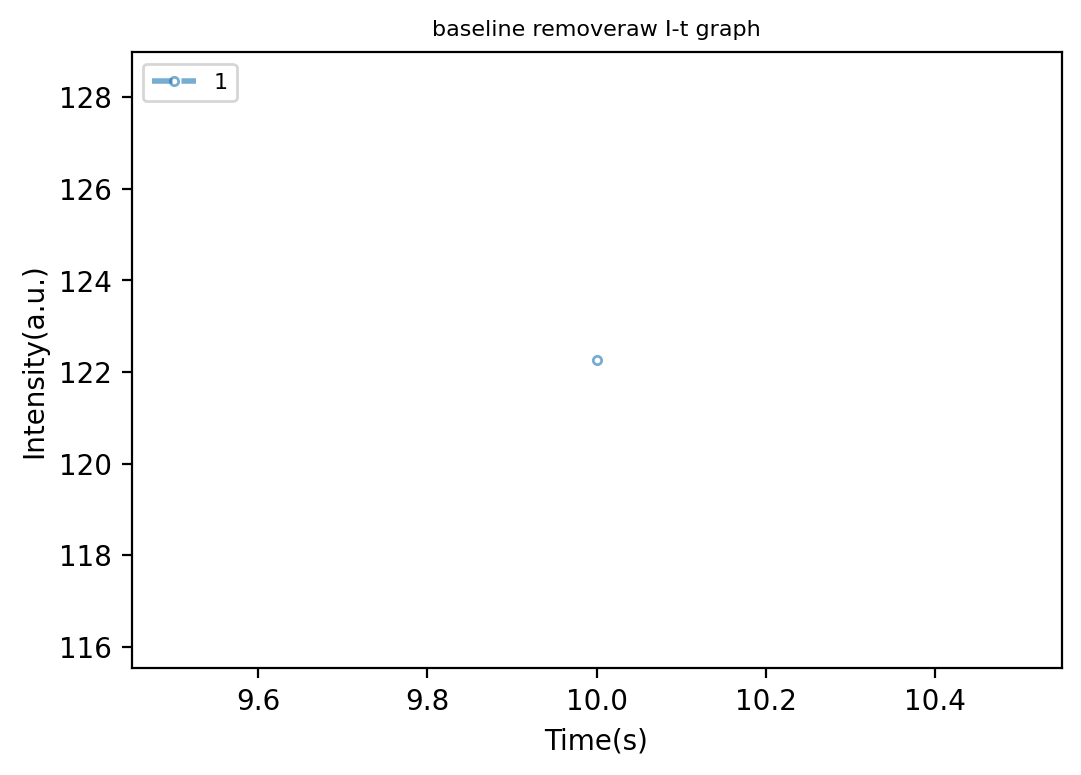

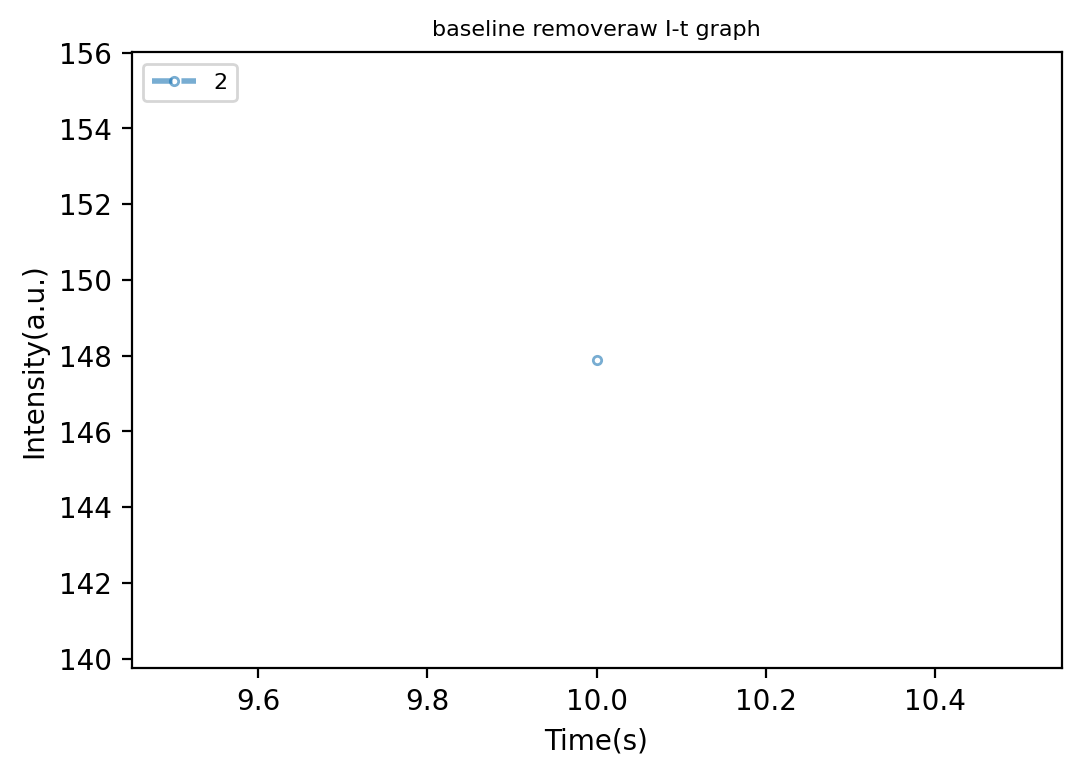

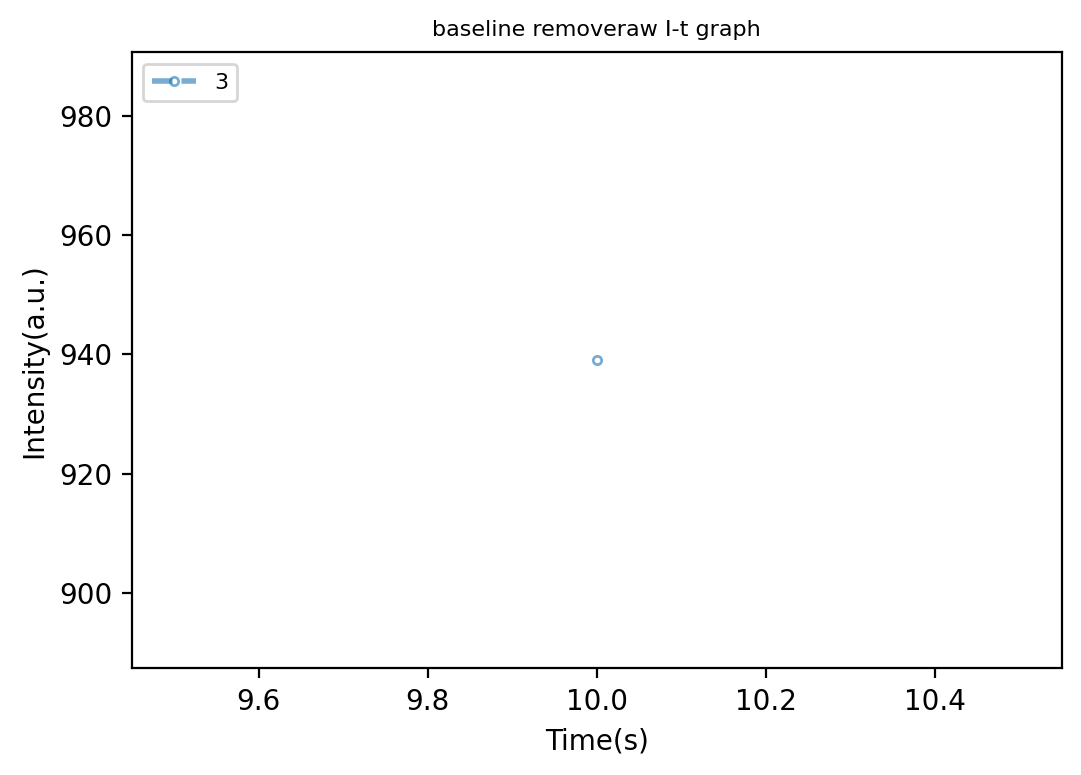

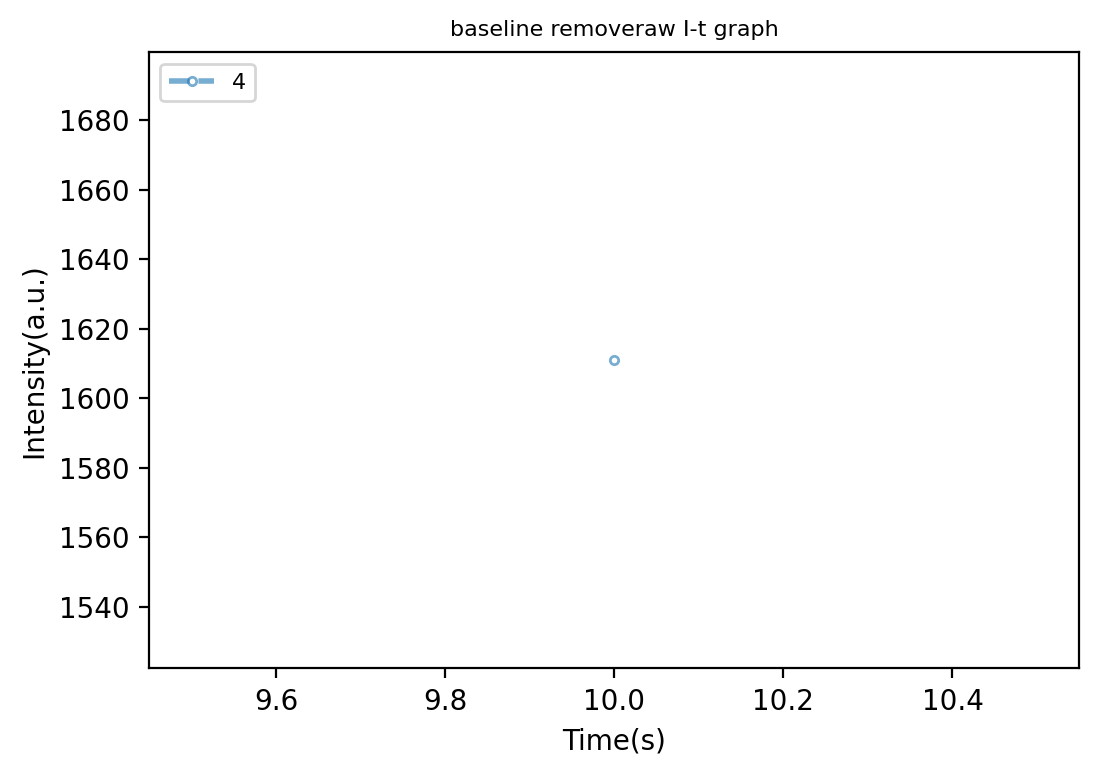

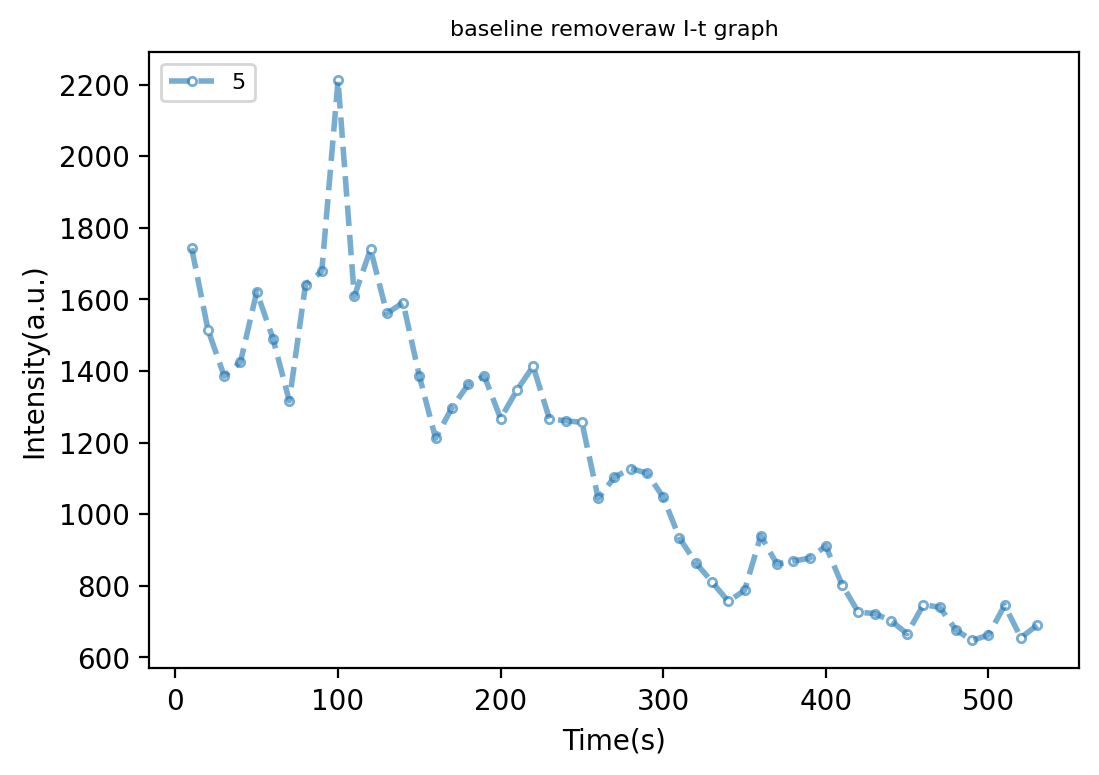

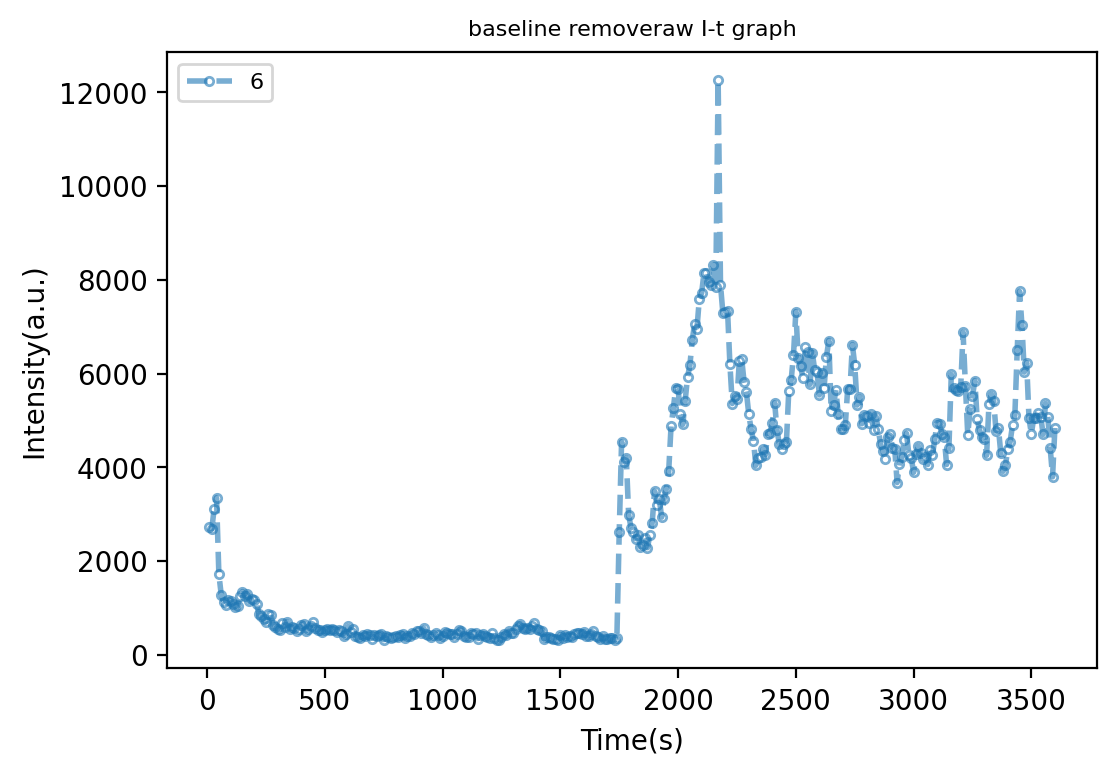

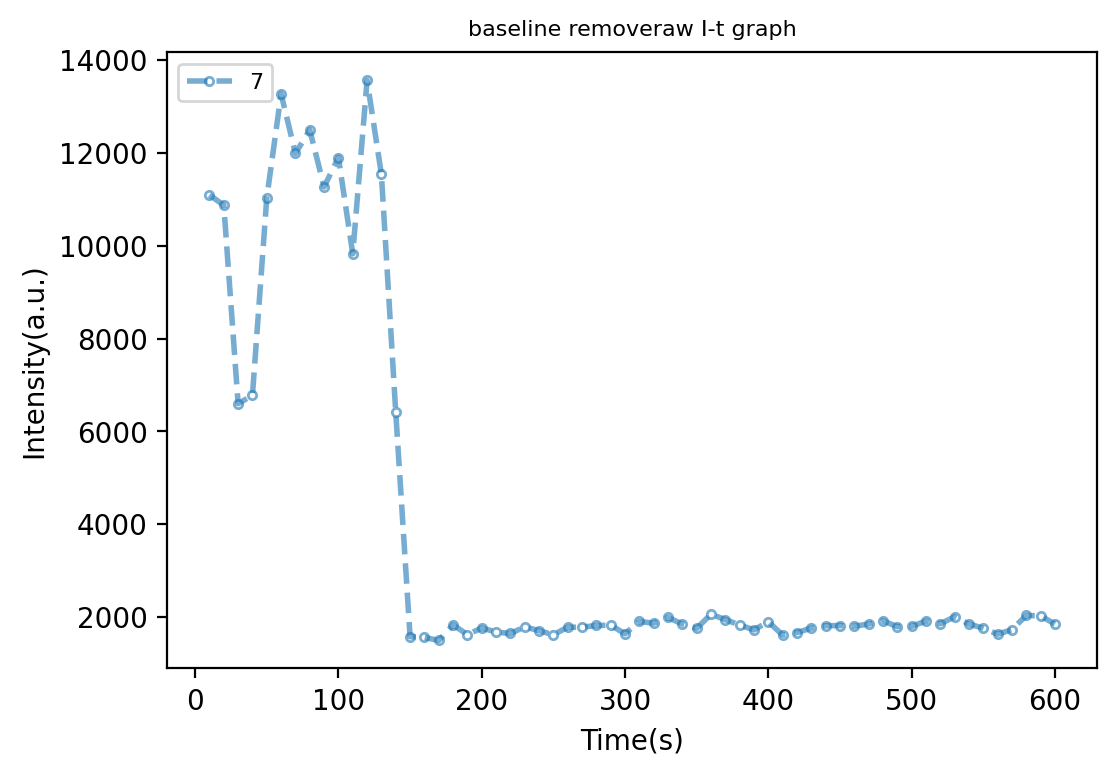

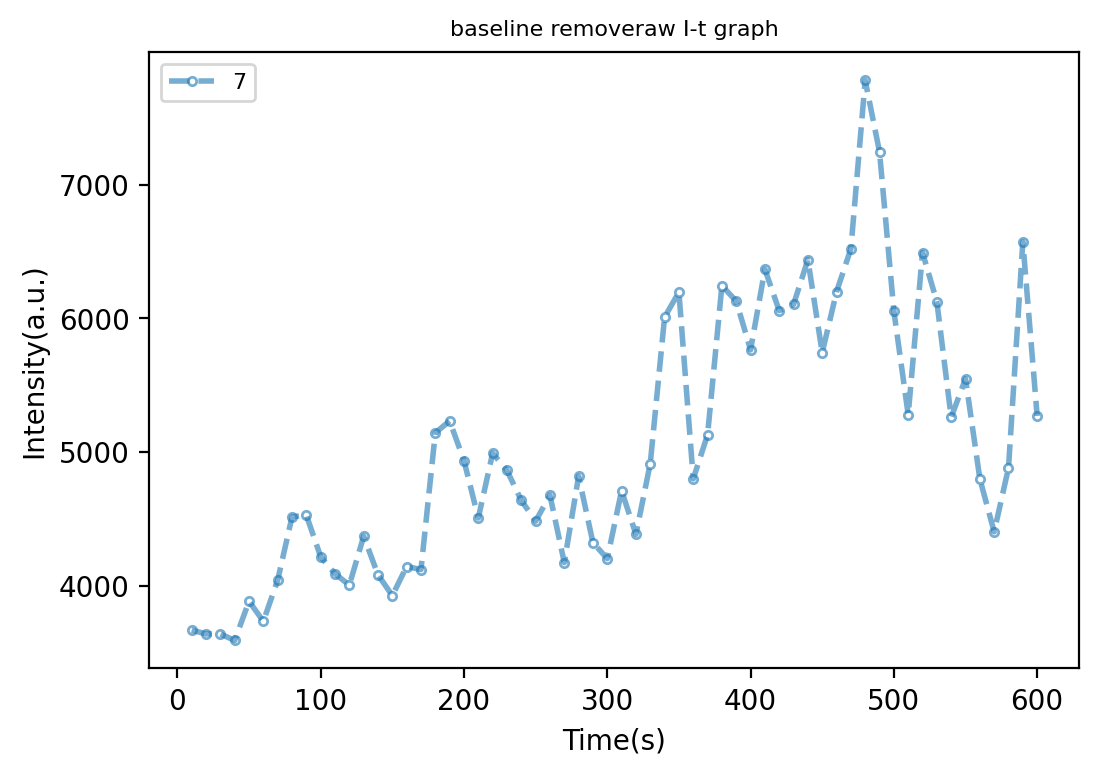

In [ ]:
upper_class_path = '/content/drive/MyDrive/analysis/raman_analysis_/20230726-20230802 porous gold/20230802 porous au test'
save_path =upper_class_path
time_gap = 10 #'s'
name = 'baseline remove'
mode1 ='raw'
mode2 = 'overall'
#Time_dependent_raman_drawing(upper_class_path,save_path,time_gap,name+mode1,mode1)
#Time_dependent_raman_drawing(upper_class_path,save_path,time_gap,name+mode2,mode2)
Time_dependent_raman_drawing_individual_drawing(upper_class_path,save_path,time_gap,name+mode1,
                                                mode1,baseline_remove_switch=True,find_peak_position=(700,750))


In [ ]:
upper_class_path = '/content/drive/MyDrive/analysis/raman_analysis_/20230706 R6G scanning/7/'
save_path =upper_class_path
solution_concentration = 'R6G 1e-6M '
name = '-500mV ' + solution_concentration
label= 'well scanning'
nn1 ='individual normalization'
nn2 ='overall normalization'
nn3 ='raw'
mode1='individual'
mode2='overall'
mode3='raw'
Distance_raman_drawing(upper_class_path,save_path,name+nn1,description_label=nn1,normalization=mode1,calibration_for_time_shift = True)
Distance_raman_drawing(upper_class_path,save_path,name+nn2,description_label=nn2,normalization=mode2,calibration_for_time_shift = True)
Distance_raman_drawing(upper_class_path,save_path,name,description_label=nn3,normalization=mode3,calibration_for_time_shift = True)

In [ ]:
#### Baseline_remove_data



In [ ]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
path ='/content/drive/MyDrive/analysis/raman_analysis_/20230406_R6G_test/noshift/'
a = return_folders_path(path)
b =sort_times(a)
print(b)

ValueError: ignored

In [ ]:
upper_class_path = '/content/drive/MyDrive/analysis/raman_analysis_/20230406_R6G_test/noshift'
save_path = upper_class_path
description_label = 'Z-axis scanning tests, Peak signal change with time at ITO surface'
position,intensity,condition_label=get_maxpoints_position_value(upper_class_path,peak_position_approx=(0,1000))
###Read

/content/drive/MyDrive/analysis/raman_analysis_/20230406_R6G_test/noshift/


  0%|          | 0/11 [00:00<?, ?it/s]


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_20.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_66.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_4.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_38.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_46.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_11.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,0min_forward_sysmmetry_location_newITO_27.txt:   0%|


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,5min_forward_sysmmetry_location_newITO_54.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,5min_forward_sysmmetry_location_newITO_40.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,5min_forward_sysmmetry_location_newITO_50.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,5min_forward_sysmmetry_location_newITO_14.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,5min_forward_sysmmetry_location_newITO_12.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,5min_forward_sysmmetry_location_newITO_4.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,5min_forward_sysmmetry_location_newITO_46.txt:   0%|


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,10min_forward_sysmmetry_location_newITO_15.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,10min_forward_sysmmetry_location_newITO_25.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,10min_forward_sysmmetry_location_newITO_24.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,10min_forward_sysmmetry_location_newITO_35.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,10min_forward_sysmmetry_location_newITO_21.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,10min_forward_sysmmetry_location_newITO_54.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,10min_forward_sysmmetry_location_newITO_40.txt


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,15min_forward_sysmmetry_location_newITO_61.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,15min_forward_sysmmetry_location_newITO_66.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,15min_forward_sysmmetry_location_newITO_65.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,15min_forward_sysmmetry_location_newITO_62.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,15min_forward_sysmmetry_location_newITO_64.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,15min_forward_sysmmetry_location_newITO_63.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,15min_forward_sysmmetry_location_newITO_3.txt:


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,20min_forward_sysmmetry_location_newITO_53.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,20min_forward_sysmmetry_location_newITO_39.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,20min_forward_sysmmetry_location_newITO_56.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,20min_forward_sysmmetry_location_newITO_6.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,20min_forward_sysmmetry_location_newITO_2.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,20min_forward_sysmmetry_location_newITO_9.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,20min_forward_sysmmetry_location_newITO_37.txt: 


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,25min_forward_sysmmetry_location_newITO_44.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,25min_forward_sysmmetry_location_newITO_5.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,25min_forward_sysmmetry_location_newITO_20.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,25min_forward_sysmmetry_location_newITO_7.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,25min_forward_sysmmetry_location_newITO_13.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,25min_forward_sysmmetry_location_newITO_13.txt:   8%|▊         | 5/66 [00:00<00:01, 47.36it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,25min_forward_sysmmetry_location_newIT


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,53min_forward_sysmmetry_location_newITO_55.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,53min_forward_sysmmetry_location_newITO_24.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,53min_forward_sysmmetry_location_newITO_1.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,53min_forward_sysmmetry_location_newITO_33.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,53min_forward_sysmmetry_location_newITO_42.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,53min_forward_sysmmetry_location_newITO_42.txt:   8%|▊         | 5/66 [00:00<00:01, 35.95it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_0v,53min_forward_sysmmetry_location_newIT


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,29min_forward_sysmmetry_location_newITO_61.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,29min_forward_sysmmetry_location_newITO_37.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,29min_forward_sysmmetry_location_newITO_9.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,29min_forward_sysmmetry_location_newITO_49.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,29min_forward_sysmmetry_location_newITO_42.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,29min_forward_sysmmetry_location_newITO_62.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,29min_forward_sysm


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,34min_forward_sysmmetry_location_newITO_59.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,34min_forward_sysmmetry_location_newITO_63.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,34min_forward_sysmmetry_location_newITO_65.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,34min_forward_sysmmetry_location_newITO_62.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,34min_forward_sysmmetry_location_newITO_48.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,34min_forward_sysmmetry_location_newITO_49.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,34min_forward_sysm


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,39min_forward_sysmmetry_location_newITO_29.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,39min_forward_sysmmetry_location_newITO_43.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,39min_forward_sysmmetry_location_newITO_4.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,39min_forward_sysmmetry_location_newITO_31.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,39min_forward_sysmmetry_location_newITO_8.txt:   0%|          | 0/66 [00:00<?, ?it/s] 
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,39min_forward_sysmmetry_location_newITO_41.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,39min_forward_sysm


the distance gap is 30 um




  0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,52minshift_forward_sysmmetry_location_newITO_63.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,52minshift_forward_sysmmetry_location_newITO_49.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,52minshift_forward_sysmmetry_location_newITO_58.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,52minshift_forward_sysmmetry_location_newITO_64.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,52minshift_forward_sysmmetry_location_newITO_47.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND_ITo_-400mv,52minshift_forward_sysmmetry_location_newITO_62.txt:   0%|          | 0/66 [00:00<?, ?it/s]
Now processing inner circle...SINW_R6G1e-7_240ND

[array([630]), array([570]), array([600]), array([630]), array([630]), array([660]), array([960]), array([990]), array([930]), array([960]), array([990])]


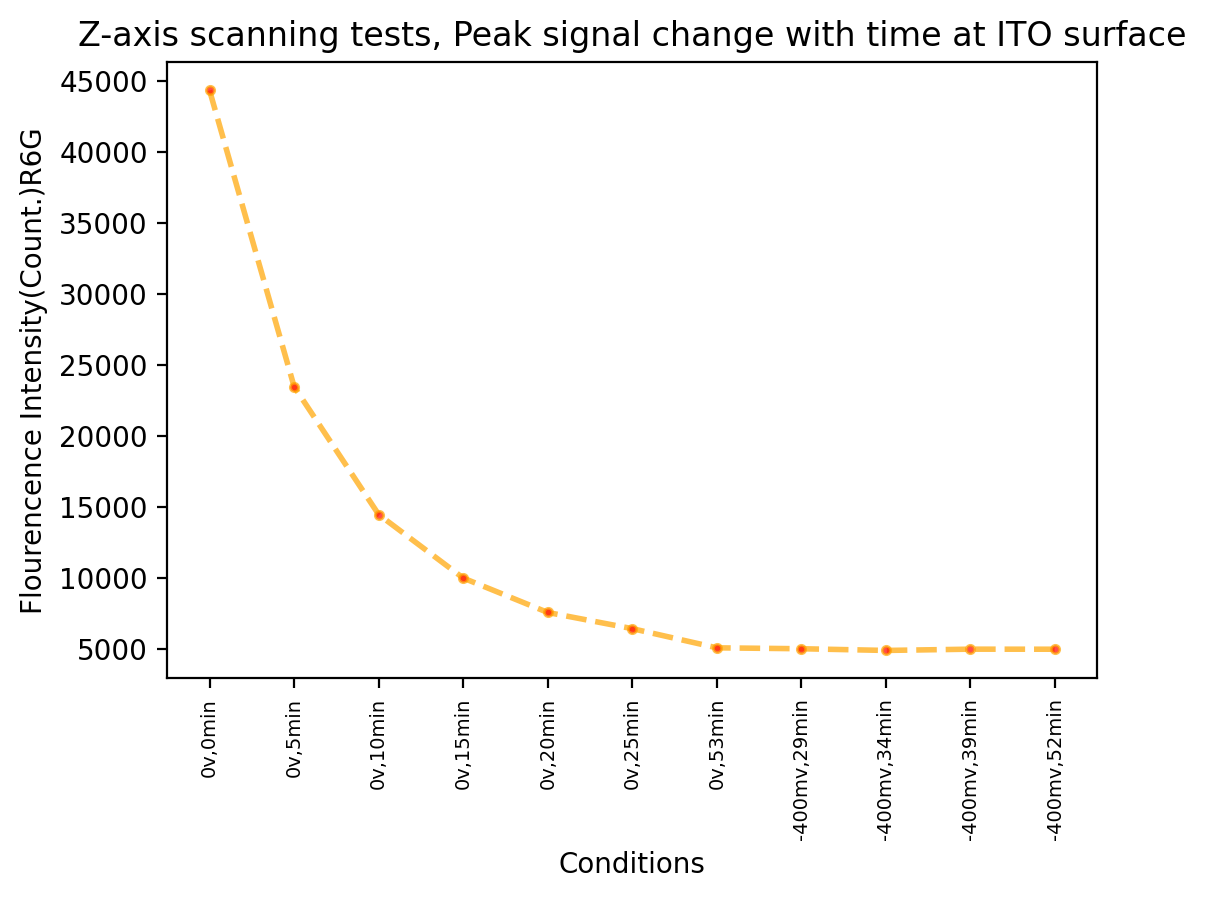

In [ ]:
fig, ax = plt.subplots(figsize=(6,4),dpi=200)
x = [i+1 for i in range(len(intensity))]
x_labels = condition_label
plt.xticks(x, x_labels,fontsize=7)
ax.plot(x , intensity,'.--',color='orange',markerfacecolor='red',alpha = .7,linewidth=2)
ax.tick_params(axis='x', rotation=90)

# ax.legend(condition_list,fontsize=4,loc='upper left')
ax.set(ylabel='Flourencence Intensity(Count.)R6G',xlabel='Conditions')
ax.set(title= '%s'%description_label)
#ax.set_ylim(20000,30000)
# ax.title.set_size(8)
ax.autoscale()
plt.savefig(save_path+'%s%s.png'%(upper_class_path.split('/')[-1],description_label),dpi=600)
print(position)

##drawing the plot


In [ ]:
import re

def parse_time(time_str):
    voltage, time = time_str.split(',')
    match = re.match(r'(\d+)\s*(\S+)', time)
    if not match:
        raise ValueError('Invalid time string')
    value = int(match.group(1))
    unit = match.group(2)
    if unit == 'min':
        return value
    elif unit == 'sec':
        return value / 60
    elif unit == 'hr':
        return value * 60
    else:
        raise ValueError('Invalid time unit')

def sort_times(times):
    sorted_times = sorted(times, key=parse_time)
    return sorted_times

times = ['80mv,3min', '110mv,110min', '90mv,6min', '60mv,1hr']
sorted_times = sort_times(times)
print(sorted_times)


['80mv,3min', '90mv,6min', '60mv,1hr', '110mv,110min']


In [ ]:
###Debug for max func

path ='/content/drive/MyDrive/analysis/Raman_analyze/20230126 R6G/5um NW/circle3'
plot_list = i_distance_graph_value_return(path,show_peak_positon=False)
print(plot_list)
max_position =[]
max_intensity = []
max_intensity.append(plot_list[:,1].max())
x =np.where((plot_list[:,0]>1500) & (plot_list[:,0]<1600) )
#max_position.append(plot_list[x,0])
print(x)
print(plot_list[x])


the distance gap is 30 um


Now processing inner circle...on PMMA SINW_D.I Water_1.540uw_ITo_0v,0min_forward_sysmmetry_circle4_30.txt: 100%|██████████| 75/75 [00:01<00:00, 59.16it/s]

[[   0    0]
 [  30  630]
 [  60  634]
 [  90  630]
 [ 120  637]
 [ 150  636]
 [ 180  634]
 [ 210  641]
 [ 240  643]
 [ 270  651]
 [ 300  669]
 [ 330  685]
 [ 360  725]
 [ 390  804]
 [ 420  892]
 [ 450  858]
 [ 480  775]
 [ 510  724]
 [ 540  695]
 [ 570  685]
 [ 600  679]
 [ 630  673]
 [ 660  671]
 [ 690  668]
 [ 720  670]
 [ 750  670]
 [ 780  662]
 [ 810  662]
 [ 840  659]
 [ 870  661]
 [ 900  660]
 [ 930  665]
 [ 960  666]
 [ 990  658]
 [1020  657]
 [1050  660]
 [1080  660]
 [1110  665]
 [1140  656]
 [1170  660]
 [1200  655]
 [1230  657]
 [1260  659]
 [1290  659]
 [1320  656]
 [1350  660]
 [1380  651]
 [1410  659]
 [1440  657]
 [1470  662]
 [1500  661]
 [1530  665]
 [1560  667]
 [1590  681]
 [1620  700]
 [1650  688]
 [1680  662]
 [1710  649]
 [1740  649]
 [1770  640]
 [1800  640]
 [1830  648]
 [1860  645]
 [1890  640]
 [1920  635]
 [1950  636]
 [1980  632]
 [2010  633]
 [2040  635]
 [2070  633]
 [2100  638]
 [2130  637]
 [2160  637]
 [2190  637]
 [2220  637]
 [2250  632]]
(array([51,

## Fit Curve of quenching

In [ ]:
from matplotlib import text
import matplotlib.pyplot as plt
from pandas.core import indexes
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import re

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from functools import wraps




def return_folders_path(path):
  path_list = []
  for top,dirs,files in os.walk(path):
    for dir in dirs:
      path=os.path.join(top,dir)
      path_list.append(path)
  return path_list


def return_files_path(path):
  file_list = []
  for top,dirs,files in os.walk(path):
    for file in files:
      path=os.path.join(top,file)
      file_list.append(path)
  return file_list

def delete_upper_class_folder_path(path_list):
  for path in path_list:
    file_list = os.listdir(path)
    for file in file_list:
      #print(file)
      if os.path.isdir(os.path.join(path,file)):
        path_list.remove(path)
        print('removing upper folder%s'%path)
        break#遇到第一个folder 删除上级路径
  return path_list

def second_largest(a_array):
  m1 = a_array.max()
  b =np.delete(a_array,np.where(a_array == m1))
  m2 = b.max()
  return m2

def List_sort(a_list):
  fns = lambda s: sum(((s,int(n))for s,n in re.findall('(\D+)(\d+)','a%s0'%s)),())
  return sorted(a_list, key=fns)
  ### Ref

def fit_curve(degree):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            x, y = func(*args, **kwargs)

            poly_features = PolynomialFeatures(degree=degree)
            x_poly = poly_features.fit_transform(x)

            model = LinearRegression()
            model.fit(x_poly,y)
            y_pred = model.predict(x_poly)
            r2 =r2_score(y,y_pred)
            plt.plot(x, y_pred, color='red')


            # model2 = LinearRegression()
            # model2.fit(x_poly[100:600],y[100:600])
            # y_pred_2 = model2.predict(x_poly[100:600])
            # r2_2 =r2_score(y[100:600],y_pred_2)
            # plt.plot(x[100:600], y_pred_2, color='orange')
            plt.scatter(x, y, s=10)
            plt.legend(['raw data','Linear Fitting'])
            plt.show()


            return model.coef_,model.intercept_,r2
        return wrapper
    return decorator




# @fit_curve(degree=1)
# def plot_function(ax,x_value,y_value,condition,line_color =[],ylim_scale=(),description_label=''):

#   if line_color:
#       for color in line_color:
#         ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2,color=color)
#   else:
#       ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2)

#   return x_value.reshape(-1,1),y_value
@fit_curve(degree=1)
def fitting_decorate_time_dependent_raman_drawing(tot_folder_path,save_path,time_gap,description_label='',normalization = 'overall',line_color =[],ylim_scale=()):

  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)
  fig, ax = plt.subplots(figsize=(6,4),dpi=200)
  #plt.ylim((0,1.1))


  ###

  if normalization == 'overall':
    y_max = 1
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path,distance_gap=time_gap)

      if y_max < plot_list[1:,1].max():
        y_max = plot_list[1:,1].max()
        print('\nThe Normalization y_max =%.2f'%y_max)
    print('\nThe Normalization found! y_max =%.2f'%y_max)


  for path in path_bar:
    files_list = return_files_path(path)
    condition = description_label+','+path.split('/')[-2]+','+path.split('/')[-1]
    condition_list.append(condition)
    # plot_path = os.path.join(Upper_folder_path,file)
    # file_path = plot_path
    #plt.xlim((50,600))
    plot_list = i_distance_graph_value_return(path,distance_gap=time_gap,show_peak_positon=False)

    x_value = plot_list[1:,0]
    if normalization == 'overall':
      y_value = plot_list[1:,1]/y_max #* parameter[count]
    elif normalization == 'individual':
      #y_value = plot_list[1:,1]/second_largest(plot_list[1:,1])
      y_value = plot_list[1:,1]/plot_list[1:,1].max()
    else:
      y_value = plot_list[1:,1]

    if line_color:
      for color in line_color:
        ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2,color=color)
    else:
      ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2)
    print('finished drawing <%s> figure'%condition)
    path_bar.set_description('Now processing...%s'%condition)
  # ax.legend(condition_list,fontsize=4,loc='upper left')
  ax.set(ylabel='Flourencence Intensity(Count.)R6G',xlabel='Time(s)')
  ax.set(title= '%s I-t graph'%description_label)
  ax.title.set_size(8)
  ### autoscale or manually
  if ylim_scale:
    plt.ylim(ylim_scale)
  else:
    ax.autoscale()
  plt.savefig(save_path+'%s%s.png'%(Upper_folder_path.split('/')[-1],description_label),dpi=600)
  return x_value.reshape(-1,1),y_value


  0%|          | 0/1 [00:00<?, ?it/s]

the distance gap is 6 um



  0%|          | 0/200 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0-20min_BLEACHING TEST AT silicon surface_3.txt:   0%|          | 0/200 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0-20min_BLEACHING TEST AT silicon surface_1.txt:   0%|          | 0/200 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0-20min_BLEACHING TEST AT silicon surface_41.txt:   0%|          | 0/200 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0-20min_BLEACHING TEST AT silicon surface_21.txt:   0%|          | 0/200 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0-20min_BLEACHING TEST AT silicon surface_21.txt:   2%|▏         | 4/200 [00:00<00:05, 38.17it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0-20min_BLEACHING TEST AT silicon surface_14.txt:   2%|▏         | 4/200 [00:00<00:05, 38.17it/s]
Now processing inner 


The Normalization y_max =23706.00

The Normalization found! y_max =23706.00
the distance gap is 6 um


Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0-20min_BLEACHING TEST AT silicon surface_187.txt: 100%|██████████| 200/200 [00:02<00:00, 74.99it/s]


finished drawing <Fitting quenching test silicon surface, time Gap 6s, $10^{-7}$ M R6G overall,test2,BLEACHING TEST AT silicon surface> figure


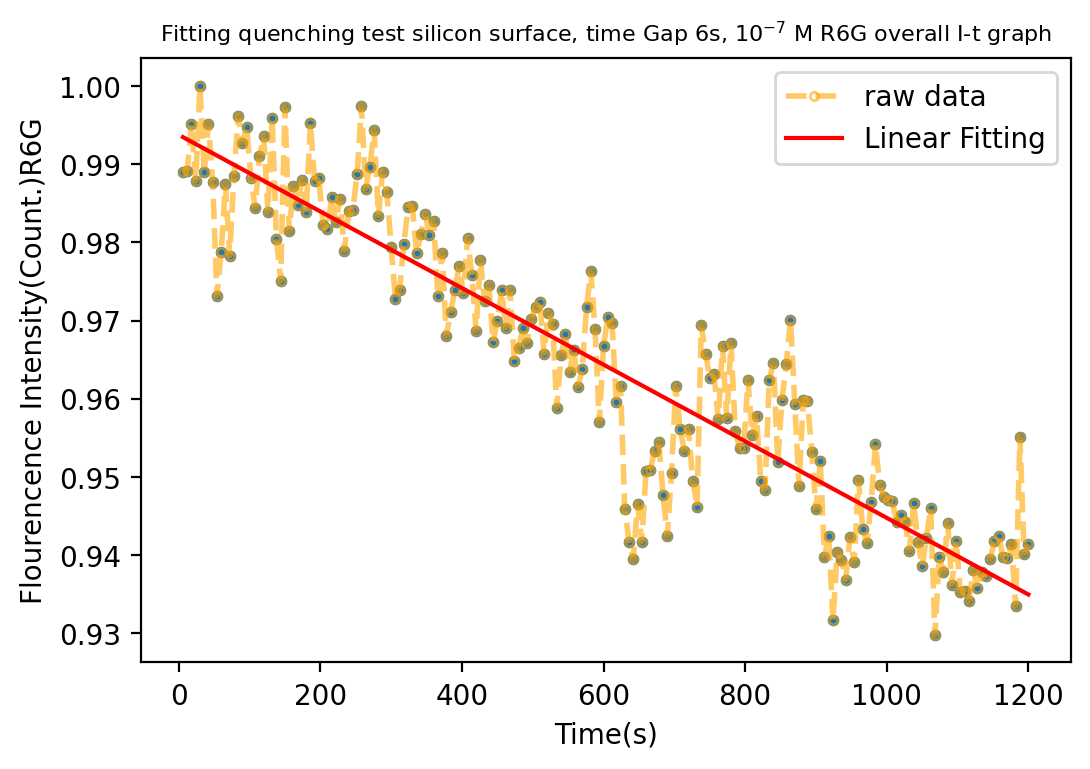

In [ ]:
upper_class_path = '/content/drive/MyDrive/analysis/Raman_analyze/20230127 r6g/5um PMMA coated sinw_2/R6G1e-7/0v Bleaching Test/test2'
save_path =upper_class_path
time_gap = 6 #'s'
name = 'Fitting quenching test silicon surface, time Gap 6s, $10^{-7}$ M R6G '
mode1 ='raw'
mode2 = 'overall'
color = ['orange']
coef,intercept,r2 =fitting_decorate_time_dependent_raman_drawing(upper_class_path,save_path,time_gap,name+mode2,mode2,line_color=color)
#Time_dependent_raman_drawing(upper_class_path,save_path,time_gap,name+mode2,mode2,ylim_scale=(0,1.2))


In [ ]:
expression = np.poly1d(np.append(coef, intercept))
print(expression)
print(r2)

 
-4.897e-05 x + 0.9937
0.8535252314518763


In [ ]:
a=[1,3,4,5,6]
a[2:]

[4, 5, 6]

## ReCalibration the peak
- add using re to find time in condition
- calibration peak using linear fitting result from above

In [ ]:
from matplotlib import text
import matplotlib.pyplot as plt
from pandas.core import indexes
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import re




def return_folders_path(path):
  path_list = []
  for top,dirs,files in os.walk(path):
    for dir in dirs:
      path=os.path.join(top,dir)
      path_list.append(path)
  return path_list


def return_files_path(path):
  file_list = []
  for top,dirs,files in os.walk(path):
    for file in files:
      path=os.path.join(top,file)
      file_list.append(path)
  return file_list

def delete_upper_class_folder_path(path_list):
  for path in path_list:
    file_list = os.listdir(path)
    for file in file_list:
      #print(file)
      if os.path.isdir(os.path.join(path,file)):
        path_list.remove(path)
        print('removing upper folder%s'%path)
        break#遇到第一个folder 删除上级路径
  return path_list

def second_largest(a_array):
  m1 = a_array.max()
  b =np.delete(a_array,np.where(a_array == m1))
  m2 = b.max()
  return m2

def List_sort(a_list):
  fns = lambda s: sum(((s,int(n))for s,n in re.findall('(\D+)(\d+)','a%s0'%s)),())
  return sorted(a_list, key=fns)
  ### Ref

def extract_the_time_from_conditon_first(condition):
  pattern = re.compile(r'\d+')
  time = pattern.search(condition)
  if time:
     time_out = time.group()
     print(time_out) ## return the first match number
  return time_out

def extract_the_time_from_conditon(condition):
  pattern = re.compile(r'\d+')
  time = re.findall(pattern,condition)
  if time:
    print(time)
  return time

def Time_dependent_raman_drawing(tot_folder_path,save_path,time_gap,description_label='',normalization = 'overall',line_color =[],ylim_scale=()):

  peak_find_area_inner = (1600,1700)

  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)
  fig, ax = plt.subplots(figsize=(6,4),dpi=200)
  #plt.ylim((0,1.1))


  ###

  if normalization == 'overall':
    y_max = 1
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path,distance_gap=time_gap,peak_find_area=peak_find_area_inner)

      if y_max < plot_list[1:,1].max():
        y_max = plot_list[1:,1].max()
        print('\nThe Normalization y_max =%.2f'%y_max)
    print('\nThe Normalization found! y_max =%.2f'%y_max)


  for path in path_bar:
    files_list = return_files_path(path)
    condition = description_label+','+path.split('/')[-2]+','+path.split('/')[-1]
    condition_list.append(condition)
    # plot_path = os.path.join(Upper_folder_path,file)
    # file_path = plot_path
    #plt.xlim((50,600))
    plot_list = i_distance_graph_value_return(path,distance_gap=time_gap,show_peak_positon=False,peak_find_area=peak_find_area_inner)

    x_value = plot_list[1:,0]
    if normalization == 'overall':
      y_value = plot_list[1:,1]/y_max #* parameter[count]
    elif normalization == 'individual':
      #y_value = plot_list[1:,1]/second_largest(plot_list[1:,1])
      y_value = plot_list[1:,1]/plot_list[1:,1].max()
    else:
      y_value = plot_list[1:,1]

    if line_color:
      for color in line_color:
        ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2,color=color)
    else:
      ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2)
    print('finished drawing <%s> figure'%condition)
    path_bar.set_description('Now processing...%s'%condition)
  ax.legend(condition_list,fontsize=4,loc='upper left')
  ax.set(ylabel='Flourencence Intensity(Count.)R6G',xlabel='Time(s)')
  ax.set(title= '%s I-t graph'%description_label)
  ax.title.set_size(8)
  ### autoscale or manually
  if ylim_scale:
    plt.ylim(ylim_scale)

  else:
    ax.autoscale()
  plt.savefig(save_path+'%s%s.png'%(Upper_folder_path.split('/')[-1],description_label),dpi=600)


def Calibrationed_Distance_raman_drawing(tot_folder_path,save_path
                                         ,description_label='',normalization = 'overall'
                                         ,cali_param_list=[]):

  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)
  count =0
  fig, ax = plt.subplots(figsize=(6,4),dpi=200)
  #plt.ylim((0,1.1))


  ###

  if normalization == 'overall':
    y_max = 1
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path)

      if y_max < plot_list[1:,1].max():
        y_max = plot_list[1:,1].max()
        print('\nThe Normalization y_max =%.2f'%y_max)
    print('\nThe Normalization found! y_max =%.2f'%y_max)

  if normalization == 'max_peak_plot':
    max_position =[]
    max_intensity = []
    for path in path_bar:
      plot_list = i_distance_graph_value_return(path)

      max_intensity.append(plot_list[:,1].max())
      x,y = np.where(plot_list==plot_list[:,1].max())
      max_position.append(plot_list[x,0])
    print(max_position)
    print(max_intensity)


#####
  for path in path_bar:
    files_list = return_files_path(path)
    condition = description_label+','+path.split('/')[-2]+','+path.split('/')[-1]
    condition_list.append(condition)
    # plot_path = os.path.join(Upper_folder_path,file)
    # file_path = plot_path
    #plt.xlim((50,600))
    plot_list = i_distance_graph_value_return(path,show_peak_positon=False)

    x_value = plot_list[1:,0]
    if normalization == 'overall':
      y_value = plot_list[1:,1]/y_max #* parameter[count]
    elif normalization == 'individual':
      #y_value = plot_list[1:,1]/second_largest(plot_list[1:,1])
      y_value = plot_list[1:,1]/plot_list[1:,1].max()
    elif normalization == 'max_peak_plot':
      x_value = max_position
      y_value = max_intensity
    else:
      y_value = plot_list[1:,1]

###### calibration parameter calc from get_maxpoints_position_value
    factor = float(cali_param_list[count])
    count+=1
    y_value[49:52] = y_value[49:52] *factor
    ax.plot(x_value , y_value,'.--',markerfacecolor='none',alpha = .6,linewidth=2)
    print('finished drawing <%s> figure'%condition)
    path_bar.set_description('Now processing...%s'%condition)
  ax.legend(condition_list,fontsize=3,loc='upper left')
  ax.set(ylabel='Flourencence Intensity(Count.)',xlabel='Displacement($\mu$m)')
  ax.set(title= '%s I-D graph'%description_label)
  ax.title.set_size(8)
  ax.autoscale()
  plt.savefig(save_path+'%s%s.png'%(Upper_folder_path.split('/')[-1],description_label),dpi=600)

def get_maxpoints_position_value(tot_folder_path,peak_confine =True,peak_position_approx=(1500,1600),linear_cali_param=(),linear_cali_param2=()):
  Upper_folder_path = tot_folder_path
  condition_list =[]
  path_c = List_sort(return_folders_path(Upper_folder_path))
  delete_upper_class_folder_path(delete_upper_class_folder_path(path_c))
  path_bar = tqdm(path_c)
  max_position =[]
  max_intensity = []
  cali_para_list=[]
  for path in path_bar:
    condition = path.split('/')[-1]
    condition_list.append(condition)
    plot_list = i_distance_graph_value_return(path)
    ###### calibration
    if linear_cali_param and linear_cali_param2:
      condition_voltage_time = path.split('/')[-1] ##(format 0v,25min)etc.
      print('check %s'%condition_voltage_time)
      time = extract_the_time_from_conditon(condition_voltage_time)
      if len(time) ==3:
        a,b = linear_cali_param
        signal_decay = a * float(time[1])*60 +1 ##min==> s
        a,b =linear_cali_param2
        signal_decay += a * float(time[2])*60
        print('voltage signal decay: %.2f' % signal_decay  )
        calibration_factor = 1/np.abs(signal_decay)
      elif len(time) ==2:
        a,b = linear_cali_param
        signal_decay = a * float(time[1])*60 +b ##min==> s
        print('0v signal decay: %.2f' % signal_decay  )
        calibration_factor = 1/np.abs(signal_decay)
    else:
      calibration_factor =1
    try:
      cali_para_list.append(calibration_factor)
    except ZeroDivisionError:
      print("No Calibration parameter obtained. Please Check")

    if peak_confine == True:
      start,end = peak_position_approx
      peak_position = np.where((plot_list[:,0]>start) & (plot_list[:,0]<end))
      peak_intensity = plot_list[peak_position,1].max()*calibration_factor
      max_intensity.append(peak_intensity)
      x,y = np.where(plot_list==peak_intensity)
      max_position.append(plot_list[x,0])
    else:
      max_intensity.append(plot_list[:,1].max())
      x,y = np.where(plot_list==plot_list[:,1].max())
      max_position.append(plot_list[x,0])
  cali_para_list_sim = ["{:.2f}".format(x) for x in cali_para_list]
  print(cali_para_list)
  print(cali_para_list_sim)
  #print(max_intensity)
  return max_position,max_intensity,condition_list,cali_para_list_sim

In [ ]:
def extract_the_time_from_conditon(condition):
  pattern = re.compile(r'\d+')
  time = re.findall(pattern,condition)
  if time:
    print(time)
  return time
a = extract_the_time_from_conditon('-1,25min+5')
print(a[2])
len(a)

['1', '25', '5']
5


3

  0%|          | 0/5 [00:00<?, ?it/s]

the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_22.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_22.txt:   1%|▏         | 1/75 [00:00<00:27,  2.71it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_4.txt:   1%|▏         | 1/75 [00:00<00:27,  2.71it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_4.txt:   3%|▎         | 2/75 [00:00<00:26,  2.73it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_12.txt:   3%|▎         | 2/75 [00:01<00:26,  2.73it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_12.txt:   4%|▍         | 3/75 [00:01<00:24,  2.98it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_

check 0v,0min
['0', '0']
0v signal decay: 1.00
the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_28.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_28.txt:   1%|▏         | 1/75 [00:00<00:22,  3.29it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_1.txt:   1%|▏         | 1/75 [00:00<00:22,  3.29it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_1.txt:   3%|▎         | 2/75 [00:00<00:28,  2.53it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_51.txt:   3%|▎         | 2/75 [00:01<00:28,  2.53it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_51.txt:   4%|▍         | 3/75 [00:01<00:26,  2.71it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_

check 0v,1min
['0', '1']
0v signal decay: 1.00
the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_46.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_46.txt:   1%|▏         | 1/75 [00:00<00:15,  4.81it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_35.txt:   1%|▏         | 1/75 [00:00<00:15,  4.81it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_35.txt:   3%|▎         | 2/75 [00:00<00:15,  4.63it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_43.txt:   3%|▎         | 2/75 [00:00<00:15,  4.63it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_43.txt:   4%|▍         | 3/75 [00:00<00:19,  3.78it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7

check 0v,6min
['0', '6']
0v signal decay: 0.98
the distance gap is 30 um



  0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_18.txt:   0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_18.txt:   1%|▏         | 1/74 [00:00<00:21,  3.33it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_8.txt:   1%|▏         | 1/74 [00:00<00:21,  3.33it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_8.txt:   3%|▎         | 2/74 [00:00<00:23,  3.03it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_32.txt:   3%|▎         | 2/74 [00:00<00:23,  3.03it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_32.txt:   4%|▍         | 3/74 [00:00<00:23,  3.05it/s]
Now processing inner circle...on PMMA SINW_R6

check 0v,11min
['0', '11']
0v signal decay: 0.97
the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_48.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_48.txt:   1%|▏         | 1/75 [00:00<00:19,  3.74it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_1.txt:   1%|▏         | 1/75 [00:00<00:19,  3.74it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_1.txt:   3%|▎         | 2/75 [00:00<00:17,  4.18it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_37.txt:   3%|▎         | 2/75 [00:00<00:17,  4.18it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_37.txt:   4%|▍         | 3/75 [00:00<00:20,  3.47it/s]
Now processing inner circle...on PMMA SINW_R6

check 0v,25min
['0', '25']
0v signal decay: 0.93
[1.0, 1.0029426336872382, 1.0179194540694383, 1.033350349169083, 1.0791560999298548]
['1.00', '1.00', '1.02', '1.03', '1.08']


  0%|          | 0/5 [00:00<?, ?it/s]

the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_22.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_4.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_12.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_27.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_62.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_25.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_loc

the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_28.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_1.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_51.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_47.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_14.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_40.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_loc

the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_46.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_35.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_43.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_3.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_30.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_17.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_loc

the distance gap is 30 um



  0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_18.txt:   0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_8.txt:   0%|          | 0/74 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_32.txt:   0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_1.txt:   0%|          | 0/74 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_20.txt:   0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_25.txt:   0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmme

the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_48.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_1.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_37.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_68.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_36.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_26.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmme

[1, 1, 1, 1, 1]
['1.00', '1.00', '1.00', '1.00', '1.00']
[array([1530]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]


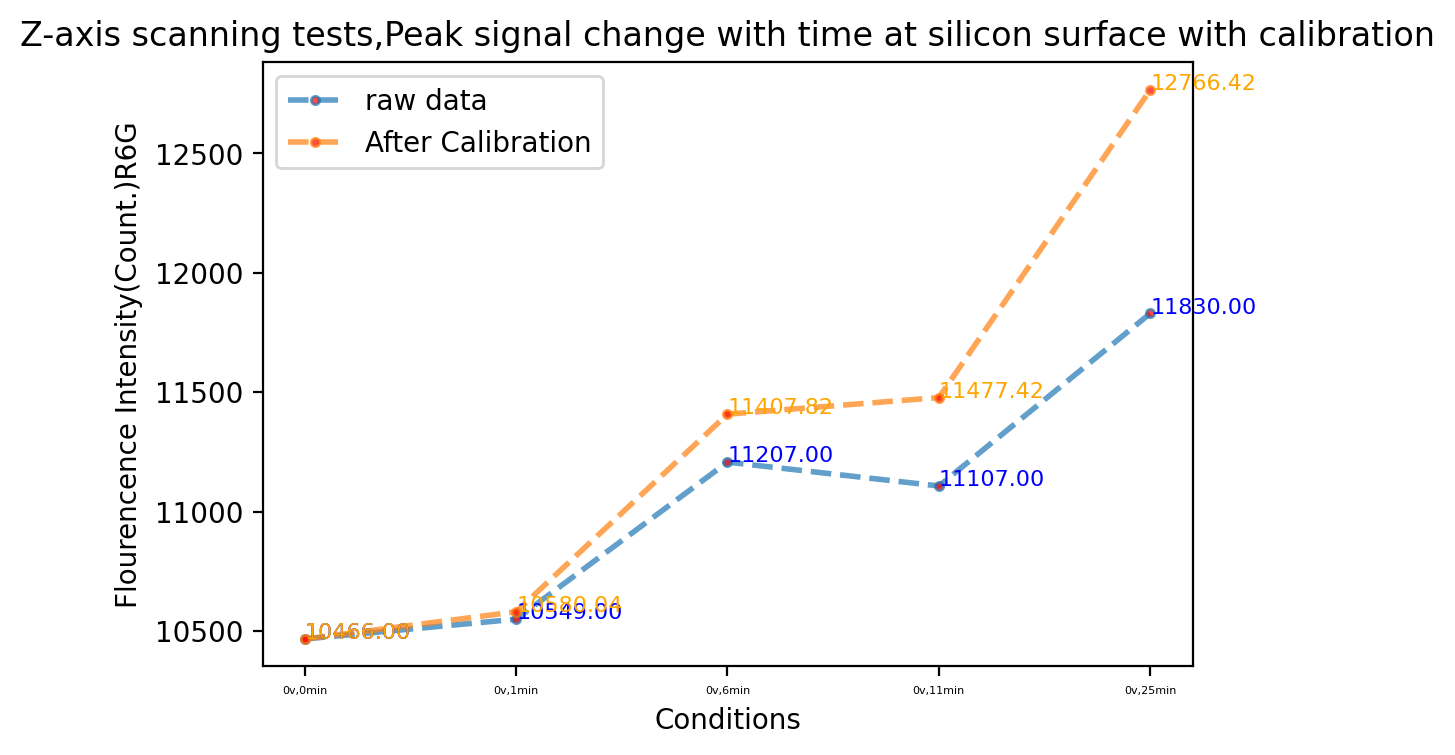

In [ ]:
upper_class_path = '/content/drive/MyDrive/analysis/Raman_analyze/20230127 r6g/5um PMMA coated sinw voltage/location 1/0v Laser effect'
save_path = upper_class_path
description_label = 'Z-axis scanning tests,Peak signal change with time at silicon surface with calibration'
cali_param = (-4.89e-5,1)
cali_param2 =(-1.989e-4,1)
position,intensity,condition_label,_=get_maxpoints_position_value(upper_class_path,peak_position_approx=(1500,1600),linear_cali_param=cali_param,linear_cali_param2=cali_param2)
position2,intensity2,_,_=get_maxpoints_position_value(upper_class_path,peak_position_approx=(1500,1600))
fig, ax = plt.subplots(figsize=(6,4),dpi=200)
x = [i+1 for i in range(len(intensity))]
x_labels = condition_label
plt.xticks(x, x_labels,fontsize=4)
ax.plot(x,intensity2,'.--',markerfacecolor='red',alpha = .7,linewidth=2,label='raw data')
ax.plot(x , intensity,'.--',markerfacecolor='red',alpha = .7,linewidth=2,label='After Calibration')
# ax.legend(condition_list,fontsize=4,loc='upper left')
for i in range(len(x)):
  ax.text(x[i],intensity2[i],'%.2f'%intensity2[i],fontsize=8,color='blue')
for i in range(len(x)):
  ax.text(x[i],intensity[i],'%.2f'%intensity[i],fontsize=8,color='orange')

ax.set(ylabel='Flourencence Intensity(Count.)R6G',xlabel='Conditions')
ax.set(title= '%s'%description_label)
ax.legend()
# ax.title.set_size(8)
ax.autoscale()
plt.savefig(save_path+'%s%s.png'%(upper_class_path.split('/')[-1],description_label),dpi=600)
print(position)

### Calibrate the peak

  0%|          | 0/5 [00:00<?, ?it/s]

the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_22.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_4.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_12.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_27.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_27.txt:   5%|▌         | 4/75 [00:00<00:02, 34.75it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forward_sysmmetry_location 1_62.txt:   5%|▌         | 4/75 [00:00<00:02, 34.75it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,0min_forwa

finished drawing <Calibrated Z-Axis scanning test data R6G 1e-7M raw,0v Laser effect,0v,0min> figure
the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_28.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_1.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_51.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_47.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_47.txt:   5%|▌         | 4/75 [00:00<00:02, 34.07it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forward_sysmmetry_location 1_14.txt:   5%|▌         | 4/75 [00:00<00:02, 34.07it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,1min_forwa

finished drawing <Calibrated Z-Axis scanning test data R6G 1e-7M raw,0v Laser effect,0v,1min> figure
the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_46.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_35.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_43.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_3.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_3.txt:   5%|▌         | 4/75 [00:00<00:02, 35.39it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forward_sysmmetry_location 1_30.txt:   5%|▌         | 4/75 [00:00<00:02, 35.39it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,6min_forwar

finished drawing <Calibrated Z-Axis scanning test data R6G 1e-7M raw,0v Laser effect,0v,6min> figure
the distance gap is 30 um



  0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_18.txt:   0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_8.txt:   0%|          | 0/74 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_32.txt:   0%|          | 0/74 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_32.txt:   4%|▍         | 3/74 [00:00<00:04, 17.75it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_1.txt:   4%|▍         | 3/74 [00:00<00:04, 17.75it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,11min_forward_sysmmetry_location 1_20.txt:   4%|▍         | 3/74 [00:00<00:04, 17.75it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo

finished drawing <Calibrated Z-Axis scanning test data R6G 1e-7M raw,0v Laser effect,0v,11min> figure
the distance gap is 30 um



  0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_48.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_1.txt:   0%|          | 0/75 [00:00<?, ?it/s] 
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_37.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_68.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_36.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmmetry_location 1_26.txt:   0%|          | 0/75 [00:00<?, ?it/s]
Now processing inner circle...on PMMA SINW_R6G1e-7_560uw_ITo_0v,25min_forward_sysmme

finished drawing <Calibrated Z-Axis scanning test data R6G 1e-7M raw,0v Laser effect,0v,25min> figure


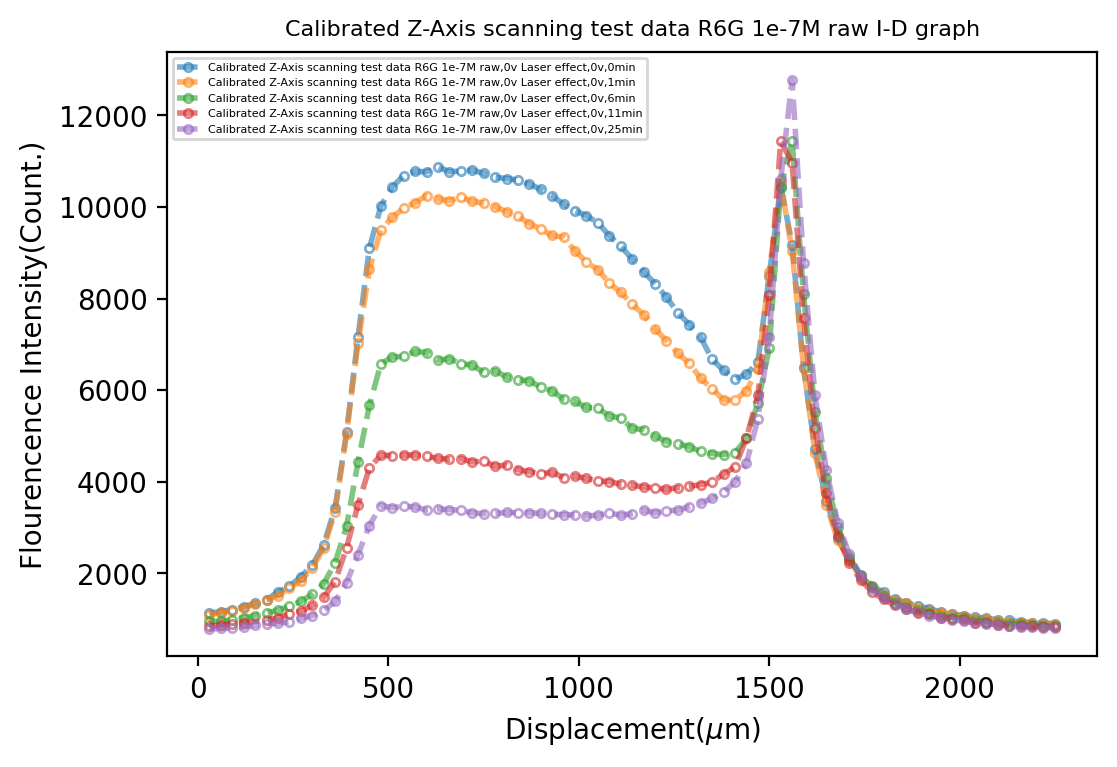

In [ ]:
#upper_class_path = '/content/drive/MyDrive/analysis/Raman_analyze/20230127 r6g/5um PMMA coated sinw voltage/location 1/total/'
save_path =upper_class_path
cali_param_list= ['1.00', '1.00', '1.02', '1.03', '1.08']
solution_concentration = 'R6G 1e-7M '
name = 'Calibrated Z-Axis scanning test data ' + solution_concentration
mode1 = 'individual'
mode2 ='overall'
mode3 ='raw'
Calibrationed_Distance_raman_drawing(upper_class_path,save_path,name+mode3,mode3,cali_param_list)

## Extract the max point position

In [ ]:

def keep_cetain_position_inlist(tot_folder_path):


In [ ]:
condition = file_path.split('/')[-1]
print(condition)

2ITO+1V


In [ ]:
from IPython.lib.display import isdir
import os
def return_folders_path(path):
  path_list = []
  for top,dirs,files in os.walk(Upper_folder_path):
    for dir in dirs:
      path=os.path.join(top,dir)
      path_list.append(path)
  return path_list

def return_files_path(path):
  file_list = []
  for top,dirs,files in os.walk(Upper_folder_path):
    for file in files:
      path=os.path.join(top,file)
      file_list.append(path)
  return file_list

def delete_upper_class_folder_path(path_list):
  for path in path_list:
    for item in os.listdir(path):
      if os.path.isdir(item):
        path_list.remove(path)
  return path_list

def delete_upper_class_folder_path(path_list):
  for path in path_list:
    file_list = os.listdir(path)
    for file in file_list:
      print(file)
      if os.path.isdir(os.path.join(path,file)):
        path_list.remove(path)
        print('removing upper folder%s'%path)
        break#遇到第一个folder 删除上级路径
  return path_list

Upper_folder_path = '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO'
condition_list =[]
path_c = return_folders_path(Upper_folder_path)
path_b = delete_upper_class_folder_path(path_c)


for path in path_c:
  print(path+'---')

  #for f_path in path:
for path in path_b:
  print(path)

1
removing upper folder/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv
R6G 10-6M on FTO_-0vafter-1v_5min_2_7.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_16.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_30.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_37.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_20.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_21.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_4.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_39.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_11.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_14.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_41.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_36.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_29.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_6.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_19.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_13.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_32.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_31.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_23.txt
R6G 10-6M on FTO_-0vafter-1v_5min_2_33.txt
R

In [ ]:
test_path ='/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/+1v'
for item in os.listdir(test_path):
  if os.path.isdir(os.path.join(test_path,item)):
    print('kk')

kk
kk


In [ ]:
path_d = delete_upper_class_folder_path(path_b)
print(path_d)

5min
removing upper folder/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/+1v
R6G 10-6M on FTO_0mv_1_11.txt
R6G 10-6M on FTO_0mv_1_6.txt
R6G 10-6M on FTO_0mv_1_12.txt
R6G 10-6M on FTO_0mv_1_13.txt
R6G 10-6M on FTO_0mv_1_15.txt
R6G 10-6M on FTO_0mv_1_10.txt
R6G 10-6M on FTO_0mv_1_5.txt
R6G 10-6M on FTO_0mv_1_1.txt
R6G 10-6M on FTO_0mv_1_2.txt
R6G 10-6M on FTO_0mv_1_3.txt
R6G 10-6M on FTO_0mv_1_9.txt
R6G 10-6M on FTO_0mv_1_16.txt
R6G 10-6M on FTO_0mv_1_8.txt
R6G 10-6M on FTO_0mv_1_14.txt
R6G 10-6M on FTO_0mv_1_4.txt
R6G 10-6M on FTO_0mv_1_7.txt
R6G 10-6M on FTO_0mv_1_23.txt
R6G 10-6M on FTO_0mv_1_39.txt
R6G 10-6M on FTO_0mv_1_44.txt
R6G 10-6M on FTO_0mv_1_45.txt
R6G 10-6M on FTO_0mv_1_28.txt
R6G 10-6M on FTO_0mv_1_29.txt
R6G 10-6M on FTO_0mv_1_25.txt
R6G 10-6M on FTO_0mv_1_34.txt
R6G 10-6M on FTO_0mv_1_17.txt
R6G 10-6M on FTO_0mv_1_42.txt
R6G 10-6M on FTO_0mv_1_18.txt
R6G 10-6M on FTO_0mv_1_22.txt
R6G 10-6M on FTO_0mv_1_3

In [ ]:
path_d

['/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/-0vafter-1v',
 '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv/1',
 '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv/2',
 '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv/3',
 '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/+1v/5min',
 '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/+1v/1',
 '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/-1v/1',
 '/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO

In [ ]:
os.listdir('/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/+1v/')

['5min', '1']

In [ ]:
from posixpath import join
from posixpath import split
from pandas.io.parsers.readers import read_table



# KEY_WORDS = {'voltage':['N50mv'],'time':['0-200s']}
# file_list = file_name_walk_finder(file_path,KEY_WORDS)

def itgraph_value_return(file_list,Autopickfinder_FLAG = True):

  # time_count_list = []
  # target_y = []
  Autopickfinder_FLAG = True
  plot_list = np.array([[0,0]])
  for file in file_list:
    initial_num = int(file.split('_')[1].split('-')[0])
    time_count = int(file.split('_')[-1].split('.')[0].lower())
    # time_count_list.append(time_count*10+initial_num)
    files = os.path.join(file_path,file)
    df = pd.read_table(files,names=['wave number','intensity'],sep='\\s+',encoding='utf-8')
    df = df.loc[df['wave number']>400].reset_index()
    y = df['intensity']
    base = peakutils.baseline(y,5)

    if Autopickfinder_FLAG == True:

      indexes = peakutils.indexes(y-base,thres=0.01,min_dist=20)
      ## Debug and check the peak finder
      print(indexes)
      #index = indexes[np.where((indexes<135)&(indexes>130))]
      Y_2=0
      for indexe in indexes:
        if 700 <df['wave number'].loc[indexe]<750:
          index = indexe
          #### debug
          print(df['wave number'].loc[indexe])
          Y_2 = df['intensity'].loc[index]-base[index]
    else:
      index =  df[df['wave number']==733.004].index.tolist()
      Y_2 = df['intensity'].loc[index[0]]-base[index[0]]
      print(df['wave number'].loc[index[0]])


    # target_y.append(Y_2)
    #print(index)
    time_gap = 10
    plot_list =np.append(plot_list,[[time_count*time_gap+initial_num,Y_2]],axis=0)
    # print(np.argsort(plot_list[:,0]))

    plot_list = plot_list[np.argsort(plot_list[:,0])]
    # print(plot_list)
  return plot_list


In [ ]:
from matplotlib import text
from pandas.core import indexes
dest=[]
target = ['N800mv']
target.sort()
file_path = '/content/drive/MyDrive/Ph.D./Lab/SERS-Si Array/data/Roman/july23 1e-7 14s3hours/N800(4)'
with plt.style.context(['science','no-latex']):
    fig, ax = plt.subplots(figsize=(6,4),dpi=200)
    plt.ylim((-10,10000))
    #plt.xlim((50,600))
    for tar in target:
      KEY_WORDS = {'voltage':[tar],'time':['0-600s']}
      file_list = file_name_walk_finder(file_path,KEY_WORDS)
      plot_list = itgraph_value_return(file_list)
      print(plot_list)
      x_value = plot_list[1:,0]
      y_value = plot_list[1:,1]
      ax.plot(x_value , y_value,'b.--',markerfacecolor='none')
      des = tar +' Applied voltage time,1200s,Cumulative,733$cm^{-1} around$'
      dest.append(des)
      ax.legend(dest,fontsize=6)
      concentration = '$10^{-7}$M Adenine(PBS 0.1X)'
    ax.legend(["Voltage," + target[0] +",signal changed recording "],fontsize=6,loc='upper right')
    ax.set(ylabel='733$cm^{-1}$ around Intensity(Count.)',xlabel='time(s)')
    ax.set(title= target[0]+','+concentration +', I-t graph')
    ax.autoscale()

OSError: ignored

In [ ]:
Upper_folder_path ='/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO'
for top,dirs,files in os.walk(Upper_folder_path):
  for dir in dirs:
    path=os.path.join(top,dir)
    print(path)

/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv
/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/+1v
/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/-0vafter-1v
/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/-1v
/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv/1
/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv/2
/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/0mv/3
/content/drive/MyDrive/analysis/Raman_analyze/20221215 BL/Filter_test/R6G_12_15_ refine holder_60/R6G 10-6M on FTO/+1v/5min
/content/drive/MyDrive/analys

In [ ]:
from tqdm import tqdm
a =['12','23','3','1']
bar = tqdm(a)
for a in bar:
  bar.set_description('Now processing...%s'%a)
  print(type(bar))



Now processing...1: 100%|██████████| 4/4 [00:00<00:00, 299.42it/s]

<class 'tqdm.std.tqdm'>
<class 'tqdm.std.tqdm'>
<class 'tqdm.std.tqdm'>
<class 'tqdm.std.tqdm'>
